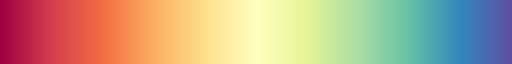

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import logomaker


from scipy.stats import fisher_exact

from statsmodels.stats.multitest import multipletests

new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
plt.rcParams.update(new_rc_params)


pallete=sns.color_palette("Spectral", as_cmap=True)
pallete.set_bad('0.5')

pallete

# SC data prep

In [2]:
sc_data = pd.read_csv('./metadata.csv', index_col=0)
sc_data

/scratch/ipykernel_1573215/3850521495.py:1: DtypeWarning: Columns (1,3,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  sc_data = pd.read_csv('./metadata.csv', index_col=0)


patient_id  \
AAACCTGAGAAACCTA-MH9179824                          MH9179824   
AAACCTGAGAGTAATC-MH9179824                          MH9179824   
AAACCTGAGAGTGAGA-MH9179824                          MH9179824   
AAACCTGAGGAATCGC-MH9179824                          MH9179824   
AAACCTGAGTGTTGAA-MH9179824                          MH9179824   
...                                                       ...   
COV19_CH11286513+COV19_CH11408323_TTTGTCAGTTGTG...     676586   
COV19_CH11286513+COV19_CH11408323_TTTGTCATCAGCT...     676586   
COV19_CH11286513+COV19_CH11408323_TTTGTCATCGCTT...     676586   
COV19_CH11286513+COV19_CH11408323_TTTGTCATCTCGC...     676586   
COV19_CH11286513+COV19_CH11408323_TTTGTCATCTTGA...     677696   

                                                            sample_id  \
AAACCTGAGAAACCTA-MH9179824                                  MH9179824   
AAACCTGAGAGTAATC-MH9179824                                  MH9179824   
AAACCTGAGAGTGAGA-MH9179824                                  MH9179824   
AAACCTGAGGAATCGC-MH9179824                                  MH9179824   
AAACCTGAGTGTTGAA-MH9179824                                  MH9179824   
...                                                               ...   
COV19_CH11286513+COV19_CH11408323_TTTGTCAGTTGTG...  participant_2;D10   
COV19_CH11286513+COV19_CH11408323_TTTGTCATCAGCT...  participant_2;D10   
COV19_CH11286513+COV19_CH11408323_TTTGTCATCGCTT...  participant_2;D10   
COV19_CH11286513+COV19_CH11408323_TTTGTCATCTCGC...  participant_2;D10   
COV19_CH11286513+COV19_CH11408323_TTTGTCATCTTGA...  participant_8;D14   

                                                         age sex  \
AAACCTGAGAAACCTA-MH9179824                          (50, 59]   F   
AAACCTGAGAGTAATC-MH9179824                          (50, 59]   F   
AAACCTGAGAGTGAGA-MH9179824                          (50, 59]   F   
AAACCTGAGGAATCGC-MH9179824                          (50, 59]   F   
AAACCTGAGTGTTGAA-MH9179824                          (50, 59]   F   
...                                                      ...  ..   
COV19_CH11286513+COV19_CH11408323_TTTGTCAGTTGTG...        22   F   
COV19_CH11286513+COV19_CH11408323_TTTGTCATCAGCT...        22   F   
COV19_CH11286513+COV19_CH11408323_TTTGTCATCGCTT...        22   F   
COV19_CH11286513+COV19_CH11408323_TTTGTCATCTCGC...        22   F   
COV19_CH11286513+COV19_CH11408323_TTTGTCATCTTGA...        21   M   

                                                              severity  \
AAACCTGAGAAACCTA-MH9179824                                    moderate   
AAACCTGAGAGTAATC-MH9179824                                    moderate   
AAACCTGAGAGTGAGA-MH9179824                                    moderate   
AAACCTGAGGAATCGC-MH9179824                                    moderate   
AAACCTGAGTGTTGAA-MH9179824                                    moderate   
...                                                                ...   
COV19_CH11286513+COV19_CH11408323_TTTGTCAGTTGTG...  COVID-19 challenge   
COV19_CH11286513+COV19_CH11408323_TTTGTCATCAGCT...  COVID-19 challenge   
COV19_CH11286513+COV19_CH11408323_TTTGTCATCGCTT...  COVID-19 challenge   
COV19_CH11286513+COV19_CH11408323_TTTGTCATCTCGC...  COVID-19 challenge   
COV19_CH11286513+COV19_CH11408323_TTTGTCATCTTGA...  COVID-19 challenge   

                                                        disease_status  \
AAACCTGAGAAACCTA-MH9179824                                    COVID-19   
AAACCTGAGAGTAATC-MH9179824                                    COVID-19   
AAACCTGAGAGTGAGA-MH9179824                                    COVID-19   
AAACCTGAGGAATCGC-MH9179824                                    COVID-19   
AAACCTGAGTGTTGAA-MH9179824                                    COVID-19   
...                                                                ...   
COV19_CH11286513+COV19_CH11408323_TTTGTCAGTTGTG...  COVID-19 challenge   
COV19_CH11286513+COV19_CH11408323_TTTGTCATCAGCT...  COVID-19 challenge   
COV19_CH11286513+COV1

In [3]:
sc_data.disease_status.unique()

array(['COVID-19', 'other_respiratory_disease', 'LPS_10hours', 'healthy',
       'LPS_90mins', 'convalescence', 'sepsis', 'influenza',
       'COVID-19 challenge'], dtype=object)

In [4]:
sc_data = sc_data[sc_data.disease_status == 'healthy']
sc_data

patient_id     sample_id       age sex severity  \
AAACCTGAGGGATCTG-MH8919333  MH8919333     MH8919333  (40, 49]   M  healthy   
AAACCTGCACGAGAGT-MH8919333  MH8919333     MH8919333  (40, 49]   M  healthy   
AAACCTGTCACCTCGT-MH8919333  MH8919333     MH8919333  (40, 49]   M  healthy   
AAACGGGCAGTCGTGC-MH8919333  MH8919333     MH8919333  (40, 49]   M  healthy   
AAACGGGGTAATCACC-MH8919333  MH8919333     MH8919333  (40, 49]   M  healthy   
...                               ...           ...       ...  ..      ...   
TTTATGCAGAACTGTA-1-gPlexK7     H00064  H00064-Ha001     61-70   F  control   
TTTATGCCATTACGAC-1-gPlexK7     H00064  H00064-Ha001     61-70   F  control   
TTTCCTCCATCCTTGC-1-gPlexK7     H00064  H00064-Ha001     61-70   F  control   
TTTCCTCTCAGAGGTG-1-gPlexK7     H00064  H00064-Ha001     61-70   F  control   
TTTGGTTAGCCGGTAA-1-gPlexK7     H00064  H00064-Ha001     61-70   F  control   

                           disease_status       study      celltypist  \
AAACCTGAGGGATCTG-MH8919333        healthy  Stephenson     T CD4 Naive   
AAACCTGCACGAGAGT-MH8919333        healthy  Stephenson  T CD4 Helper 0   
AAACCTGTCACCTCGT-MH8919333        healthy  Stephenson     T CD4 Naive   
AAACGGGCAGTCGTGC-MH8919333        healthy  Stephenson     T CD8 Naive   
AAACGGGGTAATCACC-MH8919333        healthy  Stephenson     T CD4 Naive   
...                                   ...         ...             ...   
TTTATGCAGAACTGTA-1-gPlexK7        healthy      COMBAT     T CD4 Naive   
TTTATGCCATTACGAC-1-gPlexK7        healthy      COMBAT     T CD4 Naive   
TTTCCTCCATCCTTGC-1-gPlexK7        healthy      COMBAT     T CD8 Naive   
TTTCCTCTCAGAGGTG-1-gPlexK7        healthy      COMBAT  T CD4 Helper 1   
TTTGGTTAGCCGGTAA-1-gPlexK7        healthy      COMBAT      T CD8 EMRA   

                           celltypist_majority    subject  ...       v_a_gene  \
AAACCTGAGGGATCTG-MH8919333         T CD4 Naive  MH8919333  ...    TRAV13-1*01   
AAACCTGCACGAGAGT-MH8919333      T CD4 Helper 0  MH8919333  ...       TRAV5*01   
AAACCTGTCACCTCGT-MH8919333         T CD4 Naive  MH8919333  ...     TRAV9-2*01   
AAACGGGCAGTCGTGC-MH8919333         T CD4 Naive  MH8919333  ...    TRAV26-1*01   
AAACGGGGTAATCACC-MH8919333         T CD4 Naive  MH8919333  ...    TRAV13-1*01   
...                                        ...        ...  ...            ...   
TTTATGCAGAACTGTA-1-gPlexK7         T CD4 Naive     H00064  ...      TRAV25*01   
TTTATGCCATTACGAC-1-gPlexK7         T CD4 Naive     H00064  ...  TRAV29/DV5*01   
TTTCCTCCATCCTTGC-1-gPlexK7         T CD8 Naive     H00064  ...      TRAV17*01   
TTTCCTCTCAGAGGTG-1-gPlexK7      Monocyte CD14+     H00064  ...      TRAV24*01   
TTTGGTTAGCCGGTAA-1-gPlexK7          T CD8 EMRA     H00064  ...      TRAV19*01   

                             j_a_gene covid_status time_point  \
AAACCTGAGGGATCTG-MH8919333   TRAJ6*01          NaN        NaN   
AAACCTGCACGAGAGT-MH8919333   TRAJ3*01          NaN        NaN   
AAACCTGTCACCTCGT-MH8919333  TRAJ35*01          NaN        NaN   
AAACGGGCAGTCGTGC-MH8919333  TRAJ23*01          NaN        NaN   
AAACGGGGTAATCACC-MH8919333  TRAJ26*01          NaN        NaN   
...                               ...          ...        ...   
TTTATGCAGAACTGTA-1-gPlexK7   TRAJ3*01          NaN        NaN   
TTTATGCCATTACGAC-1-gPlexK7  TRAJ52*01          NaN        NaN   
TTTCCTCCATCCTTGC-1-gPlexK7  TRAJ15*01          NaN        NaN   
TTTCCTCTCAGAGGTG-1-gPlexK7  TRAJ49*01          NaN        NaN   
TTTGGTTAGCCGGTAA-1-gPlexK7  TRAJ23*01          NaN        NaN   

                           vdjdb_marker_alpha vdjdb_marker_beta  \
AAACCTGAGGGATCTG-MH8919333                  1                 0   
AAACCTGCACGAGAGT-MH8919333                  1                 0   
AAACCTGTCACCTCGT-MH8919333                  0                 0   
AAACGGGCAGTCGTGC-MH8919333                  0                 0   
AAACGGGGTAATCACC-MH8919333                  0                 0   
...                                       ...            

In [5]:
sc_data = sc_data[sc_data.celltypist_majority.apply(lambda x: x[0] == 'T')]

In [6]:
sc_data.celltypist_majority.unique()

array(['T CD4 Naive', 'T CD4 Helper 0', 'T CD8 Naive', 'T Reg EM',
       'T CD8 EMRA', 'T CD8 EM', 'T CD8 CTL', 'T CD4 Naive IFN stim',
       'T CD8 Naive RTE', 'T CD4 Naive RTE', 'T CD4 Helper 1',
       'T CD4 Helper 17', 'T MAI Activated', 'T CD8 CM', 'T Reg CM',
       'T CD8 Activated CTL Cycling', 'T Double Negative', 'T CD4 CTL',
       'T CD8 Activated CTL', 'T MAI', 'T Reg Activated Cycling',
       'T CD4 Activated Helper 1 Cycling', 'T CD4 Helper 2',
       'T CD4 Activated CTL'], dtype=object)

In [7]:
'T CD8 Activated CTL'.replace('T MAI', 'MAIT')

'T CD8 Activated CTL'

In [8]:
sc_data.celltypist_majority = sc_data.celltypist_majority.apply(lambda x: x.replace('T MAI', 'MAIT'))

sc_data

/scratch/ipykernel_1573215/2175828746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_data.celltypist_majority = sc_data.celltypist_majority.apply(lambda x: x.replace('T MAI', 'MAIT'))


patient_id     sample_id       age sex severity  \
AAACCTGAGGGATCTG-MH8919333  MH8919333     MH8919333  (40, 49]   M  healthy   
AAACCTGCACGAGAGT-MH8919333  MH8919333     MH8919333  (40, 49]   M  healthy   
AAACCTGTCACCTCGT-MH8919333  MH8919333     MH8919333  (40, 49]   M  healthy   
AAACGGGCAGTCGTGC-MH8919333  MH8919333     MH8919333  (40, 49]   M  healthy   
AAACGGGGTAATCACC-MH8919333  MH8919333     MH8919333  (40, 49]   M  healthy   
...                               ...           ...       ...  ..      ...   
TTTACTGAGGCAGTCA-1-gPlexK7     H00064  H00064-Ha001     61-70   F  control   
TTTATGCAGAACTGTA-1-gPlexK7     H00064  H00064-Ha001     61-70   F  control   
TTTATGCCATTACGAC-1-gPlexK7     H00064  H00064-Ha001     61-70   F  control   
TTTCCTCCATCCTTGC-1-gPlexK7     H00064  H00064-Ha001     61-70   F  control   
TTTGGTTAGCCGGTAA-1-gPlexK7     H00064  H00064-Ha001     61-70   F  control   

                           disease_status       study      celltypist  \
AAACCTGAGGGATCTG-MH8919333        healthy  Stephenson     T CD4 Naive   
AAACCTGCACGAGAGT-MH8919333        healthy  Stephenson  T CD4 Helper 0   
AAACCTGTCACCTCGT-MH8919333        healthy  Stephenson     T CD4 Naive   
AAACGGGCAGTCGTGC-MH8919333        healthy  Stephenson     T CD8 Naive   
AAACGGGGTAATCACC-MH8919333        healthy  Stephenson     T CD4 Naive   
...                                   ...         ...             ...   
TTTACTGAGGCAGTCA-1-gPlexK7        healthy      COMBAT     T CD4 Naive   
TTTATGCAGAACTGTA-1-gPlexK7        healthy      COMBAT     T CD4 Naive   
TTTATGCCATTACGAC-1-gPlexK7        healthy      COMBAT     T CD4 Naive   
TTTCCTCCATCCTTGC-1-gPlexK7        healthy      COMBAT     T CD8 Naive   
TTTGGTTAGCCGGTAA-1-gPlexK7        healthy      COMBAT      T CD8 EMRA   

                           celltypist_majority    subject  ...       v_a_gene  \
AAACCTGAGGGATCTG-MH8919333         T CD4 Naive  MH8919333  ...    TRAV13-1*01   
AAACCTGCACGAGAGT-MH8919333      T CD4 Helper 0  MH8919333  ...       TRAV5*01   
AAACCTGTCACCTCGT-MH8919333         T CD4 Naive  MH8919333  ...     TRAV9-2*01   
AAACGGGCAGTCGTGC-MH8919333         T CD4 Naive  MH8919333  ...    TRAV26-1*01   
AAACGGGGTAATCACC-MH8919333         T CD4 Naive  MH8919333  ...    TRAV13-1*01   
...                                        ...        ...  ...            ...   
TTTACTGAGGCAGTCA-1-gPlexK7         T CD4 Naive     H00064  ...    TRAV12-2*01   
TTTATGCAGAACTGTA-1-gPlexK7         T CD4 Naive     H00064  ...      TRAV25*01   
TTTATGCCATTACGAC-1-gPlexK7         T CD4 Naive     H00064  ...  TRAV29/DV5*01   
TTTCCTCCATCCTTGC-1-gPlexK7         T CD8 Naive     H00064  ...      TRAV17*01   
TTTGGTTAGCCGGTAA-1-gPlexK7          T CD8 EMRA     H00064  ...      TRAV19*01   

                             j_a_gene covid_status time_point  \
AAACCTGAGGGATCTG-MH8919333   TRAJ6*01          NaN        NaN   
AAACCTGCACGAGAGT-MH8919333   TRAJ3*01          NaN        NaN   
AAACCTGTCACCTCGT-MH8919333  TRAJ35*01          NaN        NaN   
AAACGGGCAGTCGTGC-MH8919333  TRAJ23*01          NaN        NaN   
AAACGGGGTAATCACC-MH8919333  TRAJ26*01          NaN        NaN   
...                               ...          ...        ...   
TTTACTGAGGCAGTCA-1-gPlexK7  TRAJ45*01          NaN        NaN   
TTTATGCAGAACTGTA-1-gPlexK7   TRAJ3*01          NaN        NaN   
TTTATGCCATTACGAC-1-gPlexK7  TRAJ52*01          NaN        NaN   
TTTCCTCCATCCTTGC-1-gPlexK7  TRAJ15*01          NaN        NaN   
TTTGGTTAGCCGGTAA-1-gPlexK7  TRAJ23*01          NaN        NaN   

                           vdjdb_marker_alpha vdjdb_marker_beta  \
AAACCTGAGGGATCTG-MH8919333                  1                 0   
AAACCTGCACGAGAGT-MH8919333                  1                 0   
AAACCTGTCACCTCGT-MH8919333                  0                 0   
AAACGGGCAGTCGTGC-MH8919333                  0                 0   
AAACGGGGTAATCACC-MH8919333                  0                 0   
...                                       ...            

In [9]:
len(sc_data.patient_id.unique())

88

In [10]:
sc_data

patient_id     sample_id       age sex severity  \
AAACCTGAGGGATCTG-MH8919333  MH8919333     MH8919333  (40, 49]   M  healthy   
AAACCTGCACGAGAGT-MH8919333  MH8919333     MH8919333  (40, 49]   M  healthy   
AAACCTGTCACCTCGT-MH8919333  MH8919333     MH8919333  (40, 49]   M  healthy   
AAACGGGCAGTCGTGC-MH8919333  MH8919333     MH8919333  (40, 49]   M  healthy   
AAACGGGGTAATCACC-MH8919333  MH8919333     MH8919333  (40, 49]   M  healthy   
...                               ...           ...       ...  ..      ...   
TTTACTGAGGCAGTCA-1-gPlexK7     H00064  H00064-Ha001     61-70   F  control   
TTTATGCAGAACTGTA-1-gPlexK7     H00064  H00064-Ha001     61-70   F  control   
TTTATGCCATTACGAC-1-gPlexK7     H00064  H00064-Ha001     61-70   F  control   
TTTCCTCCATCCTTGC-1-gPlexK7     H00064  H00064-Ha001     61-70   F  control   
TTTGGTTAGCCGGTAA-1-gPlexK7     H00064  H00064-Ha001     61-70   F  control   

                           disease_status       study      celltypist  \
AAACCTGAGGGATCTG-MH8919333        healthy  Stephenson     T CD4 Naive   
AAACCTGCACGAGAGT-MH8919333        healthy  Stephenson  T CD4 Helper 0   
AAACCTGTCACCTCGT-MH8919333        healthy  Stephenson     T CD4 Naive   
AAACGGGCAGTCGTGC-MH8919333        healthy  Stephenson     T CD8 Naive   
AAACGGGGTAATCACC-MH8919333        healthy  Stephenson     T CD4 Naive   
...                                   ...         ...             ...   
TTTACTGAGGCAGTCA-1-gPlexK7        healthy      COMBAT     T CD4 Naive   
TTTATGCAGAACTGTA-1-gPlexK7        healthy      COMBAT     T CD4 Naive   
TTTATGCCATTACGAC-1-gPlexK7        healthy      COMBAT     T CD4 Naive   
TTTCCTCCATCCTTGC-1-gPlexK7        healthy      COMBAT     T CD8 Naive   
TTTGGTTAGCCGGTAA-1-gPlexK7        healthy      COMBAT      T CD8 EMRA   

                           celltypist_majority    subject  ...       v_a_gene  \
AAACCTGAGGGATCTG-MH8919333         T CD4 Naive  MH8919333  ...    TRAV13-1*01   
AAACCTGCACGAGAGT-MH8919333      T CD4 Helper 0  MH8919333  ...       TRAV5*01   
AAACCTGTCACCTCGT-MH8919333         T CD4 Naive  MH8919333  ...     TRAV9-2*01   
AAACGGGCAGTCGTGC-MH8919333         T CD4 Naive  MH8919333  ...    TRAV26-1*01   
AAACGGGGTAATCACC-MH8919333         T CD4 Naive  MH8919333  ...    TRAV13-1*01   
...                                        ...        ...  ...            ...   
TTTACTGAGGCAGTCA-1-gPlexK7         T CD4 Naive     H00064  ...    TRAV12-2*01   
TTTATGCAGAACTGTA-1-gPlexK7         T CD4 Naive     H00064  ...      TRAV25*01   
TTTATGCCATTACGAC-1-gPlexK7         T CD4 Naive     H00064  ...  TRAV29/DV5*01   
TTTCCTCCATCCTTGC-1-gPlexK7         T CD8 Naive     H00064  ...      TRAV17*01   
TTTGGTTAGCCGGTAA-1-gPlexK7          T CD8 EMRA     H00064  ...      TRAV19*01   

                             j_a_gene covid_status time_point  \
AAACCTGAGGGATCTG-MH8919333   TRAJ6*01          NaN        NaN   
AAACCTGCACGAGAGT-MH8919333   TRAJ3*01          NaN        NaN   
AAACCTGTCACCTCGT-MH8919333  TRAJ35*01          NaN        NaN   
AAACGGGCAGTCGTGC-MH8919333  TRAJ23*01          NaN        NaN   
AAACGGGGTAATCACC-MH8919333  TRAJ26*01          NaN        NaN   
...                               ...          ...        ...   
TTTACTGAGGCAGTCA-1-gPlexK7  TRAJ45*01          NaN        NaN   
TTTATGCAGAACTGTA-1-gPlexK7   TRAJ3*01          NaN        NaN   
TTTATGCCATTACGAC-1-gPlexK7  TRAJ52*01          NaN        NaN   
TTTCCTCCATCCTTGC-1-gPlexK7  TRAJ15*01          NaN        NaN   
TTTGGTTAGCCGGTAA-1-gPlexK7  TRAJ23*01          NaN        NaN   

                           vdjdb_marker_alpha vdjdb_marker_beta  \
AAACCTGAGGGATCTG-MH8919333                  1                 0   
AAACCTGCACGAGAGT-MH8919333                  1                 0   
AAACCTGTCACCTCGT-MH8919333                  0                 0   
AAACGGGCAGTCGTGC-MH8919333                  0                 0   
AAACGGGGTAATCACC-MH8919333                  0                 0   
...                                       ...            

# Naive analysis

In [423]:
res_keck = pd.read_csv('/home/dluppov/milarge_files/vdj_tools_data/keck_vdj_nt_single.txt', sep = '\t')

fold_keck = ((res_keck['degree.s'] + 1)/res_keck['group.count.s'])/((res_keck['degree.c'] + 1)/res_keck['group.count.c'])
log2_fc_keck = np.log2(fold_keck)
log10_p_keck = -np.log10(res_keck['p.value.g'].apply(lambda x: x if x > 10**(-16) else 10**(-16)))

res_keck['fc'] = fold_keck
res_keck['log2fc'] = log2_fc_keck
res_keck['log10_p'] = log10_p_keck



res_keck

count          freq  \
0            1  8.680164e-07   
1            1  8.680164e-07   
2            1  8.680164e-07   
3            1  8.680164e-07   
4            1  8.680164e-07   
...        ...           ...   
1147245      1  8.680164e-07   
1147246      1  8.680164e-07   
1147247      1  8.680164e-07   
1147248      1  8.680164e-07   
1147249      1  8.680164e-07   

                                                   cdr3nt            cdr3aa  \
0                 TGTGCCAGCAGCTTAGCTCTTGGCAATGAGCAGTTCTTC     CASSLALGNEQFF   
1           TGTGCCAGCAGTTCGGGACTAGTCCTGGGCAATGAGCAGTTCTTC   CASSSGLVLGNEQFF   
2           TGTGCCAGCAGTTACACGACTAGCGGGGGCAATGAGCAGTTCTTC   CASSYTTSGGNEQFF   
3        TGTGCCAGCAGTAAATTCCCGACGAGGGACGGCAATGAGCAGTTCTTC  CASSKFPTRDGNEQFF   
4           TGTGCCAGCAGCTTAGTAGGAGGGCGTCGCAATGAGCAGTTCTTC   CASSLVGGRRNEQFF   
...                                                   ...               ...   
1147245     TGTGCCAGCTCACCCCAGACAGGGGGCAACACTGAAGCTTTCTTT   CASSPQTGGNTEAFF   
1147246           TGTGCCGTCCACACCCAGGGTCGAACTGAAGCTTTCTTT     CAVHTQGRTEAFF   
1147247        TGTGCCAGTAGTATTGGGGCAGGGAGAACTGAAGCTTTCTTT    CASSIGAGRTEAFF   
1147248                 TGTGCCAGCAGTGCTCGTTATGAAGCTTTCTTT       CASSARYEAFF   
1147249        TGTGCCAGCAGCTCCAGGATACTGTCAGCTACGACTTTCTTT    CASSSRILSATTFF   

                v  d        j  VEnd  DStart  DEnd  ...  group.count.s  \
0         TRBV7-6  .  TRBJ2-1    -1      -1    -1  ...        1147250   
1          TRBV28  .  TRBJ2-1    -1      -1    -1  ...        1147250   
2         TRBV6-6  .  TRBJ2-1    -1      -1    -1  ...        1147250   
3        TRBV25-1  .  TRBJ2-1    -1      -1    -1  ...        1147250   
4         TRBV7-3  .  TRBJ2-1    -1      -1    -1  ...        1147250   
...           ... ..      ...   ...     ...   ...  ...            ...   
1147245    TRBV18  .  TRBJ1-1    -1      -1    -1  ...        1147250   
1147246    TRBV28  .  TRBJ1-1    -1      -1    -1  ...        1147250   
1147247    TRBV19  .  TRBJ1-1    -1      -1    -1  ...        1147250   
1147248    TRBV28  .  TRBJ1-1    -1      -1    -1  ...        1147250   
1147249   TRBV5-4  .  TRBJ1-1    -1      -1    -1  ...        1147250   

         group2.count.s  degree.c  group.count.c  group2.count.c  \
0                   238       224        9844524            1202   
1                  1498         2        9844524            5132   
2                   545         8        9844524            1865   
3                   273         0        9844524            2041   
4                  1005        16        9844524            6347   
...                 ...       ...            ...             ...   
1147245            1142        48        9844524            3028   
1147246            1384         0        9844524            4577   
1147247            2137        18        9844524            6435   
1147248             393        66        9844524            1661   
1147249             880         0        9844524            3128   

            p.value.g    p.value.g2         fc    log2fc       log10_p  
0        0.000000e+00  3.672143e-07   3.165426  1.662400  1.600000e+01  
1        1.646402e-01  3.748895e-01   8.580975  3.101142  7.834640e-01  
2        2.643794e-07  4.464459e-04  10.487859  3.390648  6.577772e+00  
3        1.000000e+00  1.000000e+00  17.161951  4.101142 -4.821637e-16  
4        8.831878e-06  1.263544e-04   6.057159  2.598641  5.053947e+00  
...               ...           ...        ...       ...           ...  
1147245  0.000000e+00  4.638400e-05   6.829756  2.771834  1.600000e+01  
1147246  1.000000e+00  1.000000e+00  17.161951  4.101142 -4.821637e-16  
1147247  2.354123e-05  5.696726e-02   5.419563  2.438177  4.628171e+00  
1147248  2.599585e-01  9.541498e-01   1.408817  0.494484  5.850960e-01  
1147249  1.000000e+00  1.000000e+00  17.161951  4.101142 -4.821637e-16  

[1147250 rows x 22 columns]

In [18]:
res_keck_cutted = res_keck.sort_values('p.value.g').head(10000)
res_keck_cutted

count          freq                                            cdr3nt  \
0           1  8.680164e-07           TGTGCCAGCAGCTTAGCTCTTGGCAATGAGCAGTTCTTC   
962912      1  8.680164e-07           TGTGCCAGCAGCTTGGCCAAAAACACTGAAGCTTTCTTT   
134281      1  8.680164e-07        TGTGCCAGCAGTTACTCGGCGAGCTCCTACGAGCAGTACTTC   
602437      1  8.680164e-07              TGTGCCAGCAGCCTCGCGGGAAATGAGCAGTTCTTC   
602426      1  8.680164e-07     TGTGCCAGCAGTGGAACTAGCGGGGGATACAATGAGCAGTTCTTC   
...       ...           ...                                               ...   
615268      1  8.680164e-07     TGTGCCAGCAGTTTATCTACCTCTGGGGCCAACGTCCTGACTTTC   
941283      1  8.680164e-07        TGTGCCAGCAGCTTAGGGCTGGGCCCCTACGAGCAGTACTTC   
941452      1  8.680164e-07  TGTGCCAGCAGCCTCGGGACTAGCGGCGCCTACAATGAGCAGTTCTTC   
150942      1  8.680164e-07     TGTGCCAGCAGCTGGGGGACAGGACTGTACAATGAGCAGTTCTTC   
615085      1  8.680164e-07           TGTGCCAGCAGTCTCGGGCTCTCCTACGAGCAGTACTTC   

                  cdr3aa         v  d        j  VEnd  DStart  DEnd  ...  \
0          CASSLALGNEQFF   TRBV7-6  .  TRBJ2-1    -1      -1    -1  ...   
962912     CASSLAKNTEAFF   TRBV5-6  .  TRBJ1-1    -1      -1    -1  ...   
134281    CASSYSASSYEQYF   TRBV6-3  .  TRBJ2-7    -1      -1    -1  ...   
602437      CASSLAGNEQFF     TRBV9  .  TRBJ2-1    -1      -1    -1  ...   
602426   CASSGTSGGYNEQFF  TRBV12-4  .  TRBJ2-1    -1      -1    -1  ...   
...                  ...       ... ..      ...   ...     ...   ...  ...   
615268   CASSLSTSGANVLTF    TRBV28  .  TRBJ2-6    -1      -1    -1  ...   
941283    CASSLGLGPYEQYF   TRBV7-8  .  TRBJ2-7    -1      -1    -1  ...   
941452  CASSLGTSGAYNEQFF   TRBV7-9  .  TRBJ2-1    -1      -1    -1  ...   
150942   CASSWGTGLYNEQFF   TRBV5-6  .  TRBJ2-1    -1      -1    -1  ...   
615085     CASSLGLSYEQYF   TRBV5-5  .  TRBJ2-7    -1      -1    -1  ...   

        group.count.s  group2.count.s  degree.c  group.count.c  \
0             1147250             238       224        9844524   
962912        1147250             583       213        9844524   
134281        1147250            1210        75        9844524   
602437        1147250             374       816        9844524   
602426        1147250            1818       142        9844524   
...               ...             ...       ...            ...   
615268        1147250             217        57        9844524   
941283        1147250             651       253        9844524   
941452        1147250            1103        64        9844524   
150942        1147250             689         7        9844524   
615085        1147250             230       987        9844524   

        group2.count.c  p.value.g    p.value.g2         fc    log2fc  log10_p  
0                 1202        0.0  3.672143e-07   3.165426  1.662400     16.0  
962912            2711        0.0  0.000000e+00   6.094898  2.607602     16.0  
134281            3936        0.0  2.302246e-05   5.306656  2.407803     16.0  
602437            3019        0.0  0.000000e+00   2.426200  1.278698     16.0  
602426            2219        0.0  9.960011e-01   5.460621  2.449065     16.0  
...                ...        ...           ...        ...       ...      ...  
615268             663        0.0  1.867773e-05   6.065862  2.600713     16.0  
941283            2954        0.0  1.822403e-05   3.074286  1.620252     16.0  
941452            6165        0.0  1.347490e-12   5.808660  2.538205     16.0  
150942            3738        0.0  4.316992e-15  21.452438  4.423070     16.0  
615085            1811        0.0  0.000000e+00   2.318948  1.213470     16.0  

[10000 rows x 22 columns]

In [47]:
def generate_masks(seq):
    
    masks = set()
    for i in range(len(seq)):
        clone_to_search = seq[: i] + 'X' + seq[i + 1:]
        masks.add(clone_to_search)
    return masks

def process_one_lenght(masks_series):
    
    res_list = []
    print(f'processing lenghts {len(masks_series.index[0])} started')
    while len(masks_series) > 5:
        cur_clust = set()
        cur_masks = set()

        cur_clust.add(masks_series.index[0])
        cur_masks = cur_masks.union(masks_series.iloc[0])


        for cdr3, masks in masks_series.items():

            if cur_masks.intersection(masks):
                cur_masks = cur_masks.union(masks)
                cur_clust.add(cdr3)

        masks_series.drop(list(cur_clust), inplace = True)
        res_list.append(cur_clust)
    print(f'processing lenghts {len(cdr3)} completed')
    return res_list

from multiprocessing import Pool

# top_all = top_all.loc[top_all.cdr3aa.drop_duplicates().index]

def process_all_lenghts(top_all):
        
    len_dist = top_all.cdr3aa.apply(len).value_counts()
    
    lenghts_dfs = []
    for i in len_dist[len_dist > 20].index:
        top_all_i = top_all[top_all.cdr3aa.apply(lambda x: len(x) == i)]

        top_all_i_masks = top_all_i.cdr3aa.apply(lambda x: generate_masks(x))
        top_all_i_masks.index = top_all_i.cdr3aa
        lenghts_dfs.append(top_all_i_masks)
        
    print('Start processing')
    with Pool(len(lenghts_dfs)) as p:
        res_list = list(p.map(process_one_lenght, lenghts_dfs))
    
    return sum(res_list, [])

In [20]:
import time

start = time.time()
res = process_all_lenghts(res_keck_cutted)
end = time.time()

pd.Series(res).to_csv('./naive_clusters.csv')    

res = pd.read_csv('./naive_clusters.csv', index_col=0)
res = res['0'].apply(eval)

exploded_series = res.explode()

res_exploded = pd.DataFrame(exploded_series).reset_index()
res_exploded.rename(columns = {"0": 'cdr3', 'index': 'cluster_id'}, inplace=True)
res_exploded.set_index('cdr3', inplace=True)

Start processing
processing lenghts 12 startedprocessing lenghts 14 startedprocessing lenghts 16 startedprocessing lenghts 11 startedprocessing lenghts 15 started

processing lenghts 13 started



processing lenghts 11 completedprocessing lenghts 12 completed

processing lenghts 16 completed
processing lenghts 13 completed
processing lenghts 14 completed
processing lenghts 15 completed


In [21]:
res_exploded.cluster_id.value_counts()

cluster_id
462     650
5       236
742     181
4       153
468     142
       ... 
593       1
594       1
595       1
596       1
1307      1
Name: count, Length: 1308, dtype: int64

In [92]:
res = res_exploded.reset_index()
res

cdr3  cluster_id
0       CASSYSASSYEQYF           0
1       CASSFGTANYGYTF           1
2       CASSPGTPNYGYTF           1
3       CASSLGTPNYGYTF           1
4       CASSLGQGNYGYTF           1
...                ...         ...
7325  CASSSGLAGVGETQYF        1303
7326  CASSLVLAGGSDTQYF        1304
7327  CASSLGAGGPYNEQFF        1305
7328  CASSLGLAGSYNEQFF        1306
7329  CASSLTSGGNTGELFF        1307

[7330 rows x 2 columns]

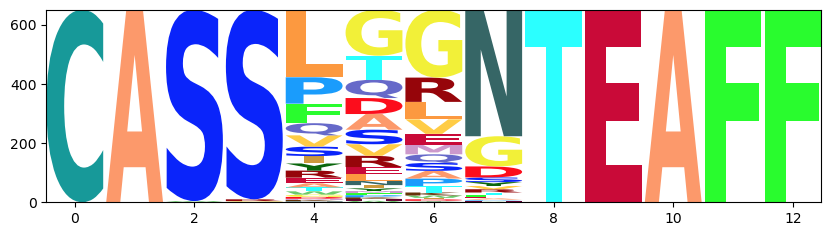

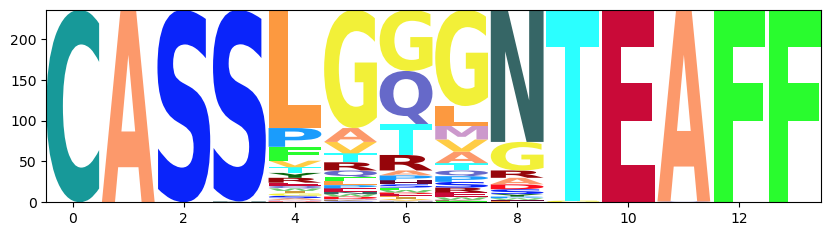

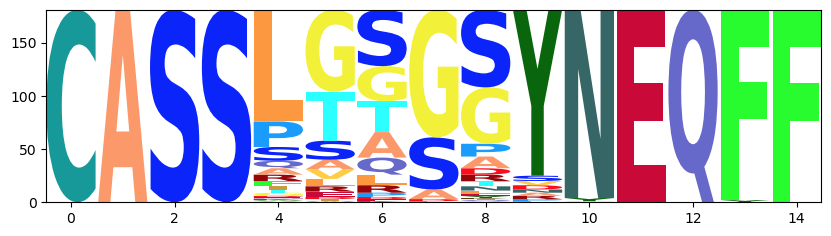

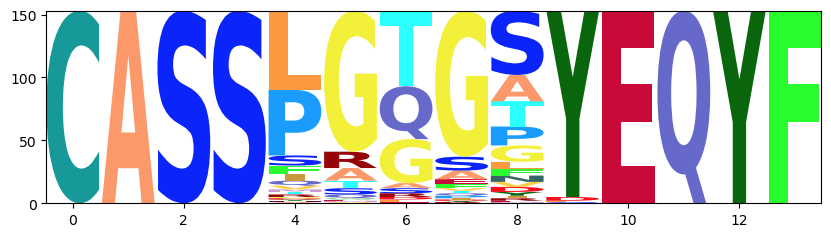

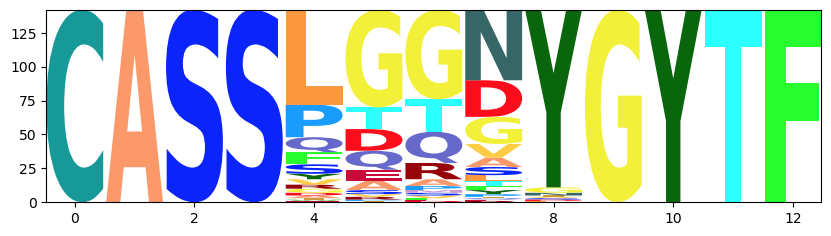

In [93]:
dif_clusters = res['cluster_id'].value_counts().head(5).index

import logomaker

for cluster in dif_clusters:
    clones = res[res['cluster_id'] == cluster].cdr3
    mat_df = logomaker.alignment_to_matrix(clones)
    logomaker.Logo(mat_df, color_scheme='skylign_protein', ax=None)

In [98]:
dif_clusters = res['cluster_id'].value_counts().head(5).index

types_dict = {}

for cluster in dif_clusters:
    
    cur_claster = set(res[res.cluster_id == cluster].cdr3)
    
    types_dict[cluster] = {}
    
    cur_founded_cluster = sc_data[sc_data.cdr3_b_aa.apply(lambda x: x in cur_claster)]
    
    for subtype in cur_founded_cluster.celltypist_majority.unique():
        types_dict[cluster][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_b_aa.unique())

cur_claster = set(res.cdr3)
types_dict['total'] = {}
cur_founded_cluster = sc_data[sc_data.cdr3_b_aa.apply(lambda x: x in cur_claster)]
for subtype in cur_founded_cluster.celltypist_majority.unique():
    types_dict['total'][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_b_aa.unique())

In [100]:
cell_type_counts_df = pd.DataFrame(types_dict)
cell_type_counts_df

462     5   742     4   468  total
T CD4 Naive                       210.0  58.0  46.0  51.0  50.0   1931
T CD8 EMRA                         14.0   NaN   3.0   2.0   1.0     84
T CD8 Naive                        59.0   9.0  14.0  24.0  11.0    494
T CD4 Helper 0                     59.0  11.0  11.0  14.0  13.0    533
T CD8 EM                           19.0   3.0   3.0   6.0   5.0    157
T Reg EM                            8.0   1.0   3.0   2.0   1.0     68
T CD8 CTL                          21.0   3.0   3.0   2.0   5.0    132
T MAI Activated                     4.0   NaN   3.0   2.0   NaN     51
T CD4 CTL                           3.0   NaN   NaN   1.0   NaN      6
T CD8 CM                            4.0   1.0   1.0   NaN   1.0     22
T CD4 Helper 17                    10.0   4.0   2.0   3.0   3.0     96
T CD8 Naive RTE                     8.0   2.0   2.0   3.0   5.0     67
T CD4 Naive IFN stim                3.0   NaN   1.0   1.0   2.0     34
T CD8 Activated CTL Cycling         2.0   1.0   2.0   1.0   2.0     19
T CD4 Naive RTE                     1.0   2.0   NaN   1.0   NaN     35
T CD4 Helper 1                      2.0   NaN   2.0   NaN   NaN     19
T Reg CM                            5.0   2.0   1.0   NaN   1.0     44
T Double Negative                   2.0   NaN   1.0   NaN   NaN     11
NK                                  5.0   NaN   NaN   NaN   1.0     26
T MAI                               2.0   1.0   1.0   NaN   NaN     19
Monocyte CD14+                     12.0   1.0   1.0   1.0   1.0     66
T CD4 Activated Helper 1 Cycling    1.0   NaN   NaN   1.0   NaN      5
T CD4 Activated CTL                 NaN   1.0   NaN   1.0   NaN      2
T CD8 Activated CTL                 NaN   NaN   NaN   NaN   NaN      3
T CD4 Helper 2                      NaN   NaN   NaN   NaN   NaN      2

In [102]:
cell_type_counts_df = cell_type_counts_df.fillna(0)

In [103]:
fisher_res = {}
chi_statistics = {}

for cluster in cell_type_counts_df.columns:
    fisher_res[cluster] = {}
    chi_statistics[cluster] = {}
    for subtype in cell_type_counts_df.index:
        fisher_table = [
            [cell_type_counts_df[cluster][subtype], cell_type_counts_df[cluster].sum() - cell_type_counts_df[cluster][subtype]], 
            [len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique()), len(sc_data[sc_data.celltypist_majority != subtype].cdr3_b_aa.unique())]
                       ]
        
        fisher_res[cluster][subtype] = fisher_exact(fisher_table, alternative='greater')[1]
        chi_statistics[cluster][subtype] = cell_type_counts_df[cluster][subtype]/(cell_type_counts_df[cluster].sum()*len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique()))

In [104]:
fisher_res_df = pd.DataFrame(fisher_res)
chi_res_df = pd.DataFrame(chi_statistics)
fisher_res_df

462         5       742         4  \
T CD4 Naive                       0.999995  0.424513  0.986628  0.997517   
T CD8 EMRA                        0.054631  1.000000  0.295376  0.648421   
T CD8 Naive                       0.010308  0.625449  0.094919  0.000235   
T CD4 Helper 0                    0.855231  0.882460  0.882460  0.818681   
T CD8 EM                          0.405806  0.751154  0.751154  0.297705   
T Reg EM                          0.606152  0.846279  0.284010  0.636349   
T CD8 CTL                         0.026475  0.557340  0.557340  0.853108   
T MAI Activated                   0.935557  1.000000  0.220214  0.561206   
T CD4 CTL                         0.009873  1.000000  1.000000  0.104577   
T CD8 CM                          0.391626  0.504008  0.504008  1.000000   
T CD4 Helper 17                   0.537915  0.177618  0.646935  0.468966   
T CD8 Naive RTE                   0.181018  0.336280  0.336280  0.162588   
T CD4 Naive IFN stim              0.732244  1.000000  0.568614  0.622890   
T CD8 Activated CTL Cycling       0.469175  0.294524  0.048050  0.332811   
T CD4 Naive RTE                   0.931164  0.117816  1.000000  0.495678   
T CD4 Helper 1                    0.562153  1.000000  0.065404  1.000000   
T Reg CM                          0.488872  0.269863  0.639424  1.000000   
T Double Negative                 0.312403  1.000000  0.220742  1.000000   
NK                                0.034838  1.000000  1.000000  1.000000   
T MAI                             0.735015  0.438098  0.438098  1.000000   
Monocyte CD14+                    0.052525  0.788770  0.788770  0.835275   
T CD4 Activated Helper 1 Cycling  0.257231  1.000000  1.000000  0.073247   
T CD4 Activated CTL               1.000000  0.029243  1.000000  0.033840   
T CD8 Activated CTL               1.000000  1.000000  1.000000  1.000000   
T CD4 Helper 2                    1.000000  1.000000  1.000000  1.000000   

                                       468         total  
T CD4 Naive                       0.947958  1.000000e+00  
T CD8 EMRA                        0.858223  1.496659e-01  
T CD8 Naive                       0.384531  6.748635e-10  
T CD4 Helper 0                    0.746452  9.713198e-01  
T CD8 EM                          0.364902  3.756589e-01  
T Reg EM                          0.851927  7.301751e-01  
T CD8 CTL                         0.175443  5.193371e-02  
T MAI Activated                   1.000000  9.514758e-01  
T CD4 CTL                         1.000000  1.777348e-01  
T CD8 CM                          0.510913  8.717114e-01  
T CD4 Helper 17                   0.387916  1.562958e-01  
T CD8 Naive RTE                   0.007848  3.629870e-03  
T CD4 Naive IFN stim              0.210626  4.456996e-01  
T CD8 Activated CTL Cycling       0.049776  1.028514e-01  
T CD4 Naive RTE                   1.000000  1.342095e-02  
T CD4 Helper 1                    1.000000  2.848187e-01  
T Reg CM                          0.646703  2.774491e-01  
T Double Negative                 1.000000  3.901668e-01  
NK                                0.329889  9.069757e-03  
T MAI                             1.000000  7.992755e-01  
Monocyte CD14+                    0.795235  2.609267e-01  
T CD4 Activated Helper 1 Cycling  1.000000  1.215983e-01  
T CD4 Activated CTL               1.000000  3.240327e-01  
T CD8 Activated CTL               1.000000  3.391470e-01  
T CD4 Helper 2                    1.000000  9.001420e-01

In [105]:
chi_res_df = chi_res_df.applymap(lambda x: np.log10(x) if x != 0 else -6)

<AxesSubplot: ylabel='index'>

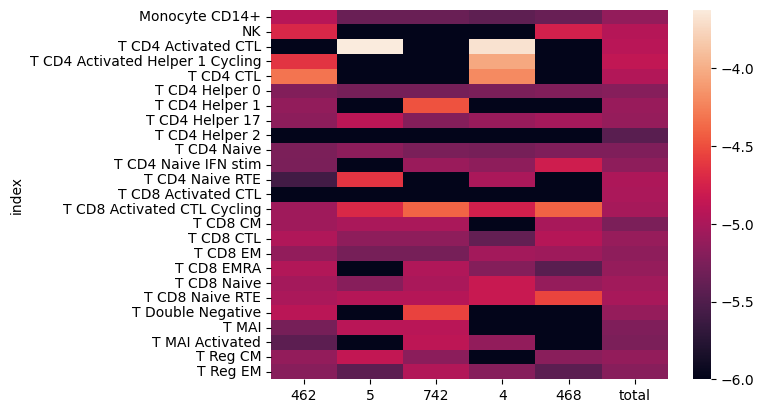

In [106]:
sns.heatmap(chi_res_df.reset_index().sort_values('index').set_index('index'))

<AxesSubplot: ylabel='index'>

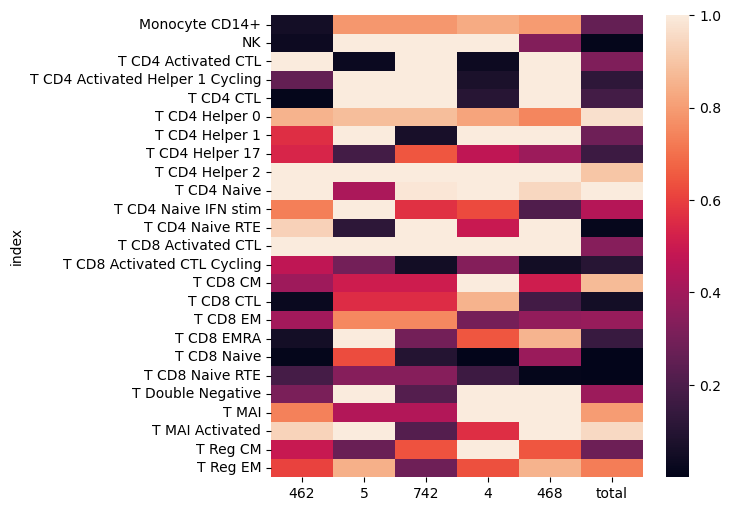

In [107]:
plt.figure(figsize=(6, 6))

sns.heatmap(fisher_res_df.reset_index().sort_values('index').set_index('index'))

<AxesSubplot: ylabel='index'>

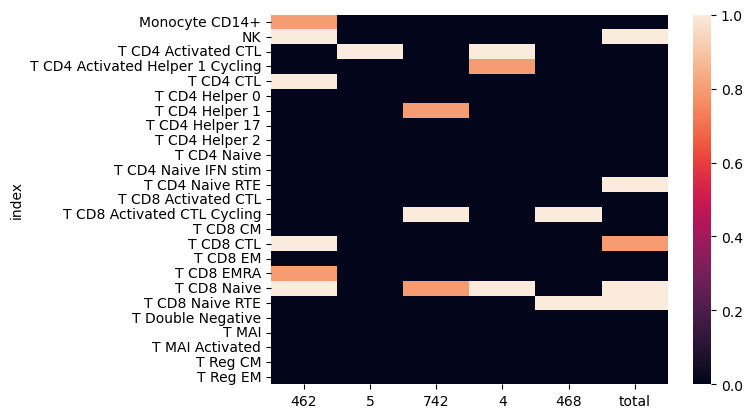

In [108]:
fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)
sns.heatmap(fisher_res_to_plot)

<AxesSubplot: ylabel='index'>

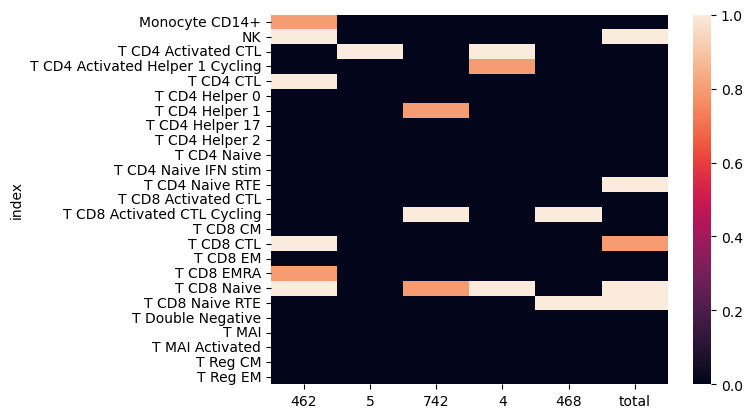

In [109]:
fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)
sns.heatmap(fisher_res_to_plot)

In [110]:
fisher_res_df.reset_index().sort_values('index').set_index('index')

462         5       742         4  \
index                                                                      
Monocyte CD14+                    0.052525  0.788770  0.788770  0.835275   
NK                                0.034838  1.000000  1.000000  1.000000   
T CD4 Activated CTL               1.000000  0.029243  1.000000  0.033840   
T CD4 Activated Helper 1 Cycling  0.257231  1.000000  1.000000  0.073247   
T CD4 CTL                         0.009873  1.000000  1.000000  0.104577   
T CD4 Helper 0                    0.855231  0.882460  0.882460  0.818681   
T CD4 Helper 1                    0.562153  1.000000  0.065404  1.000000   
T CD4 Helper 17                   0.537915  0.177618  0.646935  0.468966   
T CD4 Helper 2                    1.000000  1.000000  1.000000  1.000000   
T CD4 Naive                       0.999995  0.424513  0.986628  0.997517   
T CD4 Naive IFN stim              0.732244  1.000000  0.568614  0.622890   
T CD4 Naive RTE                   0.931164  0.117816  1.000000  0.495678   
T CD8 Activated CTL               1.000000  1.000000  1.000000  1.000000   
T CD8 Activated CTL Cycling       0.469175  0.294524  0.048050  0.332811   
T CD8 CM                          0.391626  0.504008  0.504008  1.000000   
T CD8 CTL                         0.026475  0.557340  0.557340  0.853108   
T CD8 EM                          0.405806  0.751154  0.751154  0.297705   
T CD8 EMRA                        0.054631  1.000000  0.295376  0.648421   
T CD8 Naive                       0.010308  0.625449  0.094919  0.000235   
T CD8 Naive RTE                   0.181018  0.336280  0.336280  0.162588   
T Double Negative                 0.312403  1.000000  0.220742  1.000000   
T MAI                             0.735015  0.438098  0.438098  1.000000   
T MAI Activated                   0.935557  1.000000  0.220214  0.561206   
T Reg CM                          0.488872  0.269863  0.639424  1.000000   
T Reg EM                          0.606152  0.846279  0.284010  0.636349   

                                       468         total  
index                                                     
Monocyte CD14+                    0.795235  2.609267e-01  
NK                                0.329889  9.069757e-03  
T CD4 Activated CTL               1.000000  3.240327e-01  
T CD4 Activated Helper 1 Cycling  1.000000  1.215983e-01  
T CD4 CTL                         1.000000  1.777348e-01  
T CD4 Helper 0                    0.746452  9.713198e-01  
T CD4 Helper 1                    1.000000  2.848187e-01  
T CD4 Helper 17                   0.387916  1.562958e-01  
T CD4 Helper 2                    1.000000  9.001420e-01  
T CD4 Naive                       0.947958  1.000000e+00  
T CD4 Naive IFN stim              0.210626  4.456996e-01  
T CD4 Naive RTE                   1.000000  1.342095e-02  
T CD8 Activated CTL               1.000000  3.391470e-01  
T CD8 Activated CTL Cycling       0.049776  1.028514e-01  
T CD8 CM                          0.510913  8.717114e-01  
T CD8 CTL                         0.175443  5.193371e-02  
T CD8 EM                          0.364902  3.756589e-01  
T CD8 EMRA                        0.858223  1.496659e-01  
T CD8 Naive                       0.384531  6.748635e-10  
T CD8 Naive RTE                   0.007848  3.629870e-03  
T Double Negative                 1.000000  3.901668e-01  
T MAI                             1.000000  7.992755e-01  
T MAI Activated                   1.000000  9.514758e-01  
T Reg CM                          0.646703  2.774491e-01  
T Reg EM                          0.851927  7.301751e-01

In [111]:
len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique())

144

In [112]:
cluster = 462
subtype = 'T CD4 Naive'
cell_type_counts_df[cluster][subtype]

210.0

In [113]:
cell_type_counts_df[cluster].sum()

454.0

In [114]:
len(res[res['cluster_id'] == cluster].cdr3.unique())

650

In [115]:
sc_data.celltypist_majority.value_counts()

celltypist_majority
T CD4 Naive                         86702
T CD4 Helper 0                      22552
T CD8 CTL                           16628
T CD8 Naive                         14264
T CD8 EM                             9574
T CD8 EMRA                           9421
T MAI Activated                      3599
T CD4 Helper 17                      3233
Monocyte CD14+                       3024
T Reg EM                             2743
T CD8 Naive RTE                      1737
T Reg CM                             1475
T CD4 Naive IFN stim                 1220
T MAI                                1215
T CD8 CM                             1021
T CD4 Naive RTE                       853
T CD4 Helper 1                        609
NK                                    580
T CD8 Activated CTL Cycling           535
T Double Negative                     368
T CD4 CTL                             156
T CD4 Helper 2                        149
T CD4 Activated Helper 1 Cycling       94
T CD8 Activate

# OLGA analysis

In [116]:
res_olga = pd.read_csv('/home/dluppov/milarge_files/vdj_tools_data/OLGA_vdj_single.txt', sep = '\t')
res_olga

count          freq  \
0            1  1.000000e-07   
1            1  1.000000e-07   
2            1  1.000000e-07   
3            1  1.000000e-07   
4            1  1.000000e-07   
...        ...           ...   
8771731      1  1.000000e-07   
8771732      1  1.000000e-07   
8771733      1  1.000000e-07   
8771734      1  1.000000e-07   
8771735      1  1.000000e-07   

                                                    cdr3nt  \
0                  TGTGCCAGCAGCGGTAGGGGGACACTATTGGGCACCTTC   
1                              TGTGGACGGAAGGACGAGCAGTACTTC   
2                     TGCAGTGCTCGGGGCGTCTTCTCTGAAGCTTTCTTT   
3            TGTGCCACCAATGACAGGGGGCGCACCTACAATGAGCAGTTCTTC   
4        TGTGCCAGCAGTTTAGCTGGACTAGCGGGTTGTCGGAAGTTGACGG...   
...                                                    ...   
8771731  TGTGCCAGCAGTTACTCGACCCGCCCGGTGCGGACCGGGGAGCTGT...   
8771732      TGTGCCCCGGAGGGGGAGAGGGGGGGGTCCTACGAGCAGTACTTC   
8771733         TGTGCCAGCAGCCAAGACCCGGGACAGGGTTCGGCTTTCTTT   
8771734   TGCAGTGCTAGAGATCGCCGGGACAGGGGGAACACTGAAGCTTTCTTT   
8771735  TGTGCCAGCTCACCACCCTGCCGGCGCCTTAGCTATCTCACAGATA...   

                        cdr3aa         v  d        j  VEnd  DStart  DEnd  \
0                CASSGRGTLLGTF   TRBV7-9  .  TRBJ1-2    -1      -1    -1   
1                    CGRKDEQYF  TRBV20-1  .  TRBJ2-7    -1      -1    -1   
2                 CSARGVFSEAFF  TRBV20-1  .  TRBJ1-1    -1      -1    -1   
3              CATNDRGRTYNEQFF  TRBV24-1  .  TRBJ2-1    -1      -1    -1   
4        CASSLAGLAGCRKLTEETQYF    TRBV27  .  TRBJ2-5    -1      -1    -1   
...                        ...       ... ..      ...   ...     ...   ...   
8771731      CASSYSTRPVRTGELFF   TRBV6-5  .  TRBJ2-2    -1      -1    -1   
8771732        CAPEGERGGSYEQYF  TRBV24-1  .  TRBJ2-7    -1      -1    -1   
8771733         CASSQDPGQGSAFF   TRBV3-1  .  TRBJ1-1    -1      -1    -1   
8771734       CSARDRRDRGNTEAFF  TRBV20-1  .  TRBJ1-1    -1      -1    -1   
8771735    CASSPPCRRLSYLTDTQYF    TRBV18  .  TRBJ2-3    -1      -1    -1   

         JStart  degree.s  group.count.s  group2.count.s  degree.c  \
0            -1         1        8771736            3898         0   
1            -1         6        8771736            1556         0   
2            -1         2        8771736            8576         0   
3            -1         1        8771736            7204         0   
4            -1         1        8771736             287         0   
...         ...       ...            ...             ...       ...   
8771731      -1         2        8771736            3079         0   
8771732      -1         1        8771736           13934         0   
8771733      -1         3        8771736            3103         0   
8771734      -1         4        8771736            8922         0   
8771735      -1         1        8771736             737         0   

         group.count.c  group2.count.c  p.value.g  p.value.g2  
0               964889             716   1.000000    1.000000  
1               964889              15   0.889821    1.000000  
2               964889            1333   0.998975    0.989611  
3               964889             807   1.000000    1.000000  
4               964889               7   1.000000    1.000000  
...                ...             ...        ...         ...  
8771731         964889               0   0.998975    1.000000  
8771732         964889             385   1.000000    1.000000  
8771733         964889               0   0.994319    1.000000  
8771734         964889             723   0.980207    0.998222  
8771735         964889              42   1.000000    1.000000  

[8771736 rows x 19 columns]

In [117]:
res_olga_cutted = res_olga.sort_values('p.value.g').head(10000)
res_olga_cutted

count          freq                                   cdr3nt  \
1138699      1  1.000000e-07  TGTGCCAGCAGCGTTCCAAGGAGGTACGAGCAGTACTTC   
4930331      1  1.000000e-07              TGTGCCAGCAGCCGCAGGGGATACTTT   
3072728      1  1.000000e-07           TGTGCCAGCAGCTTGGCGGGCCGGTACTTC   
5797218      1  1.000000e-07        TGTGCCAGAGGGGGTTGCTACGAGCAGTACTTC   
867247       2  2.000000e-07              TGTGCCACGTCGGACGAGCAGTACTTC   
...        ...           ...                                      ...   
4605929      1  1.000000e-07           TGTGCCTTTAGGGGCACTGAAGCTTTCTTT   
709584       1  1.000000e-07        TGTGCCAGCAGGACCTTAAGTGAAGCTTTCTTT   
4378487      1  1.000000e-07           TGTGCCAGCAGTTACGGACGGGGGTACTTC   
4445622      1  1.000000e-07           TGTGCCAGCTACTTAGACGAGCAGTACTTC   
1262177      1  1.000000e-07     TGTGCCAGGGGGGGCCGAGACTACGAGCAGTACTTC   

                cdr3aa         v  d        j  VEnd  DStart  DEnd  JStart  \
1138699  CASSVPRRYEQYF     TRBV9  .  TRBJ2-7    -1      -1    -1      -1   
4930331      CASSRRGYF   TRBV7-9  .  TRBJ1-1    -1      -1    -1      -1   
3072728     CASSLAGRYF   TRBV5-4  .  TRBJ2-7    -1      -1    -1      -1   
5797218    CARGGCYEQYF    TRBV28  .  TRBJ2-7    -1      -1    -1      -1   
867247       CATSDEQYF    TRBV19  .  TRBJ2-7    -1      -1    -1      -1   
...                ...       ... ..      ...   ...     ...   ...     ...   
4605929     CAFRGTEAFF  TRBV12-3  .  TRBJ1-1    -1      -1    -1      -1   
709584     CASRTLSEAFF     TRBV9  .  TRBJ1-1    -1      -1    -1      -1   
4378487     CASSYGRGYF   TRBV6-5  .  TRBJ2-7    -1      -1    -1      -1   
4445622     CASYLDEQYF    TRBV27  .  TRBJ2-7    -1      -1    -1      -1   
1262177   CARGGRDYEQYF  TRBV10-3  .  TRBJ2-7    -1      -1    -1      -1   

         degree.s  group.count.s  group2.count.s  degree.c  group.count.c  \
1138699        47        8771736            7235         0         964889   
4930331        54        8771736             170         0         964889   
3072728        48        8771736             270         0         964889   
5797218        46        8771736            1769         0         964889   
867247         47        8771736             412         0         964889   
...           ...            ...             ...       ...            ...   
4605929        28        8771736             279         0         964889   
709584         28        8771736            1138         0         964889   
4378487        28        8771736             824         0         964889   
4445622        28        8771736            1182         0         964889   
1262177        28        8771736            4029         0         964889   

         group2.count.c     p.value.g    p.value.g2  
1138699             520  0.000000e+00  2.555958e-12  
4930331               9  0.000000e+00  8.958390e-13  
3072728               1  0.000000e+00  1.000000e+00  
5797218             241  0.000000e+00  0.000000e+00  
867247                3  0.000000e+00  1.000000e+00  
...                 ...           ...           ...  
4605929               0  3.709476e-07  1.000000e+00  
709584               26  3.709476e-07  9.915388e-01  
4378487               9  3.709476e-07  1.000000e+00  
4445622              16  3.709476e-07  1.000000e+00  
1262177             291  3.709476e-07  5.130684e-04  

[10000 rows x 19 columns]

In [118]:
import time

start = time.time()
res = process_all_lenghts(res_olga_cutted)
end = time.time()

pd.Series(res).to_csv('./olga_clusters.csv')    

res = pd.read_csv('./olga_clusters.csv', index_col=0)
res = res['0'].apply(eval)

exploded_series = res.explode()

res_exploded = pd.DataFrame(exploded_series).reset_index()
res_exploded.rename(columns = {"0": 'cdr3', 'index': 'cluster_id'}, inplace=True)
res_exploded.set_index('cdr3', inplace=True)

Start processing
processing lenghts 10 started
processing lenghts 11 started
processing lenghts 12 started
processing lenghts 9 startedprocessing lenghts 13 startedprocessing lenghts 14 startedprocessing lenghts 8 started
processing lenghts 15 started
processing lenghts 16 started


processing lenghts 8 completed
processing lenghts 16 completed

processing lenghts 15 completedprocessing lenghts 9 completed

processing lenghts 10 completed
processing lenghts 14 completed
processing lenghts 11 completed
processing lenghts 12 completed
processing lenghts 13 completed


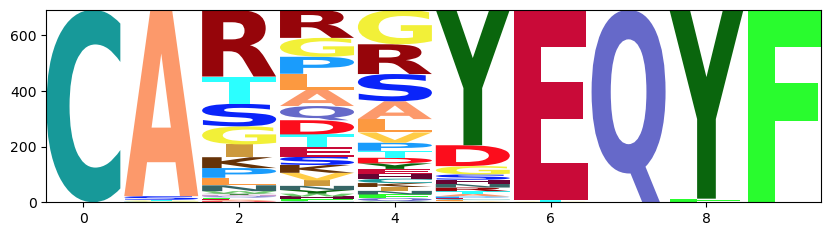

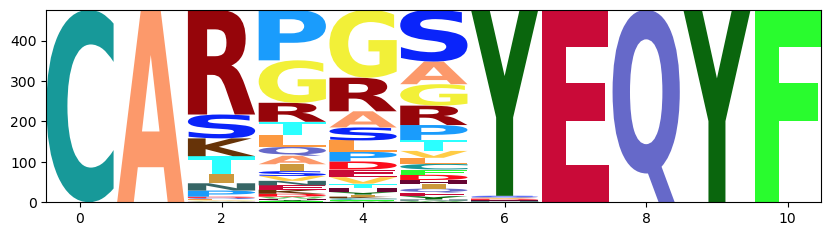

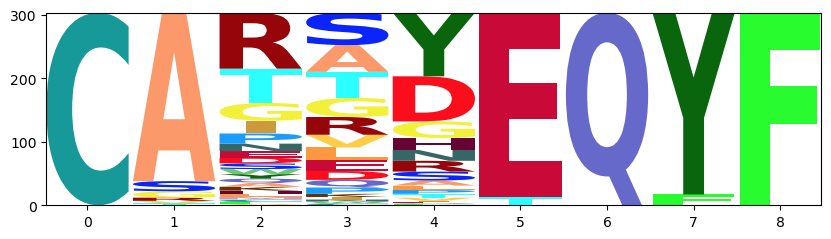

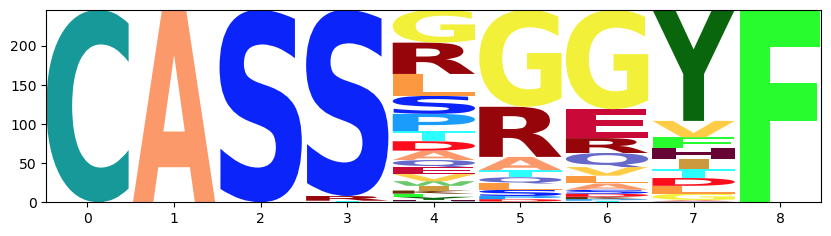

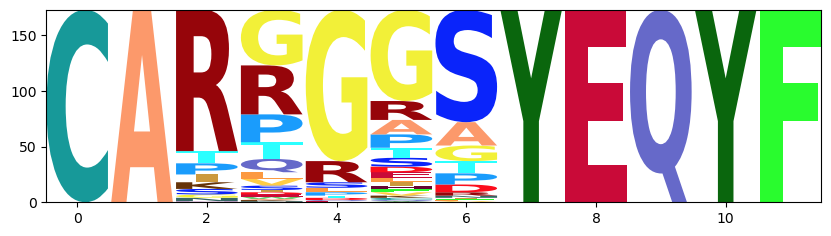

In [119]:
res = res_exploded.reset_index()

dif_clusters = res['cluster_id'].value_counts().head(5).index

import logomaker

for cluster in dif_clusters:
    clones = res[res['cluster_id'] == cluster].cdr3
    mat_df = logomaker.alignment_to_matrix(clones)
    logomaker.Logo(mat_df, color_scheme='skylign_protein', ax=None)

In [120]:
dif_clusters = res['cluster_id'].value_counts().head(5).index

types_dict = {}

for cluster in dif_clusters:
    
    cur_claster = set(res[res.cluster_id == cluster].cdr3)
    
    types_dict[cluster] = {}
    
    cur_founded_cluster = sc_data[sc_data.cdr3_b_aa.apply(lambda x: x in cur_claster)]
    
    for subtype in cur_founded_cluster.celltypist_majority.unique():
        types_dict[cluster][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_b_aa.unique())
        
cur_claster = set(res.cdr3)
types_dict['total'] = {}
cur_founded_cluster = sc_data[sc_data.cdr3_b_aa.apply(lambda x: x in cur_claster)]
for subtype in cur_founded_cluster.celltypist_majority.unique():
    types_dict['total'][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_b_aa.unique())

In [121]:
cell_type_counts_df = pd.DataFrame(types_dict)
cell_type_counts_df = cell_type_counts_df.fillna(0)
cell_type_counts_df

1  189  1105  1104  550  total
T CD4 Naive      0.0  0.0   0.0   0.0  0.0     18
T CD4 Helper 0   0.0  0.0   0.0   0.0  0.0      4
T CD8 EM         0.0  0.0   0.0   0.0  0.0      2
T CD8 Naive      0.0  0.0   0.0   0.0  0.0      2
T CD8 CM         0.0  0.0   0.0   0.0  0.0      1
T CD8 CTL        0.0  0.0   0.0   0.0  0.0      1
T MAI Activated  0.0  0.0   0.0   0.0  0.0      1
Monocyte CD14+   0.0  0.0   0.0   0.0  0.0      1
T Reg EM         0.0  0.0   0.0   0.0  0.0      1

In [122]:
fisher_res = {}
chi_statistics = {}

for cluster in cell_type_counts_df.columns:
    fisher_res[cluster] = {}
    chi_statistics[cluster] = {}
    for subtype in cell_type_counts_df.index:
        fisher_table = [
            [cell_type_counts_df[cluster][subtype], cell_type_counts_df[cluster].sum() - cell_type_counts_df[cluster][subtype]], 
            [len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique()), len(sc_data[sc_data.celltypist_majority != subtype].cdr3_b_aa.unique())]
                       ]
        
        fisher_res[cluster][subtype] = fisher_exact(fisher_table, alternative='greater')[1]
        chi_statistics[cluster][subtype] = cell_type_counts_df[cluster][subtype]/(cell_type_counts_df[cluster].sum()*len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique()))

/scratch/ipykernel_2269856/2584555866.py:14: RuntimeWarning: invalid value encountered in scalar divide
  chi_statistics[cluster][subtype] = cell_type_counts_df[cluster][subtype]/(cell_type_counts_df[cluster].sum()*len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique()))


In [123]:
fisher_res_df = pd.DataFrame(fisher_res)
chi_res_df = pd.DataFrame(chi_statistics)
fisher_res_df

1  189  1105  1104  550     total
T CD4 Naive      1.0  1.0   1.0   1.0  1.0  0.506881
T CD4 Helper 0   1.0  1.0   1.0   1.0  1.0  0.684538
T CD8 EM         1.0  1.0   1.0   1.0  1.0  0.341046
T CD8 Naive      1.0  1.0   1.0   1.0  1.0  0.810295
T CD8 CM         1.0  1.0   1.0   1.0  1.0  0.195410
T CD8 CTL        1.0  1.0   1.0   1.0  1.0  0.598527
T MAI Activated  1.0  1.0   1.0   1.0  1.0  0.396651
Monocyte CD14+   1.0  1.0   1.0   1.0  1.0  0.382518
T Reg EM         1.0  1.0   1.0   1.0  1.0  0.440465

<AxesSubplot: ylabel='index'>

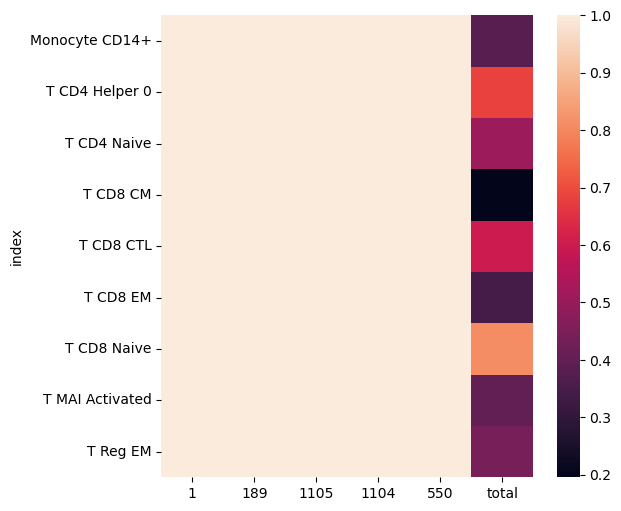

In [124]:
plt.figure(figsize=(6, 6))

sns.heatmap(fisher_res_df.reset_index().sort_values('index').set_index('index'))

<AxesSubplot: ylabel='index'>

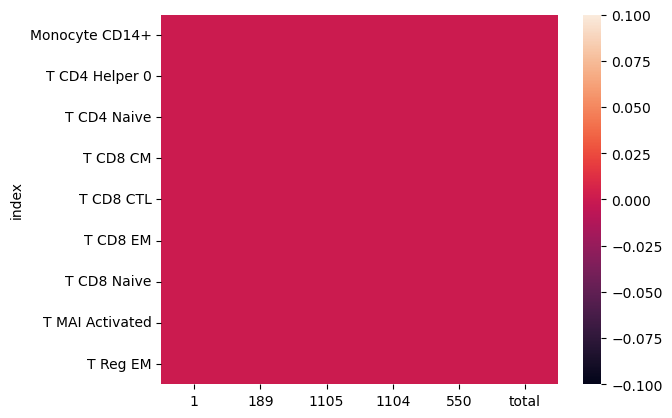

In [125]:
fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)
sns.heatmap(fisher_res_to_plot)

# Thymocytes SP

In [52]:
df_depleted = pd.read_csv('/home/dluppov/milarge_files/vdj_tools_data/Klaztman_B_vdj_DP.txt', sep = '\t')
df_enriched = pd.read_csv('/home/dluppov/milarge_files/vdj_tools_data/Klaztman_B_vdj_CD8.txt', sep = '\t')
df_depleted

count          freq  \
0            5  4.406237e-06   
1            1  8.812475e-07   
2            1  8.812475e-07   
3            1  8.812475e-07   
4            1  8.812475e-07   
...        ...           ...   
1134750      1  8.812475e-07   
1134751      1  8.812475e-07   
1134752      1  8.812475e-07   
1134753      1  8.812475e-07   
1134754      1  8.812475e-07   

                                                   cdr3nt            cdr3aa  \
0        TGTGCCAGCAGTTTCTCGACCTGTTCGGCTAACTATGGCTACACCTTC  CASSFSTCSANYGYTF   
1              TGCGCCAGCAGCTTCGGACTAGTGAGAAATGAGCAGTTCTTC    CASSFGLVRNEQFF   
2              TGTGCCAGCTCACCACCGGGGACAGGGAGAGAGCAGTACTTC    CASSPPGTGREQYF   
3              TGCGCCAGCAGCCAAGAGAGTCAGGGGATTGAAGCTTTCTTT    CASSQESQGIEAFF   
4                 TGCGCCAGCAGCCAAAGCGGGCCCGGGGAGCTGTTTTTT     CASSQSGPGELFF   
...                                                   ...               ...   
1134750        TGCAACGTTGGAACCCAGACAGACACCTACGAGCAGTACTTC    CNVGTQTDTYEQYF   
1134751     TGCAACGTTGAAGGCCCCTCCTTTGGTGGCACTGAAGCTTTCTTT   CNVEGPSFGGTEAFF   
1134752  TGCAACGTTGAAGATAGGGGAGGTAGGCGGAACACTGAAGCTTTCTTT  CNVEDRGGRRNTEAFF   
1134753        TGCAACAGTAGCGGAGCGGGGAGCCGCTATGTCTACACCTTC    CNSSGAGSRYVYTF   
1134754           TGCAAAGCCAAATCGGGGACAGCCTACGAGCAGTACTTC     CKAKSGTAYEQYF   

                v  d        j  VEnd  DStart  DEnd  JStart  degree.s  \
0        TRBV12-3  .  TRBJ1-2    -1      -1    -1      -1         8   
1         TRBV5-1  .  TRBJ2-1    -1      -1    -1      -1         2   
2          TRBV18  .  TRBJ2-7    -1      -1    -1      -1         4   
3         TRBV4-3  .  TRBJ1-1    -1      -1    -1      -1         2   
4         TRBV4-3  .  TRBJ2-2    -1      -1    -1      -1        19   
...           ... ..      ...   ...     ...   ...     ...       ...   
1134750  TRBV29-1  .  TRBJ2-7    -1      -1    -1      -1         2   
1134751  TRBV29-1  .  TRBJ1-1    -1      -1    -1      -1         2   
1134752  TRBV29-1  .  TRBJ1-1    -1      -1    -1      -1         2   
1134753   TRBV4-3  .  TRBJ1-2    -1      -1    -1      -1         1   
1134754  TRBV20-1  .  TRBJ2-7    -1      -1    -1      -1         1   

         group.count.s  group2.count.s  degree.c  group.count.c  \
0              1134755             597         5         996023   
1              1134755            2300         5         996023   
2              1134755             981        11         996023   
3              1134755             507         0         996023   
4              1134755             122        29         996023   
...                ...             ...       ...            ...   
1134750        1134755             737         0         996023   
1134751        1134755             317         0         996023   
1134752        1134755             184         0         996023   
1134753        1134755             425         0         996023   
1134754        1134755            3769         0         996023   

         group2.count.c  p.value.g  p.value.g2  
0                   481   0.377228    0.467415  
1                  1978   0.992646    0.993480  
2                   684   0.999384    0.999966  
3                   729   0.463748    0.307912  
4                   139   0.998186    0.943323  
...                 ...        ...         ...  
1134750            1128   0.463748    0.291481  
1134751             215   0.463748    0.561697  
1134752              97   0.463748    0.663173  
1134753             572   1.000000    1.000000  
1134754            3579   1.000000    1.000000  

[1134755 rows x 19 columns]

In [53]:
res_thym_cd8_cutted = df_enriched.sort_values('p.value.g').head(10000)
res_thym_cd8_cutted

count      freq                                      cdr3nt  \
715152      1  0.000001  TGTGCCAGCAGCTTAGGCGGGGGCAGCACTGAAGCTTTCTTT   
566234      1  0.000001        TGCGCCAGCAGCAAGGGGGGTACTGAAGCTTTCTTT   
102972      1  0.000001           TGTGCCATCAGCCCCAGCTACGAGCAGTACTTC   
872659      1  0.000001     TGTGCCAGCAGCCCCCTGAGCTCCTACGAGCAGTACTTC   
872637      1  0.000001        TGTGCCAGCAGCCCCCTGGGGAATGAGCAGTTCTTC   
...       ...       ...                                         ...   
58253       3  0.000003     TGTGCCAGCAGCCAAGGGACTTCCTACGAGCAGTACTTC   
930894      3  0.000003        TGCGCCAGCAGCCAAGGGGACACTGAAGCTTTCTTT   
58274       1  0.000001  TGTGCCAGCAGCGTTGGGGGGGCGAGCTACGAGCAGTACTTC   
58276       1  0.000001  TGTGCCAGCAGCGTGGGGGGTCTGAACACTGAAGCTTTCTTT   
58202       4  0.000004        TGTGCCAGCAGCCCAGACAGCTACGAGCAGTACTTC   

                cdr3aa        v  d        j  VEnd  DStart  DEnd  JStart  \
715152  CASSLGGGSTEAFF   TRBV13  .  TRBJ1-1    -1      -1    -1      -1   
566234    CASSKGGTEAFF  TRBV4-1  .  TRBJ1-1    -1      -1    -1      -1   
102972     CAISPSYEQYF  TRBV6-6  .  TRBJ2-7    -1      -1    -1      -1   
872659   CASSPLSSYEQYF   TRBV27  .  TRBJ2-7    -1      -1    -1      -1   
872637    CASSPLGNEQFF  TRBV7-9  .  TRBJ2-1    -1      -1    -1      -1   
...                ...      ... ..      ...   ...     ...   ...     ...   
58253    CASSQGTSYEQYF  TRBV3-1  .  TRBJ2-7    -1      -1    -1      -1   
930894    CASSQGDTEAFF  TRBV4-1  .  TRBJ1-1    -1      -1    -1      -1   
58274   CASSVGGASYEQYF    TRBV9  .  TRBJ2-7    -1      -1    -1      -1   
58276   CASSVGGLNTEAFF    TRBV9  .  TRBJ1-1    -1      -1    -1      -1   
58202     CASSPDSYEQYF  TRBV7-9  .  TRBJ2-7    -1      -1    -1      -1   

        degree.s  group.count.s  group2.count.s  degree.c  group.count.c  \
715152       106         996023             335        46        1134755   
566234       322         996023             438       133        1134755   
102972        84         996023             167        26        1134755   
872659       167         996023            5014        86        1134755   
872637       251         996023            1470       103        1134755   
...          ...            ...             ...       ...            ...   
58253        304         996023             646       131        1134755   
930894       205         996023             438       116        1134755   
58274         98         996023            2307        39        1134755   
58276        114         996023            1041        41        1134755   
58202        458         996023            2147       223        1134755   

        group2.count.c  p.value.g    p.value.g2  
715152             171        0.0  7.899360e-02  
566234             159        0.0  9.928932e-01  
102972             108        0.0  5.140712e-09  
872659            1725        0.0  1.000000e+00  
872637             533        0.0  9.847328e-01  
...                ...        ...           ...  
58253              496        0.0  0.000000e+00  
930894             159        0.0  1.000000e+00  
58274             1161        0.0  2.424935e-02  
58276              658        0.0  7.165910e-08  
58202              575        0.0  1.000000e+00  

[10000 rows x 19 columns]

In [128]:
import time

start = time.time()
res = process_all_lenghts(res_thym_cd8_cutted)
end = time.time()

pd.Series(res).to_csv('./thym_cd8_clusters.csv')    

res = pd.read_csv('./thym_cd8_clusters.csv', index_col=0)
res = res['0'].apply(eval)

exploded_series = res.explode()

res_exploded = pd.DataFrame(exploded_series).reset_index()
res_exploded.rename(columns = {"0": 'cdr3', 'index': 'cluster_id'}, inplace=True)
res_exploded.set_index('cdr3', inplace=True)

Start processing
processing lenghts 13 startedprocessing lenghts 12 startedprocessing lenghts 14 startedprocessing lenghts 11 startedprocessing lenghts 15 started
processing lenghts 10 started




processing lenghts 15 completedprocessing lenghts 10 completed

processing lenghts 11 completed
processing lenghts 14 completed
processing lenghts 12 completed
processing lenghts 13 completed


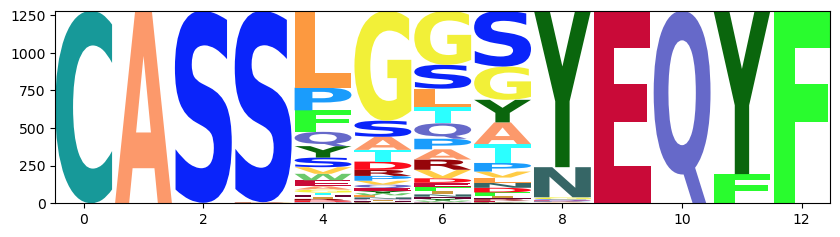

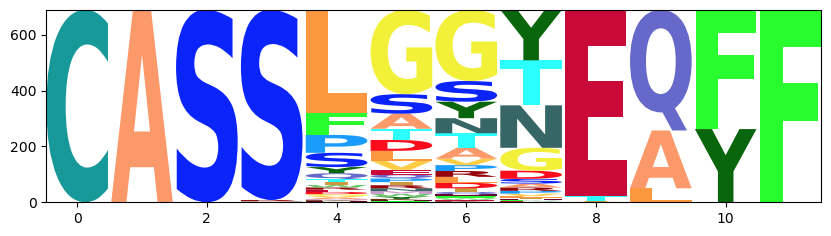

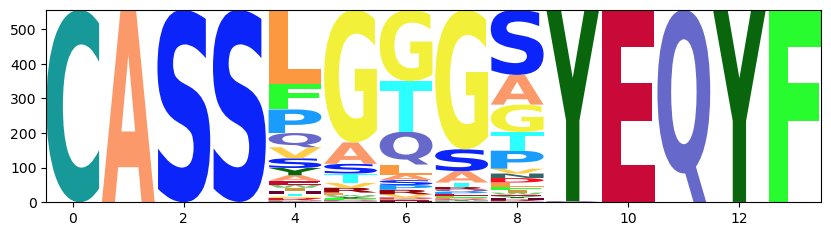

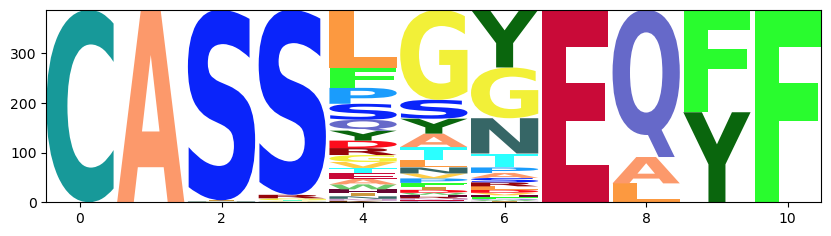

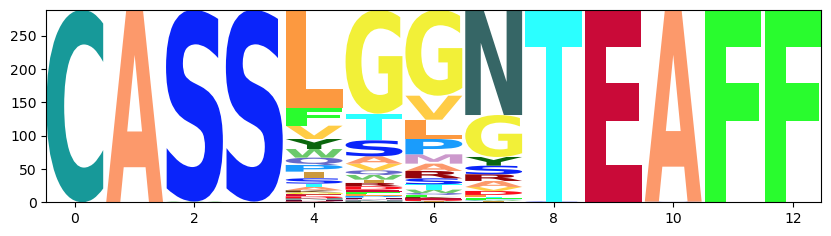

In [130]:
res = res_exploded.reset_index()

dif_clusters = res['cluster_id'].value_counts().head(5).index

import logomaker

for cluster in dif_clusters:
    clones = res[res['cluster_id'] == cluster].cdr3
    mat_df = logomaker.alignment_to_matrix(clones)
    logomaker.Logo(mat_df, color_scheme='skylign_protein', ax=None)

In [131]:
dif_clusters = res['cluster_id'].value_counts().head(5).index

types_dict = {}

for cluster in dif_clusters:
    
    cur_claster = set(res[res.cluster_id == cluster].cdr3)
    
    types_dict[cluster] = {}
    
    cur_founded_cluster = sc_data[sc_data.cdr3_b_aa.apply(lambda x: x in cur_claster)]
    
    for subtype in cur_founded_cluster.celltypist_majority.unique():
        types_dict[cluster][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_b_aa.unique())
        
cur_claster = set(res.cdr3)
types_dict['total'] = {}
cur_founded_cluster = sc_data[sc_data.cdr3_b_aa.apply(lambda x: x in cur_claster)]
for subtype in cur_founded_cluster.celltypist_majority.unique():
    types_dict['total'][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_b_aa.unique())

In [132]:
cell_type_counts_df = pd.DataFrame(types_dict)
cell_type_counts_df = cell_type_counts_df.fillna(0)
cell_type_counts_df

0     93    174    269      3  total
T CD8 Naive                        94.0   92.0   55.0   57.0   43.0    428
T CD4 Naive                       259.0  217.0  127.0  133.0  104.0   1113
T CD8 EMRA                         22.0   16.0    6.0    5.0    9.0     68
T CD8 EM                           34.0   35.0   11.0   21.0   15.0    142
T CD4 Helper 0                     68.0   75.0   27.0   48.0   36.0    326
T Reg EM                           10.0   11.0    4.0   16.0    7.0     57
T CD8 CTL                          25.0   18.0    8.0   17.0   18.0    111
T CD4 Helper 17                    12.0   13.0    6.0    4.0    9.0     57
T CD4 Helper 1                      5.0    3.0    1.0    0.0    0.0     13
T CD8 Naive RTE                    15.0    8.0    4.0   13.0    4.0     55
T CD8 CM                            3.0    5.0    0.0    4.0    3.0     19
T CD4 Naive IFN stim                8.0    6.0    2.0    2.0    2.0     23
T Reg CM                            4.0   11.0    1.0    4.0    4.0     31
T Double Negative                   1.0    0.0    0.0    1.0    1.0      4
NK                                  3.0    2.0    1.0    5.0    1.0     15
T CD4 Naive RTE                     5.0    4.0    2.0    2.0    1.0     21
T CD8 Activated CTL Cycling         3.0    1.0    2.0    4.0    1.0     12
T CD4 CTL                           1.0    1.0    1.0    1.0    3.0      9
T MAI                               2.0    4.0    0.0    0.0    0.0      7
T MAI Activated                     5.0    1.0    3.0    1.0    1.0     15
Monocyte CD14+                      9.0    5.0    6.0    4.0    8.0     40
T CD4 Helper 2                      2.0    0.0    1.0    0.0    1.0      5
T CD8 Activated CTL                 1.0    2.0    0.0    0.0    0.0      4
T CD4 Activated Helper 1 Cycling    0.0    1.0    1.0    0.0    0.0      2
T CD4 Activated CTL                 0.0    0.0    1.0    0.0    0.0      1

In [133]:
fisher_res = {}
chi_statistics = {}

for cluster in cell_type_counts_df.columns:
    fisher_res[cluster] = {}
    chi_statistics[cluster] = {}
    for subtype in cell_type_counts_df.index:
        fisher_table = [
            [cell_type_counts_df[cluster][subtype], cell_type_counts_df[cluster].sum() - cell_type_counts_df[cluster][subtype]], 
            [len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique()), len(sc_data[sc_data.celltypist_majority != subtype].cdr3_b_aa.unique())]
                       ]
        
        fisher_res[cluster][subtype] = fisher_exact(fisher_table, alternative='greater')[1]
        chi_statistics[cluster][subtype] = cell_type_counts_df[cluster][subtype]/(cell_type_counts_df[cluster].sum()*len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique()))

In [134]:
fisher_res_df = pd.DataFrame(fisher_res)
chi_res_df = pd.DataFrame(chi_statistics)
fisher_res_df

0            93           174  \
T CD8 Naive                       8.758592e-07  2.232944e-08  6.864504e-08   
T CD4 Naive                       1.000000e+00  1.000000e+00  9.992912e-01   
T CD8 EMRA                        2.614029e-03  5.007013e-02  4.059015e-01   
T CD8 EM                          1.689938e-02  2.067874e-03  4.811043e-01   
T CD4 Helper 0                    9.884068e-01  6.500520e-01  9.903554e-01   
T Reg EM                          6.575756e-01  3.986154e-01  7.388459e-01   
T CD8 CTL                         4.199556e-02  2.845698e-01  5.252110e-01   
T CD4 Helper 17                   6.448408e-01  3.833061e-01  5.432334e-01   
T CD4 Helper 1                    1.027575e-01  3.786151e-01  6.745110e-01   
T CD8 Naive RTE                   6.005252e-03  3.050646e-01  4.041558e-01   
T CD8 CM                          7.808981e-01  3.149281e-01  1.000000e+00   
T CD4 Naive IFN stim              1.277154e-01  2.878540e-01  6.610942e-01   
T Reg CM                          8.496088e-01  2.188045e-02  9.362332e-01   
T Double Negative                 7.704274e-01  1.000000e+00  1.000000e+00   
NK                                4.081190e-01  6.154134e-01  6.532092e-01   
T CD4 Naive RTE                   2.704556e-01  3.809067e-01  4.719819e-01   
T CD8 Activated CTL Cycling       3.392869e-01  8.427336e-01  2.424083e-01   
T CD4 CTL                         4.298466e-01  3.964422e-01  2.266059e-01   
T MAI                             8.531675e-01  3.646704e-01  1.000000e+00   
T MAI Activated                   9.619522e-01  9.998230e-01  8.127747e-01   
Monocyte CD14+                    5.610129e-01  9.122882e-01  2.405429e-01   
T CD4 Helper 2                    1.193012e-01  1.000000e+00  2.366917e-01   
T CD8 Activated CTL               2.661480e-01  3.252259e-02  1.000000e+00   
T CD4 Activated Helper 1 Cycling  1.000000e+00  2.936988e-01  1.621888e-01   
T CD4 Activated CTL               1.000000e+00  1.000000e+00  7.696314e-02   

                                       269         3         total  
T CD8 Naive                       0.000028  0.000716  2.130471e-28  
T CD4 Naive                       1.000000  1.000000  1.000000e+00  
T CD8 EMRA                        0.777543  0.076047  5.619425e-03  
T CD8 EM                          0.028349  0.110743  4.152033e-05  
T CD4 Helper 0                    0.647202  0.760343  9.982602e-01  
T Reg EM                          0.000811  0.240899  1.073832e-01  
T CD8 CTL                         0.023719  0.001109  4.877783e-05  
T CD4 Helper 17                   0.942616  0.144900  4.935359e-01  
T CD4 Helper 1                    1.000000  1.000000  2.803945e-01  
T CD8 Naive RTE                   0.000308  0.406825  5.757347e-05  
T CD8 CM                          0.219002  0.294652  4.395979e-01  
T CD4 Naive IFN stim              0.780566  0.663064  4.091822e-01  
T Reg CM                          0.457723  0.297002  1.967973e-01  
T Double Negative                 0.573558  0.491103  8.809493e-01  
NK                                0.011943  0.654566  9.029172e-02  
T CD4 Naive RTE                   0.598004  0.797775  9.173393e-02  
T CD8 Activated CTL Cycling       0.032949  0.611287  1.965834e-01  
T CD4 CTL                         0.277769  0.002383  1.141591e-03  
T MAI                             1.000000  1.000000  9.911767e-01  
T MAI Activated                   0.996182  0.987885  9.999993e-01  
Monocyte CD14+                    0.773746  0.061434  5.075097e-01  
T CD4 Helper 2                    1.000000  0.237454  1.214068e-01  
T CD8 Activated CTL               1.000000  1.000000  4.998611e-02  
T CD4 Activated Helper 1 Cycling  1.000000  1.000000  5.020267e-01  
T CD4 Activated CTL               1.000000  1.000000  5.317039e-01

<AxesSubplot: ylabel='index'>

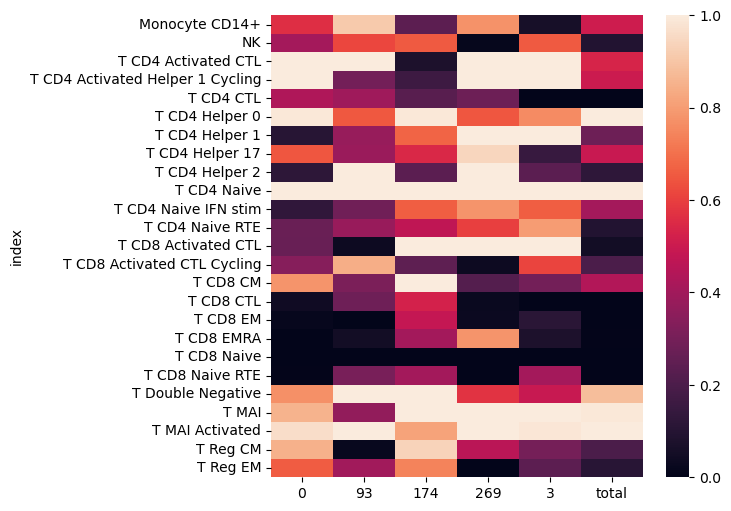

In [135]:
plt.figure(figsize=(6, 6))

sns.heatmap(fisher_res_df.reset_index().sort_values('index').set_index('index'))

<AxesSubplot: ylabel='index'>

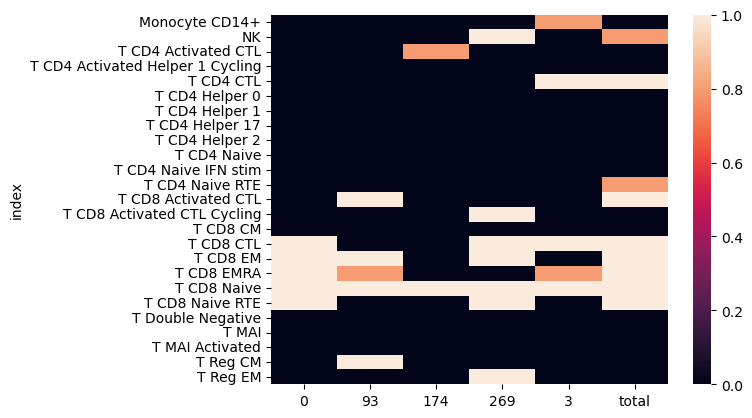

In [136]:
fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)
sns.heatmap(fisher_res_to_plot)

<AxesSubplot: ylabel='index'>

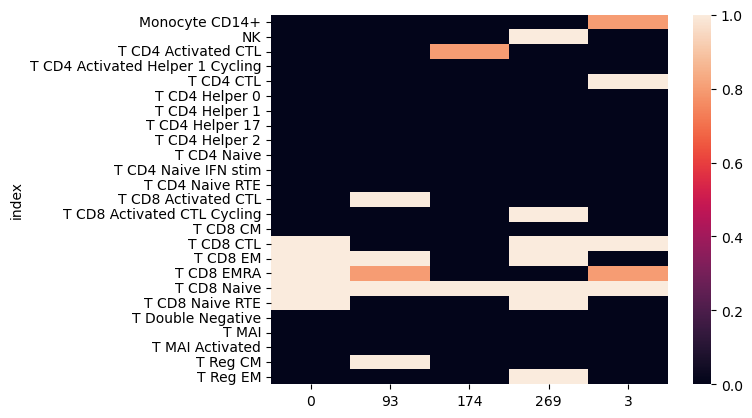

In [189]:
fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)
sns.heatmap(fisher_res_to_plot)

# Thymocites DP

In [22]:
res_thym_dp_cutted = df_depleted.sort_values('p.value.g').head(100000)
res_thym_dp_cutted

count          freq  \
959253       1  8.812475e-07   
1082418      1  8.812475e-07   
771846       1  8.812475e-07   
961518       1  8.812475e-07   
18691        1  8.812475e-07   
...        ...           ...   
594712       1  8.812475e-07   
546808       1  8.812475e-07   
684653       1  8.812475e-07   
1132882      1  8.812475e-07   
684972       1  8.812475e-07   

                                                    cdr3nt             cdr3aa  \
959253   TGTGCCAGCAGCCCCGGACAGGGGGGGTCTGGGGCCAACGTCCTGA...  CASSPGQGGSGANVLTF   
1082418               TGCAGTGCTAGAGTGGGCACTGATACGCAGTATTTT       CSARVGTDTQYF   
771846   TGTGCCAGCAGCCCGGGACAGGGTACCTCTGGGGCCAACGTCCTGA...  CASSPGQGTSGANVLTF   
961518   TGTGCCAGCAGCCCGGGACAGGGGAGCTCTGGGGCCAACGTCCTGA...  CASSPGQGSSGANVLTF   
18691    TGTGCCAGCAGTCCGGGACAGGGATTTTCTGGGGCCAACGTCCTGA...  CASSPGQGFSGANVLTF   
...                                                    ...                ...   
594712                TGCGCCAGCAGTGAGAGTCTTTATACGCAGTATTTT       CASSESLYTQYF   
546808    TGTGCCAGCAGCCAAGATGATAGCGGGAACAGCGGGGAGCTGTTTTTT   CASSQDDSGNSGELFF   
684653          TGTGCCAGCAGGAGGGAGGACATTAATGAAAAACTGTTTTTT     CASRREDINEKLFF   
1132882               TGCAGTGCTGCAACCGGAGTAGATACGCAGTATTTT       CSAATGVDTQYF   
684972          TGTGCCAGCAGACTAACGGGAGTTCGGAATGAGCAGTTCTTC     CASRLTGVRNEQFF   

                v  d        j  VEnd  DStart  DEnd  JStart  degree.s  \
959253    TRBV7-2  .  TRBJ2-6    -1      -1    -1      -1        39   
1082418  TRBV20-1  .  TRBJ2-3    -1      -1    -1      -1        41   
771846    TRBV7-8  .  TRBJ2-6    -1      -1    -1      -1        31   
961518   TRBV11-1  .  TRBJ2-6    -1      -1    -1      -1        47   
18691      TRBV27  .  TRBJ2-6    -1      -1    -1      -1        31   
...           ... ..      ...   ...     ...   ...     ...       ...   
594712   TRBV10-2  .  TRBJ2-3    -1      -1    -1      -1         3   
546808     TRBV14  .  TRBJ2-2    -1      -1    -1      -1         3   
684653    TRBV6-1  .  TRBJ1-4    -1      -1    -1      -1         3   
1132882  TRBV20-1  .  TRBJ2-3    -1      -1    -1      -1         3   
684972     TRBV27  .  TRBJ2-1    -1      -1    -1      -1         3   

         group.count.s  group2.count.s  degree.c  group.count.c  \
959253         1134755             145         5         996023   
1082418        1134755             775         5         996023   
771846         1134755              67         1         996023   
961518         1134755              10         2         996023   
18691          1134755             244         2         996023   
...                ...             ...       ...            ...   
594712         1134755              36         0         996023   
546808         1134755             293         0         996023   
684653         1134755             356         0         996023   
1132882        1134755             775         0         996023   
684972         1134755            1451         0         996023   

         group2.count.c  p.value.g    p.value.g2  
959253               67   0.000000  3.564832e-09  
1082418             276   0.000000  4.368800e-07  
771846               36   0.000000  0.000000e+00  
961518                5   0.000000  0.000000e+00  
18691               157   0.000000  6.725523e-16  
...                 ...        ...           ...  
594712               33   0.158276  1.466035e-01  
546808               83   0.158276  7.003000e-01  
684653               94   0.158276  7.415368e-01  
1132882             276   0.158276  5.652114e-01  
684972             3378   0.158276  2.752665e-02  

[100000 rows x 19 columns]

In [23]:
import time

start = time.time()
res = process_all_lenghts(res_thym_dp_cutted)
end = time.time()

pd.Series(res).to_csv('./thym_dp_clusters.csv')    

res = pd.read_csv('./thym_dp_clusters.csv', index_col=0)
res = res['0'].apply(eval)

exploded_series = res.explode()

res_exploded = pd.DataFrame(exploded_series).reset_index()
res_exploded.rename(columns = {"0": 'cdr3', 'index': 'cluster_id'}, inplace=True)
res_exploded.set_index('cdr3', inplace=True)

Start processing
processing lenghts 15 started
processing lenghts 14 started
processing lenghts 16 started
processing lenghts 13 started
processing lenghts 12 started
processing lenghts 18 startedprocessing lenghts 11 started
processing lenghts 17 started

processing lenghts 19 startedprocessing lenghts 10 started
processing lenghts 9 started
processing lenghts 20 started
processing lenghts 22 startedprocessing lenghts 21 startedprocessing lenghts 23 started
processing lenghts 7 startedprocessing lenghts 8 startedprocessing lenghts 24 started




processing lenghts 7 completed
processing lenghts 23 completed
processing lenghts 24 completedprocessing lenghts 8 completed

processing lenghts 9 completed
processing lenghts 22 completed

processing lenghts 21 completed
processing lenghts 10 completed
processing lenghts 20 completed
processing lenghts 11 completed
processing lenghts 19 completed
processing lenghts 12 completed
processing lenghts 18 completed
processing lenghts 17 completed
p

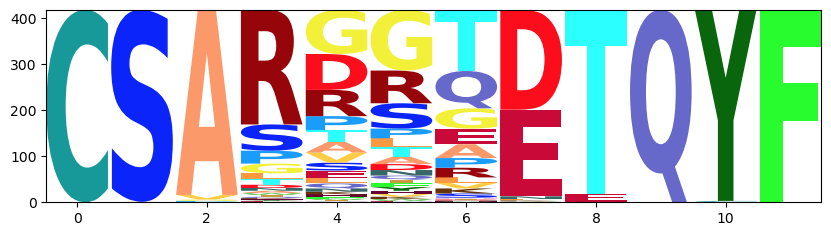

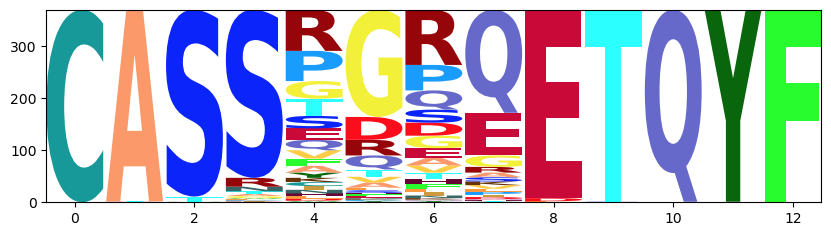

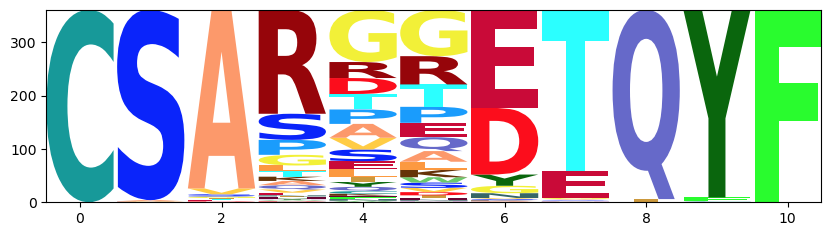

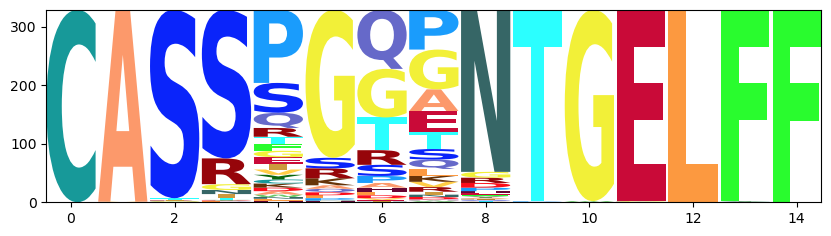

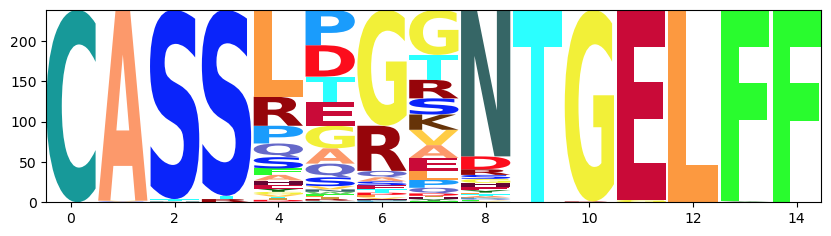

In [24]:
res = res_exploded.reset_index()

dif_clusters = res['cluster_id'].value_counts().head(5).index

import logomaker

for cluster in dif_clusters:
    clones = res[res['cluster_id'] == cluster].cdr3
    mat_df = logomaker.alignment_to_matrix(clones)
    logomaker.Logo(mat_df, color_scheme='skylign_protein', ax=None)

In [25]:
dif_clusters = res['cluster_id'].value_counts().head(5).index

types_dict = {}

for cluster in dif_clusters:
    
    cur_claster = set(res[res.cluster_id == cluster].cdr3)
    
    types_dict[cluster] = {}
    
    cur_founded_cluster = sc_data[sc_data.cdr3_b_aa.apply(lambda x: x in cur_claster)]
    
    for subtype in cur_founded_cluster.celltypist_majority.unique():
        types_dict[cluster][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_b_aa.unique())

cur_claster = set(res.cdr3)
types_dict['total'] = {}
cur_founded_cluster = sc_data[sc_data.cdr3_b_aa.apply(lambda x: x in cur_claster)]
for subtype in cur_founded_cluster.celltypist_majority.unique():
    types_dict['total'][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_b_aa.unique())

In [26]:
cell_type_counts_df = pd.DataFrame(types_dict)
cell_type_counts_df = cell_type_counts_df.fillna(0)
cell_type_counts_df

31453  23822  34765    10     0  total
T CD4 Naive                        10.0   22.0    9.0  14.0  12.0    991
T CD4 Helper 0                      6.0   14.0    2.0   2.0   5.0    274
T CD4 Helper 17                     1.0    2.0    2.0   0.0   1.0     38
T Reg CM                            1.0    2.0    0.0   0.0   0.0     19
T CD8 Naive                         0.0    5.0    2.0   2.0   2.0    122
T CD8 EM                            0.0    4.0    0.0   1.0   2.0     44
T MAI Activated                     0.0    1.0    0.0   0.0   0.0     38
T CD4 Naive IFN stim                0.0    4.0    0.0   2.0   0.0     21
T CD8 Naive RTE                     0.0    1.0    0.0   0.0   0.0     17
T Reg EM                            0.0    3.0    3.0   1.0   1.0     35
T CD8 CTL                           0.0    1.0    0.0   0.0   1.0     37
Monocyte CD14+                      0.0    2.0    0.0   2.0   2.0     25
T CD8 EMRA                          0.0    0.0    0.0   1.0   0.0     25
T MAI                               0.0    0.0    0.0   0.0   1.0     15
T CD4 Helper 1                      0.0    0.0    0.0   0.0   0.0      1
NK                                  0.0    0.0    0.0   0.0   0.0     13
T Double Negative                   0.0    0.0    0.0   0.0   0.0      3
T CD8 Activated CTL Cycling         0.0    0.0    0.0   0.0   0.0      5
T CD8 CM                            0.0    0.0    0.0   0.0   0.0     12
T CD4 Naive RTE                     0.0    0.0    0.0   0.0   0.0      4
T CD4 Helper 2                      0.0    0.0    0.0   0.0   0.0      1
T CD4 Activated Helper 1 Cycling    0.0    0.0    0.0   0.0   0.0      2
T CD4 Activated CTL                 0.0    0.0    0.0   0.0   0.0      1

In [27]:
fisher_res = {}
chi_statistics = {}

for cluster in cell_type_counts_df.columns:
    fisher_res[cluster] = {}
    chi_statistics[cluster] = {}
    for subtype in cell_type_counts_df.index:
        fisher_table = [
            [cell_type_counts_df[cluster][subtype], cell_type_counts_df[cluster].sum() - cell_type_counts_df[cluster][subtype]], 
            [len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique()), len(sc_data[sc_data.celltypist_majority != subtype].cdr3_b_aa.unique())]
                       ]
        
        fisher_res[cluster][subtype] = fisher_exact(fisher_table, alternative='greater')[1]
        chi_statistics[cluster][subtype] = cell_type_counts_df[cluster][subtype]/(cell_type_counts_df[cluster].sum()*len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique()))

In [28]:
fisher_res_df = pd.DataFrame(fisher_res)
chi_res_df = pd.DataFrame(chi_statistics)
fisher_res_df

31453     23822     34765        10  \
T CD4 Naive                       0.629129  0.999586  0.787958  0.603763   
T CD4 Helper 0                    0.037741  0.055118  0.763446  0.898945   
T CD4 Helper 17                   0.329122  0.387840  0.058354  1.000000   
T Reg CM                          0.167783  0.127664  1.000000  1.000000   
T CD8 Naive                       1.000000  0.704984  0.524489  0.704714   
T CD8 EM                          1.000000  0.213132  1.000000  0.629189   
T MAI Activated                   1.000000  0.629950  1.000000  1.000000   
T CD4 Naive IFN stim              1.000000  0.001762  1.000000  0.018530   
T CD8 Naive RTE                   1.000000  0.519883  1.000000  1.000000   
T Reg EM                          1.000000  0.104466  0.004236  0.373919   
T CD8 CTL                         1.000000  0.833973  1.000000  1.000000   
Monocyte CD14+                    1.000000  0.242532  1.000000  0.056537   
T CD8 EMRA                        1.000000  1.000000  1.000000  0.380552   
T MAI                             1.000000  1.000000  1.000000  1.000000   
T CD4 Helper 1                    1.000000  1.000000  1.000000  1.000000   
NK                                1.000000  1.000000  1.000000  1.000000   
T Double Negative                 1.000000  1.000000  1.000000  1.000000   
T CD8 Activated CTL Cycling       1.000000  1.000000  1.000000  1.000000   
T CD8 CM                          1.000000  1.000000  1.000000  1.000000   
T CD4 Naive RTE                   1.000000  1.000000  1.000000  1.000000   
T CD4 Helper 2                    1.000000  1.000000  1.000000  1.000000   
T CD4 Activated Helper 1 Cycling  1.000000  1.000000  1.000000  1.000000   
T CD4 Activated CTL               1.000000  1.000000  1.000000  1.000000   

                                         0     total  
T CD4 Naive                       0.927408  0.403443  
T CD4 Helper 0                    0.360864  0.109640  
T CD4 Helper 17                   0.450493  0.536762  
T Reg CM                          1.000000  0.409279  
T CD8 Naive                       0.744464  0.999932  
T CD8 EM                          0.283150  0.999264  
T MAI Activated                   1.000000  0.044212  
T CD4 Naive IFN stim              1.000000  0.067618  
T CD8 Naive RTE                   1.000000  0.828854  
T Reg EM                          0.396937  0.342906  
T CD8 CTL                         0.548360  0.981020  
Monocyte CD14+                    0.064836  0.669337  
T CD8 EMRA                        1.000000  0.938055  
T MAI                             0.144163  0.085236  
T CD4 Helper 1                    1.000000  0.999260  
NK                                1.000000  0.023260  
T Double Negative                 1.000000  0.806657  
T CD8 Activated CTL Cycling       1.000000  0.723386  
T CD8 CM                          1.000000  0.558868  
T CD4 Naive RTE                   1.000000  0.991320  
T CD4 Helper 2                    1.000000  0.823566  
T CD4 Activated Helper 1 Cycling  1.000000  0.316413  
T CD4 Activated CTL               1.000000  0.402137

<AxesSubplot: ylabel='index'>

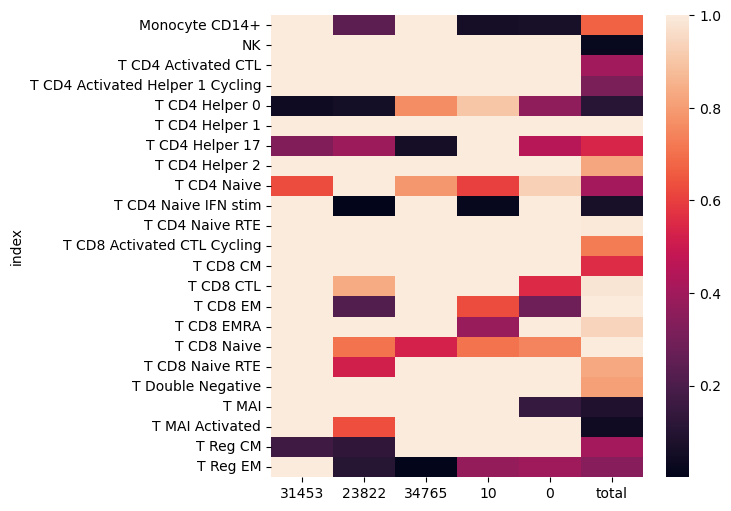

In [29]:
plt.figure(figsize=(6, 6))

sns.heatmap(fisher_res_df.reset_index().sort_values('index').set_index('index'))

<AxesSubplot: ylabel='index'>

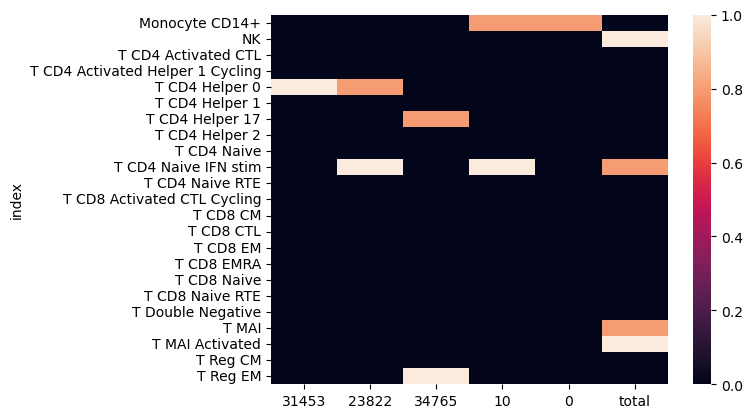

In [30]:
fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)
sns.heatmap(fisher_res_to_plot)

# Naive analysis alpha

In [204]:
res_heik = pd.read_csv('/home/dluppov/milarge_files/vdj_tools_data/heik_vdj_single.txt', sep = '\t')
res_heik

count          freq  \
0            1  2.396295e-06   
1            1  2.715801e-06   
2            1  1.970287e-06   
3            1  2.023538e-06   
4            1  2.343044e-06   
...        ...           ...   
1582769      1  2.693821e-07   
1582770      1  1.077528e-07   
1582771      1  1.077528e-07   
1582772      1  2.155057e-07   
1582773      1  1.077528e-07   

                                                    cdr3nt            cdr3aa  \
0        GCTCATCCTCCAGGTGCGGGAGGCAGATGCTGCTGTTTACTACTGT...       CAVVRGNKLVF   
1        GGAGCTCCAGATGAAAGACTCTGCCTCTTACTTCTGCGCTGTGAAA...    CAVKMNTGFQKLVF   
2        CCAGGTGCGGGAGGCAGATGCTGCTGTTTACTACTGTGCCCTGAGG...    CALRANTGFQKLVF   
3        TCATATCACAGCCTCCCAGCCTGCAGACTCAGCTACCTACCTCTGT...       CALFYGNKLVF   
4        TCATATCACAGCCTCCCAGCCTGCAGACTCAGCTACCTACCTCTGT...       CAHRGFQKLVF   
...                                                    ...               ...   
1582769  CCAGACCACAGACTCAGGCGTCTATTTCTGTGCTGTGGTTTCGAAT...  CAVVSNYGGATNKLIF   
1582770  GGAGCTCCAGATGAAAGACTCTGCCTCTTACCTCTGTGCTGTGAGA...    CAVRDGTGFQKLVF   
1582771  CTCACAGCTGGGGGATGCCGCGATGTATTTCTGTGCTTATAGGCCT...   CAYRPRRGGADGLTF   
1582772  ACCATTTGCTCAAGAGGAAGACTCAGCCATGTATTACTGTGCTCTA...     CALGGNYGQNFVF   
1582773  CATTGCAGACACCCAGACTGGGGACTCAGCTATCTACTTCTGTGCA...      CAETPRDDKIIF   

                  v           d           j  VEnd  DStart  DEnd  JStart  \
0        TCRAV02-01           .  TCRAJ47-01    -1      -1    -1      -1   
1        TCRAV01-01  TCRDD03-01  TCRAJ08-01    -1      -1    -1      -1   
2        TCRAV02-01           .  TCRAJ08-01    -1      -1    -1      -1   
3        TCRAV06-01  TCRDD02-01  TCRAJ47-01    -1      -1    -1      -1   
4        TCRAV06-01  TCRDD02-01  TCRAJ08-01    -1      -1    -1      -1   
...             ...         ...         ...   ...     ...   ...     ...   
1582769  TCRAV22-01  TCRDD02-01  TCRAJ32-01    -1      -1    -1      -1   
1582770  TCRAV01-02  TCRDD01-01  TCRAJ08-01    -1      -1    -1      -1   
1582771  TCRAV38-02  TCRDD02-01  TCRAJ45-01    -1      -1    -1      -1   
1582772  TCRAV16-01  TCRDD01-01  TCRAJ26-01    -1      -1    -1      -1   
1582773  TCRAV05-01  TCRDD02-01  TCRAJ30-01    -1      -1    -1      -1   

         degree.s  group.count.s  group2.count.s  degree.c  group.count.c  \
0             110        1582774             194        46        4620895   
1             205        1582774             301        52        4620895   
2              71        1582774             717        48        4620895   
3             106        1582774             474        37        4620895   
4              71        1582774             619        28        4620895   
...           ...            ...             ...       ...            ...   
1582769        49        1582774             538        12        4620895   
1582770        90        1582774             671        41        4620895   
1582771         2        1582774            3261        11        4620895   
1582772       147        1582774             559        51        4620895   
1582773        32        1582774             741        45        4620895   

         group2.count.c  p.value.g  p.value.g2  
0                     0   0.000000         1.0  
1                     0   0.000000         1.0  
2                     0   0.000000         1.0  
3                     0   0.000000         1.0  
4                     0   0.000000         1.0  
...                 ...        ...         ...  
1582769               0   0.000000         1.0  
1582770               0   0.000000         1.0  
1582771               0   0.931455         1.0  
1582772               0   0.000000         1.0  
1582773               0   0.000213         1.0  

[1582774 rows x 19 columns]

In [205]:
naive_alpha_cutted = res_heik.sort_values('p.value.g').head(10000)
naive_alpha_cutted

count          freq  \
0            1  2.396295e-06   
544788       1  3.976840e-07   
544790       1  3.976840e-07   
1162964      1  1.770840e-07   
1162960      1  2.951401e-07   
...        ...           ...   
1168448      1  2.361121e-07   
1168447      1  3.541681e-07   
1168446      1  2.951401e-07   
538389       1  1.249864e-06   
1168469      1  2.361121e-07   

                                                    cdr3nt          cdr3aa  \
0        GCTCATCCTCCAGGTGCGGGAGGCAGATGCTGCTGTTTACTACTGT...     CAVVRGNKLVF   
544788   TTTATACATTGCAGCTTCTCAGCCTGGTGACTCAGCCACCTACCTC...      CSGATNKLIF   
544790   AGAGACCCAACCTGAAGACTCGGCTGTCTACTTCTGTGCAGCTCAA...  CAAQASGGSYIPTF   
1162964  AGAGACCCAACCTGAAGACTCGGCTGTCTACTTCTGTGCAGCAATT...  CAAIFNTNAGKSTF   
1162960  CTTCACCATCACAGCCTCACAAGTCGTGGACTCAGCAGTATACTTC...      CALTGDQFYF   
...                                                    ...             ...   
1168448  CACTGCGGCCCAGCCTGGTGATACAGGCCTCTACCTCTGTGCAGGG...   CAGRMDSSYKLIF   
1168447  CATCAGAGACTCCCAGCCCAGTGATTCAGCCACCTACCTCTGTGCC...    CAGRNNNARLMF   
1168446  TATCTCAGCATCCATACCTAGTGATGTAGGCATCTACTTCTGCCAT...    CHGSSNTGKLIF   
538389   CATCACAGCCACCCAGACTACAGATGTAGGAACCTACTTCTGTGCA...    CAGPGSNYQLIW   
1168469  ACCATCTGCCCTTGTGAGCGACTCCGCTTTGTACTTCTGTGCTGTG...   CAVRDAGSYQLTF   

                  v           d           j  VEnd  DStart  DEnd  JStart  \
0        TCRAV02-01           .  TCRAJ47-01    -1      -1    -1      -1   
544788   TCRAV21-01  TCRDD02-01  TCRAJ32-01    -1      -1    -1      -1   
544790   TCRAV13-01           .  TCRAJ06-01    -1      -1    -1      -1   
1162964  TCRAV13-01  TCRDD02-01  TCRAJ27-01    -1      -1    -1      -1   
1162960  TCRAV19-01           .  TCRAJ49-01    -1      -1    -1      -1   
...             ...         ...         ...   ...     ...   ...     ...   
1168448  TCRAV27-01           .  TCRAJ12-01    -1      -1    -1      -1   
1168447  TCRAV12-02  TCRDD02-01  TCRAJ31-01    -1      -1    -1      -1   
1168446  TCRAV35-01  TCRDD02-01  TCRAJ37-01    -1      -1    -1      -1   
538389   TCRAV25-01  TCRDD01-01  TCRAJ33-01    -1      -1    -1      -1   
1168469  TCRAV03-01           .  TCRAJ28-01    -1      -1    -1      -1   

         degree.s  group.count.s  group2.count.s  degree.c  group.count.c  \
0             110        1582774             194        46        4620895   
544788         39        1582774             889        19        4620895   
544790         70        1582774            1287        46        4620895   
1162964        74        1582774            1785        38        4620895   
1162960        59        1582774            1580        14        4620895   
...           ...            ...             ...       ...            ...   
1168448       627        1582774             374        58        4620895   
1168447       406        1582774             785        64        4620895   
1168446       106        1582774            1380        26        4620895   
538389        166        1582774             840        51        4620895   
1168469        50        1582774             782        24        4620895   

         group2.count.c  p.value.g  p.value.g2  
0                     0        0.0         1.0  
544788                0        0.0         1.0  
544790                0        0.0         1.0  
1162964               0        0.0         1.0  
1162960               0        0.0         1.0  
...                 ...        ...         ...  
1168448               0        0.0         1.0  
1168447               0        0.0         1.0  
1168446               0        0.0         1.0  
538389                0        0.0         1.0  
1168469               0        0.0         1.0  

[10000 rows x 19 columns]

In [206]:
start = time.time()
res = process_all_lenghts(naive_alpha_cutted)
end = time.time()

pd.Series(res).to_csv('./thym_cd8_clusters.csv')    

res = pd.read_csv('./thym_cd8_clusters.csv', index_col=0)
res = res['0'].apply(eval)

exploded_series = res.explode()

res_exploded = pd.DataFrame(exploded_series).reset_index()
res_exploded.rename(columns = {"0": 'cdr3', 'index': 'cluster_id'}, inplace=True)
res_exploded.set_index('cdr3', inplace=True)

Start processing
processing lenghts 13 started
processing lenghts 14 started
processing lenghts 12 startedprocessing lenghts 15 startedprocessing lenghts 16 startedprocessing lenghts 10 startedprocessing lenghts 11 started
processing lenghts 9 started


processing lenghts 17 startedprocessing lenghts 8 started


processing lenghts 7 started
processing lenghts 8 completed

processing lenghts 7 completedprocessing lenghts 9 completed

processing lenghts 17 completed
processing lenghts 10 completed
processing lenghts 16 completed
processing lenghts 11 completed
processing lenghts 15 completed
processing lenghts 12 completed
processing lenghts 13 completed
processing lenghts 14 completed


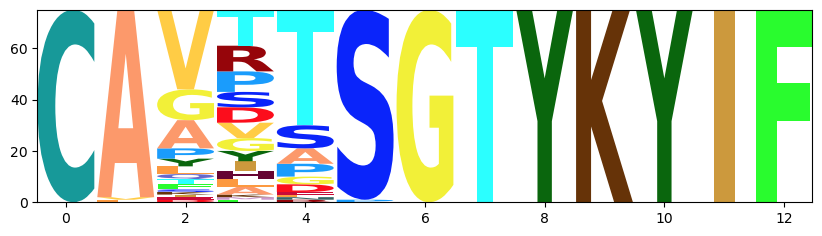

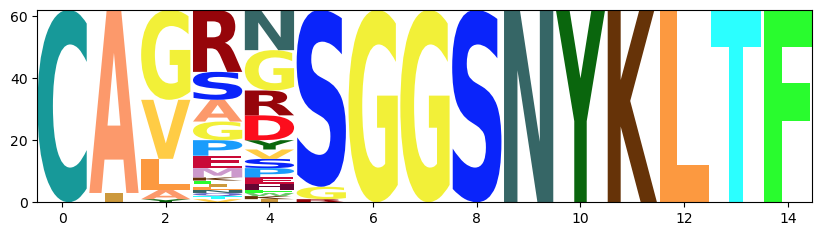

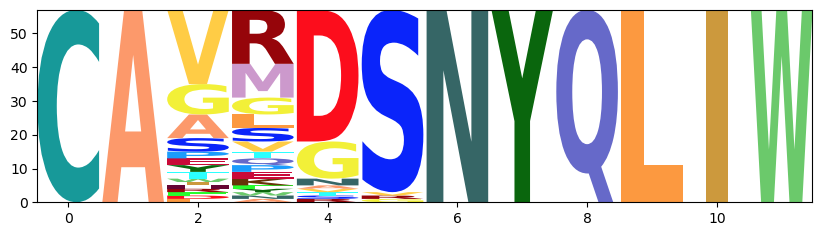

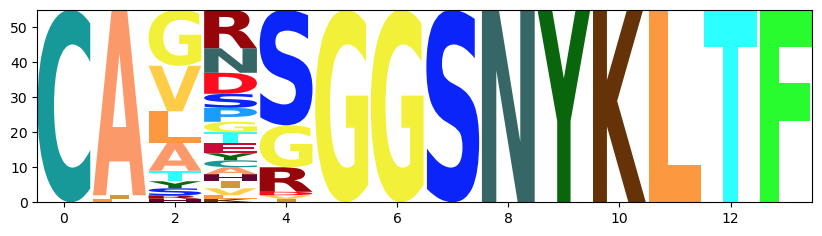

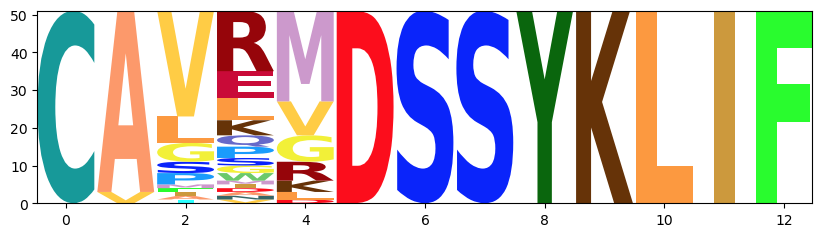

In [207]:
res = res_exploded.reset_index()

dif_clusters = res['cluster_id'].value_counts().head(5).index

import logomaker

for cluster in dif_clusters:
    clones = res[res['cluster_id'] == cluster].cdr3
    mat_df = logomaker.alignment_to_matrix(clones)
    logomaker.Logo(mat_df, color_scheme='skylign_protein', ax=None)

In [208]:
dif_clusters = res['cluster_id'].value_counts().head(5).index

types_dict = {}

for cluster in dif_clusters:
    
    cur_claster = set(res[res.cluster_id == cluster].cdr3)
    
    types_dict[cluster] = {}
    
    cur_founded_cluster = sc_data[sc_data.cdr3_a_aa.apply(lambda x: x in cur_claster)]
    
    for subtype in cur_founded_cluster.celltypist_majority.unique():
        types_dict[cluster][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_a_aa.unique())

cur_claster = set(res.cdr3)
types_dict['total'] = {}
cur_founded_cluster = sc_data[sc_data.cdr3_a_aa.apply(lambda x: x in cur_claster)]
for subtype in cur_founded_cluster.celltypist_majority.unique():
    types_dict['total'][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_a_aa.unique())

In [209]:
cell_type_counts_df = pd.DataFrame(types_dict)
cell_type_counts_df = cell_type_counts_df.fillna(0)
cell_type_counts_df

0  2495  1946   953    15  total
T CD4 Helper 0                    28.0  15.0  18.0  18.0   7.0   1323
T CD4 Naive                       51.0  26.0  32.0  35.0  25.0   3220
Monocyte CD14+                     7.0   1.0   2.0   4.0   2.0    177
T CD8 Naive                       16.0   4.0  14.0   8.0   6.0    919
T CD8 CTL                          2.0   2.0  10.0   3.0   2.0    294
T CD8 EMRA                         4.0   1.0   8.0   2.0   1.0    217
T Reg EM                           5.0   0.0   3.0   2.0   2.0    212
T CD4 Helper 17                    6.0   1.0   4.0   1.0   3.0    256
T CD8 EM                           8.0   4.0  12.0   3.0   3.0    381
T CD4 Helper 1                     1.0   0.0   4.0   2.0   0.0     41
T Reg CM                           5.0   1.0   2.0   2.0   0.0    130
T CD4 Naive IFN stim               4.0   1.0   0.0   2.0   0.0    111
T CD8 CM                           1.0   0.0   1.0   1.0   1.0     73
T CD8 Naive RTE                    2.0   3.0   3.0   0.0   4.0    139
T CD4 Naive RTE                    2.0   0.0   0.0   0.0   0.0     81
T CD8 Activated CTL Cycling        1.0   0.0   4.0   0.0   0.0     50
T MAI Activated                    1.0   0.0  27.0   0.0   0.0     81
T Double Negative                  3.0   0.0   1.0   0.0   1.0     31
NK                                 0.0   0.0   5.0   2.0   2.0     53
T MAI                              0.0   0.0  19.0   1.0   2.0     59
T CD4 CTL                          0.0   0.0   0.0   0.0   0.0      7
T CD8 Activated CTL                0.0   0.0   0.0   0.0   0.0      8
T Reg Activated Cycling            0.0   0.0   0.0   0.0   0.0      4
T CD4 Activated CTL                0.0   0.0   0.0   0.0   0.0      4
T CD4 Activated Helper 1 Cycling   0.0   0.0   0.0   0.0   0.0      5
T CD4 Helper 2                     0.0   0.0   0.0   0.0   0.0      6

In [210]:
fisher_res = {}
chi_statistics = {}

for cluster in cell_type_counts_df.columns:
    fisher_res[cluster] = {}
    chi_statistics[cluster] = {}
    for subtype in cell_type_counts_df.index:
        fisher_table = [
            [cell_type_counts_df[cluster][subtype], cell_type_counts_df[cluster].sum() - cell_type_counts_df[cluster][subtype]], 
            [len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique()), len(sc_data[sc_data.celltypist_majority != subtype].cdr3_b_aa.unique())]
                       ]
        
        fisher_res[cluster][subtype] = fisher_exact(fisher_table, alternative='greater')[1]
        chi_statistics[cluster][subtype] = cell_type_counts_df[cluster][subtype]/(cell_type_counts_df[cluster].sum()*len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique()))


In [211]:
fisher_res_df = pd.DataFrame(fisher_res)
chi_res_df = pd.DataFrame(chi_statistics)
fisher_res_df

0      2495          1946       953  \
T CD4 Helper 0                    0.085027  0.020711  9.475118e-01  0.072005   
T CD4 Naive                       1.000000  0.979990  1.000000e+00  0.998878   
Monocyte CD14+                    0.008208  0.600470  7.364137e-01  0.044568   
T CD8 Naive                       0.331446  0.827720  7.508224e-01  0.586176   
T CD8 CTL                         0.928758  0.513596  2.653531e-02  0.456768   
T CD8 EMRA                        0.305298  0.677010  1.607926e-02  0.487204   
T Reg EM                          0.139586  1.000000  6.087869e-01  0.475528   
T CD4 Helper 17                   0.106003  0.729693  5.087967e-01  0.851428   
T CD8 EM                          0.215126  0.196895  3.352036e-02  0.654948   
T CD4 Helper 1                    0.457387  1.000000  5.704857e-03  0.050147   
T Reg CM                          0.017685  0.452239  5.126175e-01  0.217460   
T CD4 Naive IFN stim              0.035939  0.391108  1.000000e+00  0.162492   
T CD8 CM                          0.643204  1.000000  6.941740e-01  0.452864   
T CD8 Naive RTE                   0.525795  0.033895  3.290427e-01  1.000000   
T CD4 Naive RTE                   0.214716  1.000000  1.000000e+00  1.000000   
T CD8 Activated CTL Cycling       0.401168  1.000000  3.088421e-03  1.000000   
T MAI Activated                   0.908822  1.000000  7.623853e-19  1.000000   
T Double Negative                 0.006183  1.000000  3.438772e-01  1.000000   
NK                                1.000000  1.000000  5.948414e-04  0.045231   
T MAI                             1.000000  1.000000  8.812423e-19  0.390887   
T CD4 CTL                         1.000000  1.000000  1.000000e+00  1.000000   
T CD8 Activated CTL               1.000000  1.000000  1.000000e+00  1.000000   
T Reg Activated Cycling           1.000000  1.000000  1.000000e+00  1.000000   
T CD4 Activated CTL               1.000000  1.000000  1.000000e+00  1.000000   
T CD4 Activated Helper 1 Cycling  1.000000  1.000000  1.000000e+00  1.000000   
T CD4 Helper 2                    1.000000  1.000000  1.000000e+00  1.000000   

                                        15         total  
T CD4 Helper 0                    0.808240  1.461844e-07  
T CD4 Naive                       0.994870  1.000000e+00  
Monocyte CD14+                    0.242532  2.386537e-06  
T CD8 Naive                       0.534079  1.264138e-09  
T CD8 CTL                         0.531487  2.402090e-05  
T CD8 EMRA                        0.689147  2.285067e-07  
T Reg EM                          0.313123  3.357023e-07  
T CD4 Helper 17                   0.149996  3.867607e-09  
T CD8 EM                          0.425248  2.632380e-05  
T CD4 Helper 1                    1.000000  9.580803e-02  
T Reg CM                          1.000000  3.448832e-07  
T CD4 Naive IFN stim              1.000000  5.384785e-07  
T CD8 CM                          0.348050  1.380147e-02  
T CD8 Naive RTE                   0.006225  1.487215e-05  
T CD4 Naive RTE                   1.000000  4.805713e-06  
T CD8 Activated CTL Cycling       1.000000  1.105995e-04  
T MAI Activated                   1.000000  9.999939e-01  
T Double Negative                 0.141151  1.264577e-02  
NK                                0.024144  2.706467e-04  
T MAI                             0.048420  3.208030e-02  
T CD4 CTL                         1.000000  6.171921e-01  
T CD8 Activated CTL               1.000000  6.448667e-02  
T Reg Activated Cycling           1.000000  1.402696e-01  
T CD4 Activated CTL               1.000000  2.122563e-01  
T CD4 Activated Helper 1 Cycling  1.000000  5.834989e-01  
T CD4 Helper 2                    1.000000  7.911016e-01

<AxesSubplot: ylabel='index'>

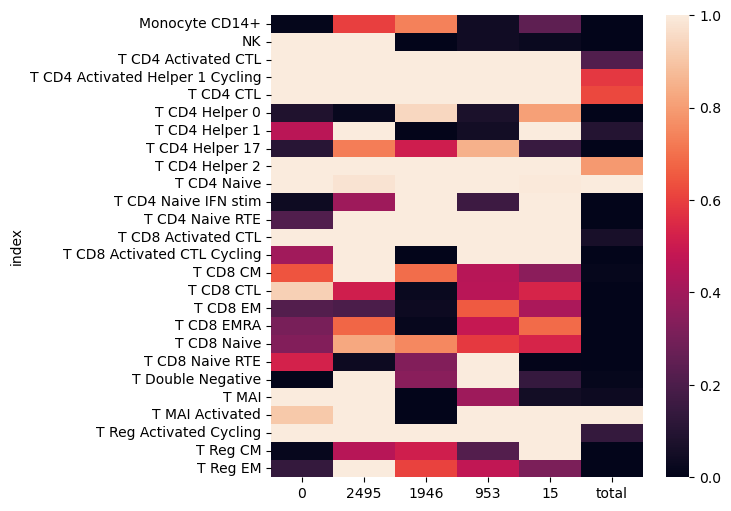

In [212]:
plt.figure(figsize=(6, 6))

sns.heatmap(fisher_res_df.reset_index().sort_values('index').set_index('index'))

<AxesSubplot: ylabel='index'>

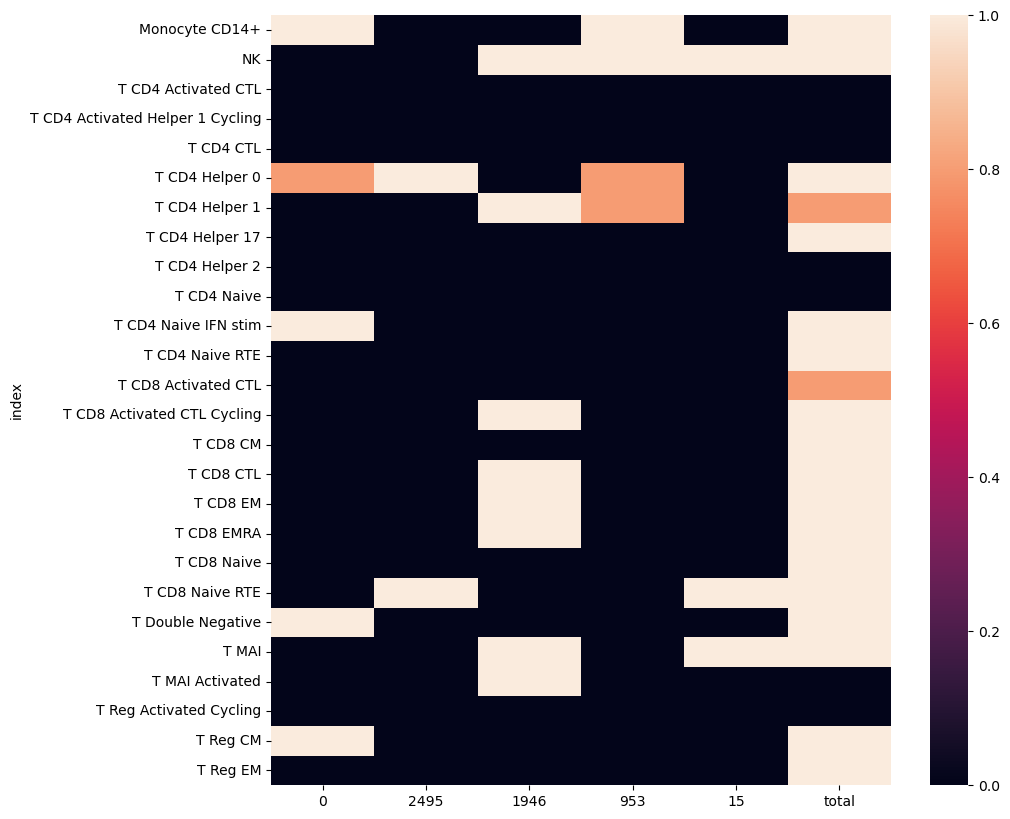

In [216]:
plt.figure(figsize=(10, 10))

fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)
sns.heatmap(fisher_res_to_plot)

<AxesSubplot: ylabel='index'>

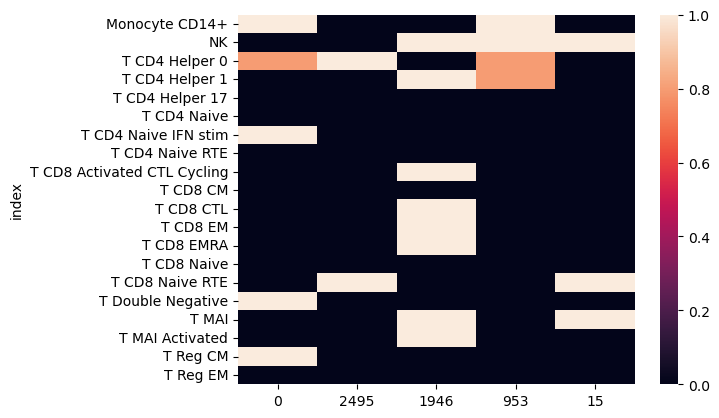

In [35]:
fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)
sns.heatmap(fisher_res_to_plot)

# OLGA analysis alpha

In [50]:
df_depleted = pd.read_csv('/home/dluppov/milarge_files/vdj_tools_data/OLGA_A_vdj_single_nt.txt', sep = '\t')


olga_alpha_cutted = df_depleted.sort_values('p.value.g').head(10000)
olga_alpha_cutted

count          freq  \
7116830      1  1.000000e-07   
2736327      1  1.000000e-07   
2736328      1  1.000000e-07   
2736330      1  1.000000e-07   
5548475      1  1.000000e-07   
...        ...           ...   
5556403      2  2.000000e-07   
5556401      2  2.000000e-07   
5556399      1  1.000000e-07   
5556398      1  1.000000e-07   
5556397      1  1.000000e-07   

                                                   cdr3nt            cdr3aa  \
7116830        TGTGCAGTTCGGTGGATGGATAGCAGCTATAAATTGATCTTC    CAVRWMDSSYKLIF   
2736327              TGTGCTGTCCTTCGGGGGGCAAACAACCTCTTCTTT      CAVLRGANNLFF   
2736328     TGTGCTCTTCTATCTGCATCAGGAGGAAGCTACATACCTACATTT   CALLSASGGSYIPTF   
2736330              TGTGCTCCAAGTACTGGGGCAAACAACCTCTTCTTT      CAPSTGANNLFF   
5548475  TGTGCAGCATTGCCAAGCTATGGAGGAAGCCAAGGAAATCTCATCTTT  CAALPSYGGSQGNLIF   
...                                                   ...               ...   
5556403                 TGTGCTCTAGACGAAGGTAACCAGTTCTATTTT       CALDEGNQFYF   
5556401        TGTGCAGAGAATACCGGAAACACCGGTAACCAGTTCTATTTT    CAENTGNTGNQFYF   
5556399        TGTGCTTATAAGGTTACCGGCACTGCCAGTAAACTCACCTTT    CAYKVTGTASKLTF   
5556398  TGTGCTGGGCAGCTACCCCGTCAGGGCGGATCTGAAAAGCTGGTCTTT  CAGQLPRQGGSEKLVF   
5556397  TGTGCTGTCTTCCCATTAACTCAGGGCGGATCTGAAAAGCTGGTCTTT  CAVFPLTQGGSEKLVF   

                    v  d       j  VEnd  DStart  DEnd  JStart  degree.s  \
7116830      TRAV13-2  .  TRAJ12    -1      -1    -1      -1       200   
2736327        TRAV20  .  TRAJ36    -1      -1    -1      -1       251   
2736328       TRAV9-2  .   TRAJ6    -1      -1    -1      -1        73   
2736330       TRAV8-6  .  TRAJ36    -1      -1    -1      -1       435   
5548475    TRAV29/DV5  .  TRAJ42    -1      -1    -1      -1        54   
...               ... ..     ...   ...     ...   ...     ...       ...   
5556403         TRAV6  .  TRAJ49    -1      -1    -1      -1        95   
5556401      TRAV13-2  .  TRAJ49    -1      -1    -1      -1       175   
5556399  TRAV38-2/DV8  .  TRAJ44    -1      -1    -1      -1        90   
5556398        TRAV35  .  TRAJ57    -1      -1    -1      -1        41   
5556397        TRAV21  .  TRAJ57    -1      -1    -1      -1        64   

         group.count.s  group2.count.s  degree.c  group.count.c  \
7116830        7116831            2143         0         964889   
2736327        7116831             427         0         964889   
2736328        7116831            1754         0         964889   
2736330        7116831              87         0         964889   
5548475        7116831            2970         0         964889   
...                ...             ...       ...            ...   
5556403        7116831             256         0         964889   
5556401        7116831            6134         0         964889   
5556399        7116831            1726         0         964889   
5556398        7116831            1818         0         964889   
5556397        7116831            1958         0         964889   

         group2.count.c  p.value.g  p.value.g2  
7116830               0        0.0         1.0  
2736327               0        0.0         1.0  
2736328               0        0.0         1.0  
2736330               0        0.0         0.0  
5548475               0        0.0         1.0  
...                 ...        ...         ...  
5556403               0        0.0         1.0  
5556401               0        0.0         1.0  
5556399               0        0.0         1.0  
5556398               0        0.0         1.0  
5556397               0        0.0         1.0  

[10000 rows x 19 columns]

In [51]:
start = time.time()
res = process_all_lenghts(olga_alpha_cutted)
end = time.time()

pd.Series(res).to_csv('./olga_alpha_clusters.csv')    

res = pd.read_csv('./olga_alpha_clusters.csv', index_col=0)
res = res['0'].apply(eval)

exploded_series = res.explode()

res_exploded = pd.DataFrame(exploded_series).reset_index()
res_exploded.rename(columns = {"0": 'cdr3', 'index': 'cluster_id'}, inplace=True)
res_exploded.set_index('cdr3', inplace=True)

Start processing
processing lenghts 14 startedprocessing lenghts 13 started

processing lenghts 15 started
processing lenghts 12 startedprocessing lenghts 16 started
processing lenghts 17 startedprocessing lenghts 10 started

processing lenghts 11 startedprocessing lenghts 9 startedprocessing lenghts 8 started
processing lenghts 18 started



processing lenghts 8 completed
processing lenghts 18 completed
processing lenghts 9 completed
processing lenghts 17 completedprocessing lenghts 10 completed

processing lenghts 11 completed
processing lenghts 16 completed
processing lenghts 12 completed
processing lenghts 13 completed
processing lenghts 15 completed
processing lenghts 14 completed


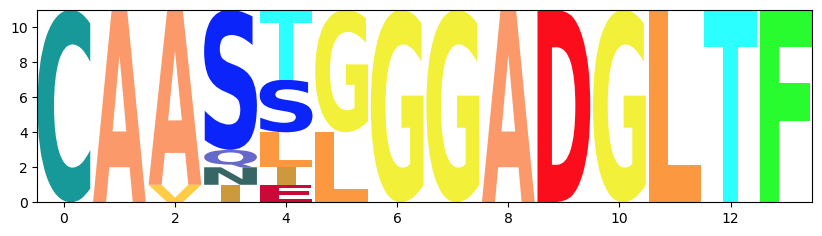

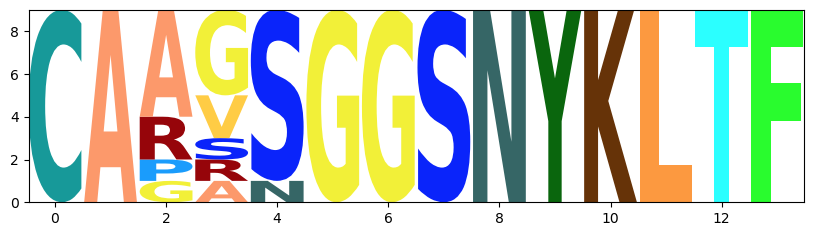

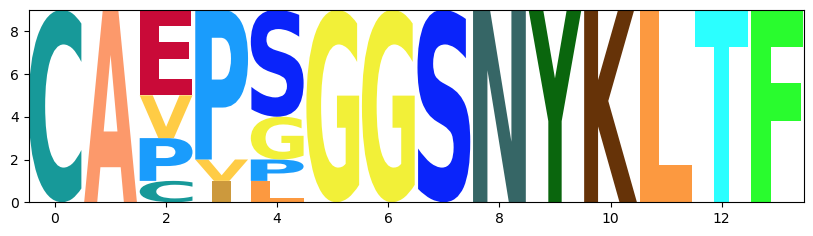

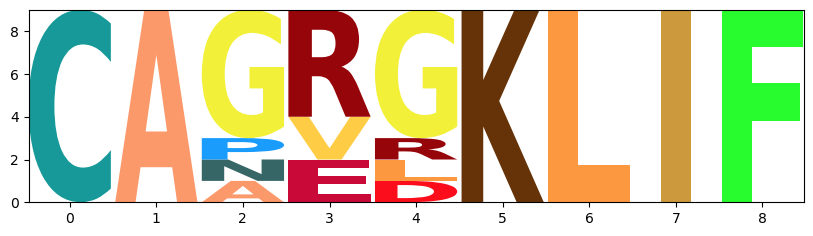

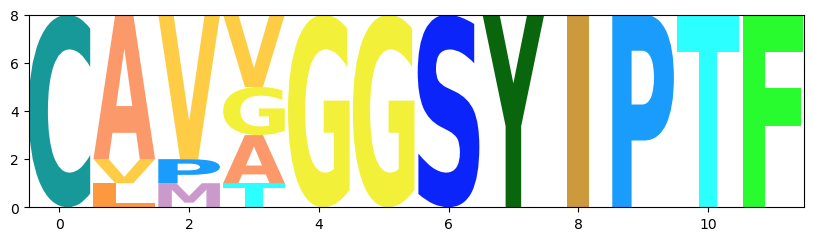

In [54]:
res = res_exploded.reset_index()

dif_clusters = res['cluster_id'].value_counts().head(5).index

import logomaker

for cluster in dif_clusters:
    clones = res[res['cluster_id'] == cluster].cdr3
    mat_df = logomaker.alignment_to_matrix(clones)
    logomaker.Logo(mat_df, color_scheme='skylign_protein', ax=None)

In [53]:
dif_clusters = res['cluster_id'].value_counts().head(5).index

types_dict = {}

for cluster in dif_clusters:
    
    cur_claster = set(res[res.cluster_id == cluster].cdr3)
    
    types_dict[cluster] = {}
    
    cur_founded_cluster = sc_data[sc_data.cdr3_a_aa.apply(lambda x: x in cur_claster)]
    
    for subtype in cur_founded_cluster.celltypist_majority.unique():
        types_dict[cluster][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_a_aa.unique())
        
cur_claster = set(res.cdr3)
types_dict['total'] = {}
cur_founded_cluster = sc_data[sc_data.cdr3_a_aa.apply(lambda x: x in cur_claster)]
for subtype in cur_founded_cluster.celltypist_majority.unique():
    types_dict['total'][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_a_aa.unique())

In [35]:
cell_type_counts_df = pd.DataFrame(types_dict)
cell_type_counts_df = cell_type_counts_df.fillna(0)
cell_type_counts_df

258  270  539  7592  4767  total
T CD8 Naive                       3.0  0.0  0.0   0.0   2.0    250
T CD4 Naive                       5.0  3.0  2.0   0.0   6.0    958
T CD4 Helper 17                   1.0  1.0  0.0   0.0   1.0     62
T CD8 EMRA                        1.0  0.0  0.0   0.0   0.0     61
T CD8 Activated CTL Cycling       1.0  0.0  0.0   0.0   0.0     17
T CD8 EM                          1.0  1.0  0.0   0.0   2.0    105
NK                                1.0  0.0  0.0   0.0   0.0      9
T CD4 Helper 0                    2.0  2.0  0.0   0.0   1.0    357
T Double Negative                 1.0  0.0  0.0   0.0   0.0     10
T Reg EM                          1.0  1.0  0.0   0.0   1.0     65
T CD4 Helper 1                    0.0  0.0  0.0   0.0   2.0     13
T CD8 CTL                         0.0  0.0  0.0   0.0   1.0     68
Monocyte CD14+                    0.0  0.0  0.0   0.0   0.0     43
T CD4 Naive IFN stim              0.0  0.0  0.0   0.0   0.0     25
T MAI Activated                   0.0  0.0  0.0   0.0   0.0     17
T CD4 CTL                         0.0  0.0  0.0   0.0   0.0      6
T Reg CM                          0.0  0.0  0.0   0.0   0.0     30
T CD8 Naive RTE                   0.0  0.0  0.0   0.0   0.0     33
T CD8 CM                          0.0  0.0  0.0   0.0   0.0     16
T CD4 Naive RTE                   0.0  0.0  0.0   0.0   0.0     16
T MAI                             0.0  0.0  0.0   0.0   0.0     10
T CD4 Helper 2                    0.0  0.0  0.0   0.0   0.0      2
T CD4 Activated Helper 1 Cycling  0.0  0.0  0.0   0.0   0.0      4
T CD8 Activated CTL               0.0  0.0  0.0   0.0   0.0      1
T CD4 Activated CTL               0.0  0.0  0.0   0.0   0.0      1

In [36]:
fisher_res = {}
chi_statistics = {}

for cluster in cell_type_counts_df.columns:
    fisher_res[cluster] = {}
    chi_statistics[cluster] = {}
    for subtype in cell_type_counts_df.index:
        fisher_table = [
            [cell_type_counts_df[cluster][subtype], cell_type_counts_df[cluster].sum() - cell_type_counts_df[cluster][subtype]], 
            [len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique()), len(sc_data[sc_data.celltypist_majority != subtype].cdr3_b_aa.unique())]
                       ]
        
        fisher_res[cluster][subtype] = fisher_exact(fisher_table, alternative='greater')[1]
        chi_statistics[cluster][subtype] = cell_type_counts_df[cluster][subtype]/(cell_type_counts_df[cluster].sum()*len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique()))

/scratch/ipykernel_3496097/2584555866.py:14: RuntimeWarning: invalid value encountered in scalar divide
  chi_statistics[cluster][subtype] = cell_type_counts_df[cluster][subtype]/(cell_type_counts_df[cluster].sum()*len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique()))


In [37]:
fisher_res_df = pd.DataFrame(fisher_res)
chi_res_df = pd.DataFrame(chi_statistics)
fisher_res_df

258       270       539  7592  \
T CD8 Naive                       0.218012  1.000000  1.000000   1.0   
T CD4 Naive                       0.993958  0.925115  0.319613   1.0   
T CD4 Helper 17                   0.314079  0.162567  1.000000   1.0   
T CD8 EMRA                        0.277963  1.000000  1.000000   1.0   
T CD8 Activated CTL Cycling       0.057601  1.000000  1.000000   1.0   
T CD8 EM                          0.490651  0.272018  1.000000   1.0   
NK                                0.064560  1.000000  1.000000   1.0   
T CD4 Helper 0                    0.734502  0.331455  1.000000   1.0   
T Double Negative                 0.041526  1.000000  1.000000   1.0   
T Reg EM                          0.272715  0.139169  1.000000   1.0   
T CD4 Helper 1                    1.000000  1.000000  1.000000   1.0   
T CD8 CTL                         1.000000  1.000000  1.000000   1.0   
Monocyte CD14+                    1.000000  1.000000  1.000000   1.0   
T CD4 Naive IFN stim              1.000000  1.000000  1.000000   1.0   
T MAI Activated                   1.000000  1.000000  1.000000   1.0   
T CD4 CTL                         1.000000  1.000000  1.000000   1.0   
T Reg CM                          1.000000  1.000000  1.000000   1.0   
T CD8 Naive RTE                   1.000000  1.000000  1.000000   1.0   
T CD8 CM                          1.000000  1.000000  1.000000   1.0   
T CD4 Naive RTE                   1.000000  1.000000  1.000000   1.0   
T MAI                             1.000000  1.000000  1.000000   1.0   
T CD4 Helper 2                    1.000000  1.000000  1.000000   1.0   
T CD4 Activated Helper 1 Cycling  1.000000  1.000000  1.000000   1.0   
T CD8 Activated CTL               1.000000  1.000000  1.000000   1.0   
T CD4 Activated CTL               1.000000  1.000000  1.000000   1.0   

                                      4767     total  
T CD8 Naive                       0.460968  0.001856  
T CD4 Naive                       0.962781  1.000000  
T CD4 Helper 17                   0.298699  0.026910  
T CD8 EMRA                        1.000000  0.002439  
T CD8 Activated CTL Cycling       1.000000  0.002358  
T CD8 EM                          0.126788  0.017415  
NK                                1.000000  0.481706  
T CD4 Helper 0                    0.920567  0.013035  
T Double Negative                 1.000000  0.051319  
T Reg EM                          0.258964  0.000223  
T CD4 Helper 1                    0.001994  0.128918  
T CD8 CTL                         0.375655  0.288849  
Monocyte CD14+                    1.000000  0.067169  
T CD4 Naive IFN stim              1.000000  0.077463  
T MAI Activated                   1.000000  0.999764  
T CD4 CTL                         1.000000  0.020242  
T Reg CM                          1.000000  0.063997  
T CD8 Naive RTE                   1.000000  0.106658  
T CD8 CM                          1.000000  0.455451  
T CD4 Naive RTE                   1.000000  0.222049  
T MAI                             1.000000  0.799517  
T CD4 Helper 2                    1.000000  0.638672  
T CD4 Activated Helper 1 Cycling  1.000000  0.058354  
T CD8 Activated CTL               1.000000  0.678494  
T CD4 Activated CTL               1.000000  0.473818

<AxesSubplot: ylabel='index'>

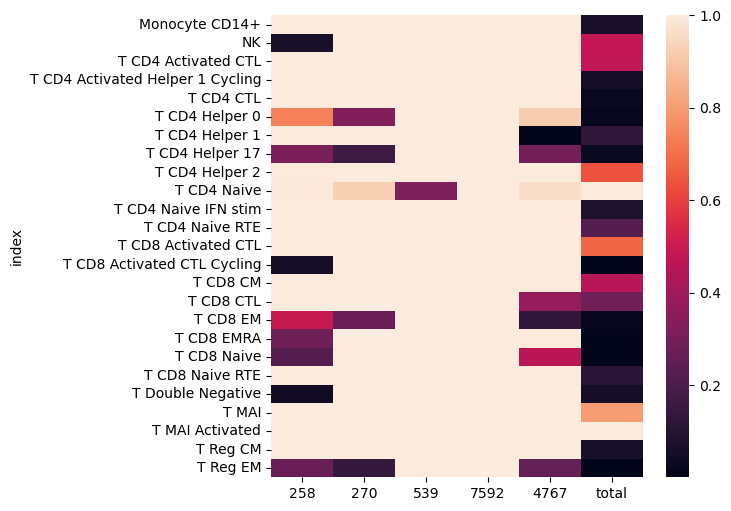

In [38]:
plt.figure(figsize=(6, 6))

sns.heatmap(fisher_res_df.reset_index().sort_values('index').set_index('index'))

<AxesSubplot: ylabel='index'>

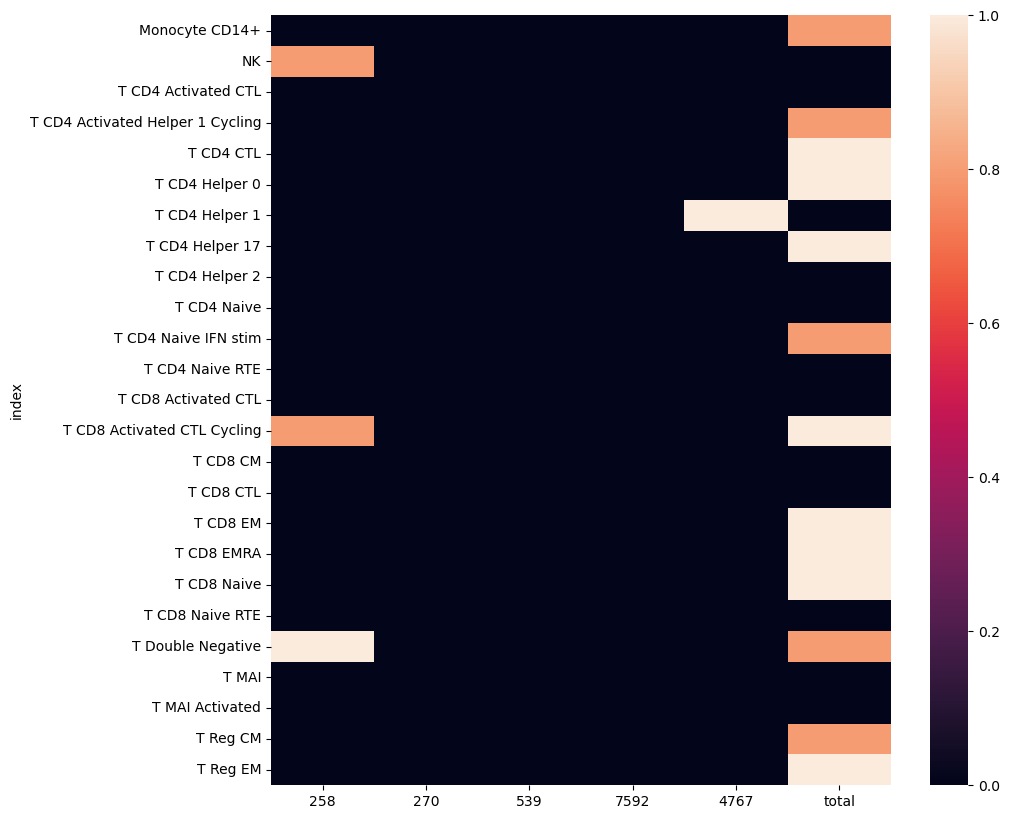

In [39]:
plt.figure(figsize=(10, 10))

fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)
sns.heatmap(fisher_res_to_plot)

# Thymocutes SP alpha

In [72]:
df_depleted = pd.read_csv('/home/dluppov/milarge_files/vdj_tools_data/Klaztman_A_vdj_DP.txt', sep = '\t')
df_enriched = pd.read_csv('/home/dluppov/milarge_files/vdj_tools_data/Klaztman_A_vdj_CD8.txt', sep = '\t')
df_depleted

count      freq                                         cdr3nt  \
0           8  0.000016        TGTGCTGTGGAGGATAACTATGGTCAGAATTTTGTCTTT   
1          10  0.000020           TGTGCAGAGAATACTGGAGGCTTCAAAACTATCTTT   
2           7  0.000014        TGTGCTGTGAAAGAAACCAGTGGCTCTAGGTTGACCTTT   
3           2  0.000004              TGCATCCTGAACAGAGATGACAAGATCATCTTT   
4           7  0.000014                 TGTGCTTATAACACCGACAAGCTCATCTTT   
...       ...       ...                                            ...   
494460      1  0.000002        TGCAACGTCTCCACCTCAGGAACCTACATATGCATCTTT   
494461      1  0.000002     TGCAACGTAAGAGTCCTAACTAACGACTACAAGCTCAGCTTT   
494462      1  0.000002  TGCAACGCCCTTTATTTTTCTTGTTCCGCAAGGGAACTGACCTTT   
494463      1  0.000002        TGCAACGGCGGGTCTGGTTCTGCAAGGCAACTGACCTTT   
494464      1  0.000002     TGCAACGGATATGGCTCTAGCAACACAGGCAAACTAATCTTT   

                 cdr3aa            v  d       j  VEnd  DStart  DEnd  JStart  \
0         CAVEDNYGQNFVF        TRAV2  .  TRAJ26    -1      -1    -1      -1   
1          CAENTGGFKTIF     TRAV13-2  .   TRAJ9    -1      -1    -1      -1   
2         CAVKETSGSRLTF       TRAV21  .  TRAJ58    -1      -1    -1      -1   
3           CILNRDDKIIF     TRAV26-2  .  TRAJ30    -1      -1    -1      -1   
4            CAYNTDKLIF  TRAV38-2DV8  .  TRAJ34    -1      -1    -1      -1   
...                 ...          ... ..     ...   ...     ...   ...     ...   
494460    CNVSTSGTYICIF     TRAV26-1  .  TRAJ40    -1      -1    -1      -1   
494461   CNVRVLTNDYKLSF     TRAV26-1  .  TRAJ20    -1      -1    -1      -1   
494462  CNALYFSCSARELTF     TRAV26-1  .  TRAJ22    -1      -1    -1      -1   
494463    CNGGSGSARQLTF     TRAV26-1  .  TRAJ22    -1      -1    -1      -1   
494464   CNGYGSSNTGKLIF     TRAV26-1  .  TRAJ37    -1      -1    -1      -1   

        degree.s  group.count.s  group2.count.s  degree.c  group.count.c  \
0            121         494465             113       377         902723   
1            210         494465              48       481         902723   
2            152         494465             172       201         902723   
3             40         494465              26        92         902723   
4            148         494465              32       262         902723   
...          ...            ...             ...       ...            ...   
494460         1         494465              77         0         902723   
494461         2         494465             130         0         902723   
494462         1         494465              93         0         902723   
494463         9         494465              55         8         902723   
494464         7         494465             119        10         902723   

        group2.count.c  p.value.g    p.value.g2  
0                  111   1.000000  1.000000e+00  
1                  138   0.999742  1.633222e-03  
2                  185   0.000112  9.968816e-01  
3                  134   0.950020  1.114559e-05  
4                  104   0.382259  6.301992e-11  
...                ...        ...           ...  
494460             109   1.000000  1.000000e+00  
494461              97   0.248995  5.237163e-01  
494462              57   1.000000  1.000000e+00  
494463              29   0.064065  9.858937e-01  
494464              81   0.398713  9.962422e-01  

[494465 rows x 19 columns]

In [73]:
thym_alpha_sp = df_enriched.sort_values('p.value.g').head(10000)
thym_alpha_sp

count      freq                                   cdr3nt  \
603262      6  0.000007     TGTGCTCAAACTGACAGCTGGGGGAAATTGCAGTTT   
256968      1  0.000001     TGTGCTGTGAACCGGGGCGACTACAAGCTCAGCTTT   
443010      1  0.000001  TGTGCCGTTGGGCCGGATAGCAACTATCAGTTAATCTGG   
636515      1  0.000001  TGTGCAGGTTCCATGGATAGCAACTATCAGTTAATCTGG   
119142      3  0.000003  TGTGCTGTGAGGCCTGATAGCAACTATCAGTTAATCTGG   
...       ...       ...                                      ...   
176723      6  0.000007        TGTGCTGTGAGGAGCGACTACAAGCTCAGCTTT   
800290      1  0.000001        TGTGCTGTGCGTTCTGACTACAAGCTCAGCTTT   
418465      6  0.000007        TGTGCTGTGAGGAGCGACTACAAGCTCAGCTTT   
652661      1  0.000001        TGTGCTGTGAGGTCCGACTACAAGCTCAGCTTT   
428154      1  0.000001        TGTGCTGTGAGATCGGACTACAAGCTCAGCTTT   

               cdr3aa          v  d       j  VEnd  DStart  DEnd  JStart  \
603262   CAQTDSWGKLQF  TRAV29DV5  .  TRAJ24    -1      -1    -1      -1   
256968   CAVNRGDYKLSF     TRAV21  .  TRAJ20    -1      -1    -1      -1   
443010  CAVGPDSNYQLIW   TRAV12-2  .  TRAJ33    -1      -1    -1      -1   
636515  CAGSMDSNYQLIW     TRAV27  .  TRAJ33    -1      -1    -1      -1   
119142  CAVRPDSNYQLIW     TRAV21  .  TRAJ33    -1      -1    -1      -1   
...               ...        ... ..     ...   ...     ...   ...     ...   
176723    CAVRSDYKLSF    TRAV1-2  .  TRAJ20    -1      -1    -1      -1   
800290    CAVRSDYKLSF     TRAV35  .  TRAJ20    -1      -1    -1      -1   
418465    CAVRSDYKLSF    TRAV1-2  .  TRAJ20    -1      -1    -1      -1   
652661    CAVRSDYKLSF    TRAV1-2  .  TRAJ20    -1      -1    -1      -1   
428154    CAVRSDYKLSF    TRAV1-2  .  TRAJ20    -1      -1    -1      -1   

        degree.s  group.count.s  group2.count.s  degree.c  group.count.c  \
603262       300         902723              88        96         494465   
256968        97         902723             692        18         494465   
443010       235         902723             323        62         494465   
636515       236         902723             277        49         494465   
119142       388         902723             688        98         494465   
...          ...            ...             ...       ...            ...   
176723       328         902723             700       112         494465   
800290       328         902723              64       112         494465   
418465       328         902723             700       112         494465   
652661       328         902723             700       112         494465   
428154       328         902723             700       112         494465   

        group2.count.c     p.value.g    p.value.g2  
603262              36  0.000000e+00  1.598621e-05  
256968             274  0.000000e+00  3.056486e-10  
443010              67  0.000000e+00  9.999581e-01  
636515              66  0.000000e+00  2.766098e-02  
119142             158  0.000000e+00  9.787777e-01  
...                ...           ...           ...  
176723             146  3.663736e-15  1.000000e+00  
800290              21  3.663736e-15  6.331602e-01  
418465             146  3.663736e-15  1.000000e+00  
652661             146  3.663736e-15  1.000000e+00  
428154             146  3.663736e-15  1.000000e+00  

[10000 rows x 19 columns]

In [74]:
start = time.time()
res = process_all_lenghts(thym_alpha_sp)
end = time.time()

pd.Series(res).to_csv('./thym_sp_alpha_clusters.csv')    

res = pd.read_csv('./thym_sp_alpha_clusters.csv', index_col=0)
res = res['0'].apply(eval)

exploded_series = res.explode()

res_exploded = pd.DataFrame(exploded_series).reset_index()
res_exploded.rename(columns = {"0": 'cdr3', 'index': 'cluster_id'}, inplace=True)
res_exploded.set_index('cdr3', inplace=True)

Start processing
processing lenghts 13 started
processing lenghts 11 started
processing lenghts 12 startedprocessing lenghts 10 started
processing lenghts 14 startedprocessing lenghts 16 started

processing lenghts 17 started
processing lenghts 15 started
processing lenghts 11 completed

processing lenghts 14 completedprocessing lenghts 16 completedprocessing lenghts 10 completedprocessing lenghts 17 completed
processing lenghts 15 completed



processing lenghts 12 completed
processing lenghts 13 completed


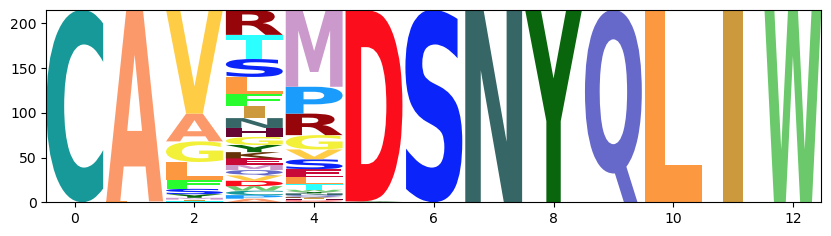

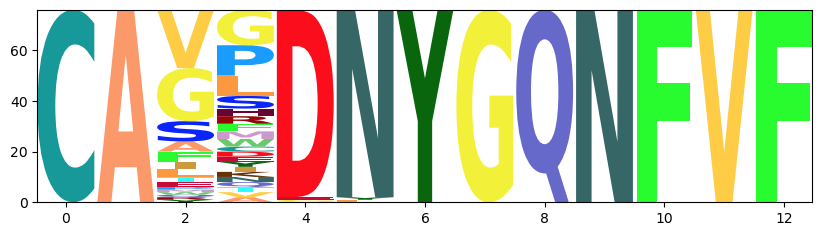

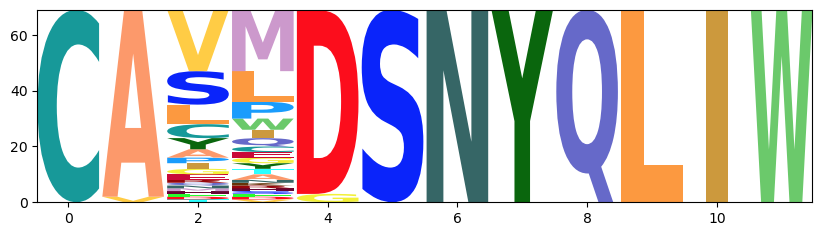

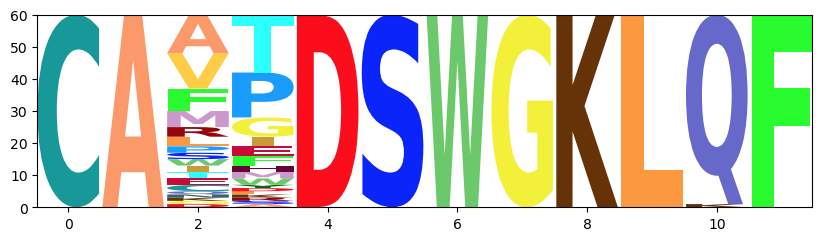

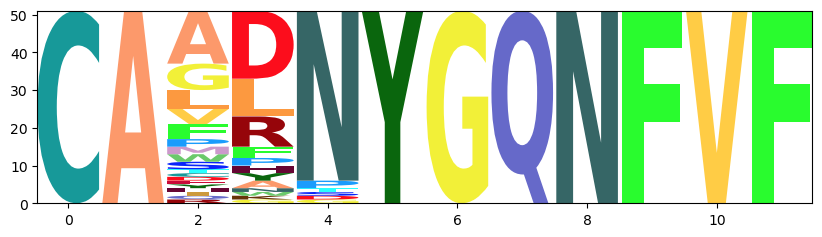

In [75]:
res = res_exploded.reset_index()

dif_clusters = res['cluster_id'].value_counts().head(5).index

import logomaker

for cluster in dif_clusters:
    clones = res[res['cluster_id'] == cluster].cdr3
    mat_df = logomaker.alignment_to_matrix(clones)
    logomaker.Logo(mat_df, color_scheme='skylign_protein', ax=None)

In [76]:
dif_clusters = res['cluster_id'].value_counts().head(5).index

types_dict = {}

for cluster in dif_clusters:
    
    cur_claster = set(res[res.cluster_id == cluster].cdr3)
    
    types_dict[cluster] = {}
    
    cur_founded_cluster = sc_data[sc_data.cdr3_a_aa.apply(lambda x: x in cur_claster)]
    
    for subtype in cur_founded_cluster.celltypist_majority.unique():
        types_dict[cluster][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_a_aa.unique())


cur_claster = set(res.cdr3)
types_dict['total'] = {}
cur_founded_cluster = sc_data[sc_data.cdr3_a_aa.apply(lambda x: x in cur_claster)]
for subtype in cur_founded_cluster.celltypist_majority.unique():
    types_dict['total'][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_a_aa.unique())

In [77]:
cell_type_counts_df = pd.DataFrame(types_dict)
cell_type_counts_df = cell_type_counts_df.fillna(0)
cell_type_counts_df

0     1    49    45    47  total
T CD8 Naive                  36.0  18.0  16.0   7.0  13.0    155
T CD4 Naive                  74.0  29.0  37.0  16.0  25.0    330
T CD4 Helper 0               25.0  12.0  24.0  10.0  11.0    132
T Reg EM                      5.0   0.0   4.0   1.0   3.0     19
T CD8 CTL                    12.0   9.0  12.0   0.0   5.0     56
T CD8 EM                     11.0   6.0  13.0   3.0   3.0     61
T CD8 EMRA                    8.0   4.0  13.0   1.0   4.0     42
T CD4 Helper 17               3.0   4.0   3.0   0.0   4.0     19
NK                            1.0   0.0   5.0   0.0   1.0     11
T CD8 CM                      1.0   0.0   2.0   0.0   0.0      9
T CD4 Naive IFN stim          3.0   2.0   1.0   1.0   2.0     12
T CD4 Naive RTE               1.0   0.0   0.0   1.0   0.0      5
T CD8 Naive RTE               1.0   3.0   5.0   0.0   3.0     27
T Double Negative             1.0   1.0   3.0   0.0   2.0      9
T MAI                         3.0   1.0  32.0   0.0   0.0     39
T MAI Activated               3.0   1.0  41.0   0.0   0.0     49
Monocyte CD14+                3.0   4.0   4.0   3.0   1.0     21
T CD8 Activated CTL Cycling   0.0   1.0   5.0   1.0   1.0      8
T CD4 Helper 2                0.0   1.0   0.0   0.0   1.0      3
T CD4 Helper 1                0.0   0.0   7.0   0.0   0.0      8
T Reg CM                      0.0   0.0   2.0   2.0   1.0     10
T CD8 Activated CTL           0.0   0.0   0.0   0.0   1.0      1

In [78]:
fisher_res = {}
chi_statistics = {}

for cluster in cell_type_counts_df.columns:
    fisher_res[cluster] = {}
    chi_statistics[cluster] = {}
    for subtype in cell_type_counts_df.index:
        fisher_table = [
            [cell_type_counts_df[cluster][subtype], cell_type_counts_df[cluster].sum() - cell_type_counts_df[cluster][subtype]], 
            [len(sc_data[sc_data.celltypist_majority == subtype].cdr3_a_aa.unique()), len(sc_data[sc_data.celltypist_majority != subtype].cdr3_a_aa.unique())]
                       ]
        
        fisher_res[cluster][subtype] = fisher_exact(fisher_table, alternative='greater')[1]
        chi_statistics[cluster][subtype] = cell_type_counts_df[cluster][subtype]/(cell_type_counts_df[cluster].sum()*len(sc_data[sc_data.celltypist_majority == subtype].cdr3_a_aa.unique()))

In [79]:
fisher_res_df = pd.DataFrame(fisher_res)
chi_res_df = pd.DataFrame(chi_statistics)
fisher_res_df

0         1            49        45  \
T CD8 Naive                  0.001092  0.018044  9.860498e-01  0.245173   
T CD4 Naive                  1.000000  1.000000  1.000000e+00  0.998977   
T CD4 Helper 0               0.922531  0.891268  9.966504e-01  0.223573   
T Reg EM                     0.435831  1.000000  7.636474e-01  0.651589   
T CD8 CTL                    0.040276  0.007086  1.156016e-01  1.000000   
T CD8 EM                     0.295314  0.302100  2.900282e-01  0.371877   
T CD8 EMRA                   0.084470  0.191419  3.418087e-03  0.666147   
T CD4 Helper 17              0.886459  0.254559  9.449603e-01  1.000000   
NK                           0.600236  1.000000  5.302500e-03  1.000000   
T CD8 CM                     0.808933  1.000000  5.887573e-01  1.000000   
T CD4 Naive IFN stim         0.318275  0.262724  9.079760e-01  0.380971   
T CD4 Naive RTE              0.752423  1.000000  1.000000e+00  0.285682   
T CD8 Naive RTE              0.940336  0.167339  2.472408e-01  1.000000   
T Double Negative            0.447507  0.257945  3.538070e-02  1.000000   
T MAI                        0.055578  0.350213  9.203173e-37  1.000000   
T MAI Activated              0.118312  0.451515  1.333485e-45  1.000000   
Monocyte CD14+               0.706872  0.111763  6.364632e-01  0.057382   
T CD8 Activated CTL Cycling  1.000000  0.338379  3.363062e-03  0.179604   
T CD4 Helper 2               1.000000  0.112858  1.000000e+00  1.000000   
T CD4 Helper 1               1.000000  1.000000  2.073849e-04  1.000000   
T Reg CM                     1.000000  1.000000  7.819260e-01  0.113274   
T CD8 Activated CTL          1.000000  1.000000  1.000000e+00  1.000000   

                                   47         total  
T CD8 Naive                  0.110615  5.927431e-05  
T CD4 Naive                  0.999999  1.000000e+00  
T CD4 Helper 0               0.808068  9.995799e-01  
T Reg EM                     0.278492  8.399102e-01  
T CD8 CTL                    0.159375  1.232293e-03  
T CD8 EM                     0.743047  4.345418e-02  
T CD8 EMRA                   0.124698  5.735589e-04  
T CD4 Helper 17              0.171049  9.629716e-01  
NK                           0.322278  1.242668e-02  
T CD8 CM                     1.000000  5.257222e-01  
T CD4 Naive IFN stim         0.205473  3.782501e-01  
T CD4 Naive RTE              1.000000  8.661288e-01  
T CD8 Naive RTE              0.116615  3.342654e-03  
T Double Negative            0.026601  5.695671e-03  
T MAI                        1.000000  6.455088e-23  
T MAI Activated              1.000000  1.376339e-26  
Monocyte CD14+               0.789495  4.013078e-01  
T CD8 Activated CTL Cycling  0.294285  7.957002e-02  
T CD4 Helper 2               0.096108  1.388214e-01  
T CD4 Helper 1               1.000000  1.601868e-01  
T Reg CM                     0.639632  8.246495e-01  
T CD8 Activated CTL          0.051576  4.872840e-01

<AxesSubplot: ylabel='index'>

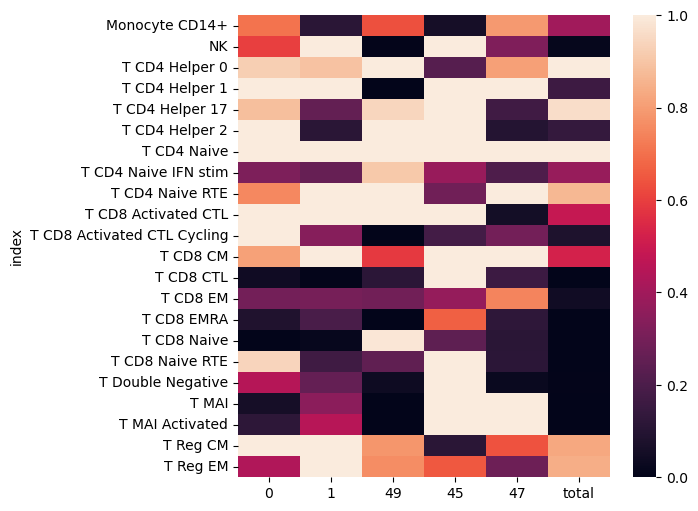

In [80]:
plt.figure(figsize=(6, 6))

sns.heatmap(fisher_res_df.reset_index().sort_values('index').set_index('index'))

<AxesSubplot: ylabel='index'>

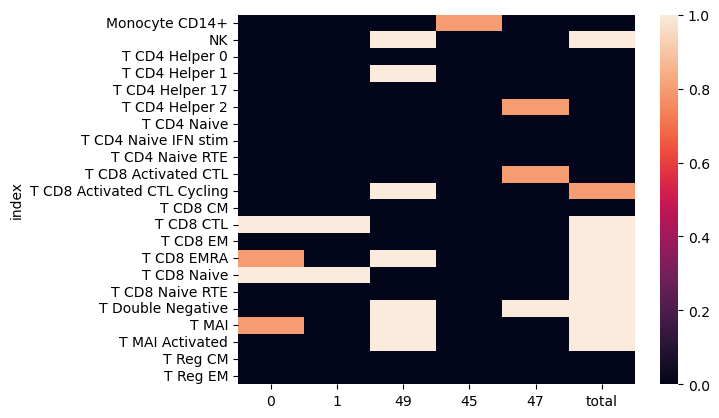

In [81]:
fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)
sns.heatmap(fisher_res_to_plot)

<AxesSubplot: ylabel='index'>

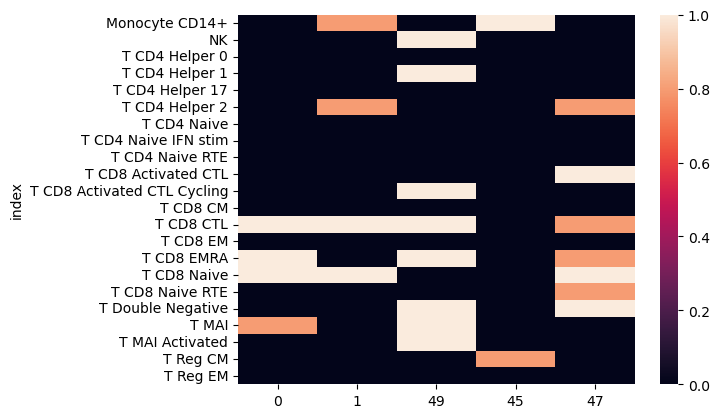

In [72]:
fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)
sns.heatmap(fisher_res_to_plot)

# Thymocutes DP alpha

In [235]:
thym_alpha_dp = df_depleted.sort_values('p.value.g').head(10000)
thym_alpha_dp

count      freq                                            cdr3nt  \
251584      4  0.000008        TGTGCTGTGAGGGGCTCTAGCAACACAGGCAAACTAATCTTT   
222911      3  0.000006           TGTGCTGTGCGTACTGGAGCCAATAGTAAGCTGACATTT   
271644      2  0.000004        TGTGCTGTGAGGAGTGGAGGTAGCAACTATAAACTGACATTT   
328494      1  0.000002        TGTGCCGTGAGAAGTGGAGGTAGCAACTATAAACTGACATTT   
304438      2  0.000004           TGTGCCGTGAACACCGGAGCCAATAGTAAGCTGACATTT   
...       ...       ...                                               ...   
381485      2  0.000004     TGTGTTGTGAGTGGGGTTTCTGGTGGCTACAATAAGCTGATTTTT   
278952      1  0.000002     TGTGCTGTGGAGCAAGGCTCTAGCAACACAGGCAAACTAATCTTT   
309364      1  0.000002        TGTGCTCTGAAAATCAAAGCTGCAGGCAACAAGCTAACTTTT   
123736      1  0.000002  TGTGCTGTGAGTGCCCGAAGTGGAGGTAGCAACTATAAACTGACATTT   
427493      1  0.000002              TGTGCCGTCGGTAGTTCTGCAAGGCAACTGACCTTT   

                  cdr3aa          v  d       j  VEnd  DStart  DEnd  JStart  \
251584    CAVRGSSNTGKLIF     TRAV21  .  TRAJ37    -1      -1    -1      -1   
222911     CAVRTGANSKLTF     TRAV20  .  TRAJ56    -1      -1    -1      -1   
271644    CAVRSGGSNYKLTF     TRAV21  .  TRAJ53    -1      -1    -1      -1   
328494    CAVRSGGSNYKLTF    TRAV8-1  .  TRAJ53    -1      -1    -1      -1   
304438     CAVNTGANSKLTF   TRAV12-2  .  TRAJ56    -1      -1    -1      -1   
...                  ...        ... ..     ...   ...     ...   ...     ...   
381485   CVVSGVSGGYNKLIF    TRAV8-2  .   TRAJ4    -1      -1    -1      -1   
278952   CAVEQGSSNTGKLIF  TRAV36DV7  .  TRAJ37    -1      -1    -1      -1   
309364    CALKIKAAGNKLTF    TRAV9-2  .  TRAJ17    -1      -1    -1      -1   
123736  CAVSARSGGSNYKLTF    TRAV8-6  .  TRAJ53    -1      -1    -1      -1   
427493      CAVGSSARQLTF   TRAV12-2  .  TRAJ22    -1      -1    -1      -1   

        degree.s  group.count.s  group2.count.s  degree.c  group.count.c  \
251584       303         494465             276       301         902723   
222911       203         494465              33       186         902723   
271644       240         494465             186       198         902723   
328494       240         494465              12       198         902723   
304438       190         494465              39       169         902723   
...          ...            ...             ...       ...            ...   
381485        35         494465             160        26         902723   
278952        35         494465              51        26         902723   
309364        35         494465              62        26         902723   
123736        35         494465              61        26         902723   
427493        35         494465              33        26         902723   

        group2.count.c  p.value.g    p.value.g2  
251584             324   0.000000  3.027746e-03  
222911              46   0.000000  3.469898e-08  
271644             181   0.000000  8.288650e-03  
328494              15   0.000000  5.354375e-09  
304438              42   0.000000  7.541421e-03  
...                ...        ...           ...  
381485             223   0.000005  9.089819e-04  
278952              27   0.000005  9.897495e-01  
309364              74   0.000005  9.755875e-03  
123736              55   0.000005  1.970688e-01  
427493             126   0.000005  1.023258e-13  

[10000 rows x 19 columns]

In [236]:
start = time.time()
res = process_all_lenghts(thym_alpha_dp)
end = time.time()

pd.Series(res).to_csv('./thym_dp_alpha_clusters.csv')    

res = pd.read_csv('./thym_dp_alpha_clusters.csv', index_col=0)
res = res['0'].apply(eval)

exploded_series = res.explode()

res_exploded = pd.DataFrame(exploded_series).reset_index()
res_exploded.rename(columns = {"0": 'cdr3', 'index': 'cluster_id'}, inplace=True)
res_exploded.set_index('cdr3', inplace=True)

Start processing
processing lenghts 16 startedprocessing lenghts 15 started
processing lenghts 12 started
processing lenghts 17 started

processing lenghts 11 startedprocessing lenghts 18 startedprocessing lenghts 10 started


processing lenghts 11 completedprocessing lenghts 18 completedprocessing lenghts 10 completed

processing lenghts 12 completed
processing lenghts 17 completed

processing lenghts 16 completed
processing lenghts 15 completed
processing lenghts 14 started
processing lenghts 13 started
processing lenghts 13 completed
processing lenghts 14 completed


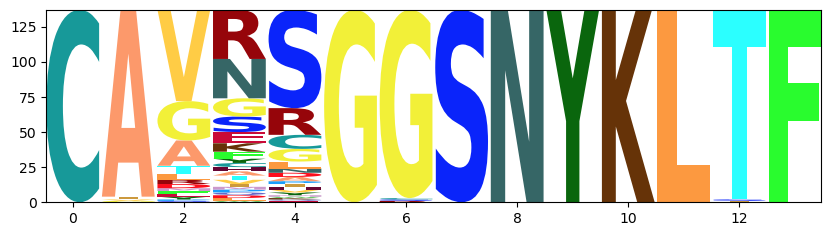

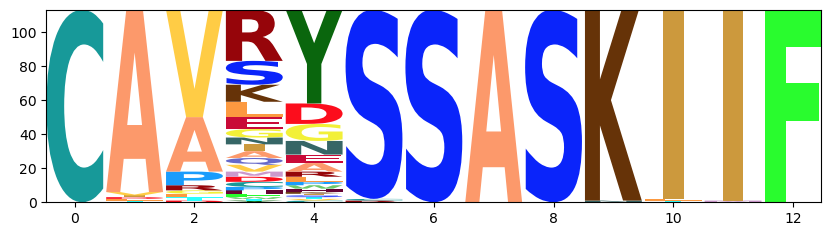

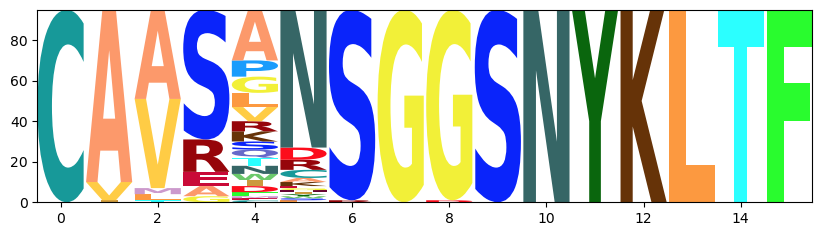

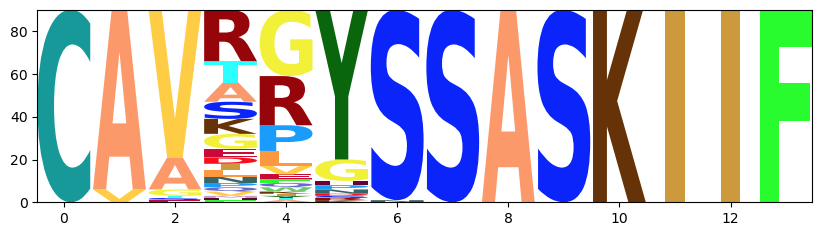

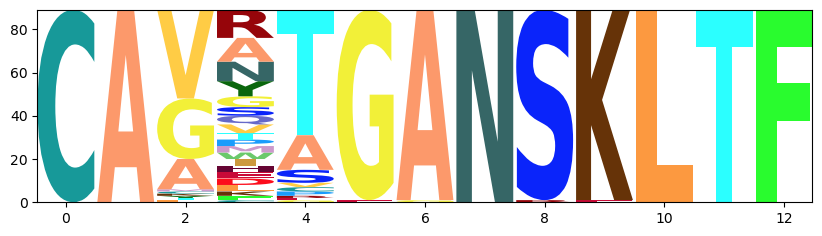

In [237]:
res = res_exploded.reset_index()

dif_clusters = res['cluster_id'].value_counts().head(5).index

import logomaker

for cluster in dif_clusters:
    clones = res[res['cluster_id'] == cluster].cdr3
    mat_df = logomaker.alignment_to_matrix(clones)
    logomaker.Logo(mat_df, color_scheme='skylign_protein', ax=None)

In [238]:
dif_clusters = res['cluster_id'].value_counts().head(5).index

types_dict = {}

for cluster in dif_clusters:
    
    cur_claster = set(res[res.cluster_id == cluster].cdr3)
    
    types_dict[cluster] = {}
    
    cur_founded_cluster = sc_data[sc_data.cdr3_a_aa.apply(lambda x: x in cur_claster)]
    
    for subtype in cur_founded_cluster.celltypist_majority.unique():
        types_dict[cluster][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_a_aa.unique())


cur_claster = set(res.cdr3)
types_dict['total'] = {}
cur_founded_cluster = sc_data[sc_data.cdr3_a_aa.apply(lambda x: x in cur_claster)]
for subtype in cur_founded_cluster.celltypist_majority.unique():
    types_dict['total'][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_a_aa.unique())

In [239]:
cell_type_counts_df = pd.DataFrame(types_dict)
cell_type_counts_df = cell_type_counts_df.fillna(0)
cell_type_counts_df

1   206   536     3   205  total
T CD4 Helper 0                    28.0  12.0   8.0  11.0   8.0    330
T CD4 Naive                       59.0  38.0  32.0  33.0  31.0    797
T Reg EM                           7.0   3.0   0.0   4.0   1.0     50
T CD8 EM                           6.0   3.0   0.0   0.0   1.0     50
T CD4 Helper 17                   10.0   2.0   0.0   1.0   2.0     61
NK                                 2.0   0.0   1.0   0.0   0.0      7
T CD8 Naive                       13.0   9.0   3.0   6.0   5.0    144
T Reg CM                           1.0   1.0   0.0   0.0   1.0     25
T CD4 Naive IFN stim               1.0   0.0   0.0   0.0   1.0     20
T CD8 CM                           1.0   1.0   0.0   1.0   2.0     18
T CD8 Activated CTL Cycling        1.0   0.0   1.0   1.0   0.0     11
T CD4 Helper 1                     2.0   0.0   1.0   0.0   0.0     15
T CD8 CTL                          3.0   4.0   2.0   4.0   1.0     47
T CD4 Naive RTE                    1.0   2.0   0.0   0.0   0.0     20
T MAI                              1.0   0.0   1.0   0.0   0.0      9
Monocyte CD14+                     4.0   1.0   0.0   0.0   0.0     31
T CD8 EMRA                         2.0   2.0   1.0   0.0   1.0     34
T CD4 Activated Helper 1 Cycling   1.0   1.0   0.0   0.0   0.0      4
T MAI Activated                    0.0   5.0   0.0   1.0   0.0     10
T CD4 CTL                          0.0   0.0   1.0   0.0   0.0      3
T CD8 Naive RTE                    0.0   0.0   0.0   1.0   2.0     21
T Double Negative                  0.0   0.0   0.0   0.0   0.0      2
T CD8 Activated CTL                0.0   0.0   0.0   0.0   0.0      1
T CD4 Helper 2                     0.0   0.0   0.0   0.0   0.0      3

In [240]:
fisher_res = {}
chi_statistics = {}

for cluster in cell_type_counts_df.columns:
    fisher_res[cluster] = {}
    chi_statistics[cluster] = {}
    for subtype in cell_type_counts_df.index:
        fisher_table = [
            [cell_type_counts_df[cluster][subtype], cell_type_counts_df[cluster].sum() - cell_type_counts_df[cluster][subtype]], 
            [len(sc_data[sc_data.celltypist_majority == subtype].cdr3_a_aa.unique()), len(sc_data[sc_data.celltypist_majority != subtype].cdr3_a_aa.unique())]
                       ]
        
        fisher_res[cluster][subtype] = fisher_exact(fisher_table, alternative='greater')[1]
        chi_statistics[cluster][subtype] = cell_type_counts_df[cluster][subtype]/(cell_type_counts_df[cluster].sum()*len(sc_data[sc_data.celltypist_majority == subtype].cdr3_a_aa.unique()))

In [241]:
fisher_res_df = pd.DataFrame(fisher_res)
chi_res_df = pd.DataFrame(chi_statistics)
fisher_res_df

1       206       536         3  \
T CD4 Helper 0                    0.064430  0.583696  0.475895  0.312920   
T CD4 Naive                       0.999911  0.985667  0.226588  0.786289   
T Reg EM                          0.017942  0.205038  1.000000  0.029772   
T CD8 EM                          0.483867  0.639221  1.000000  1.000000   
T CD4 Helper 17                   0.001316  0.552313  1.000000  0.752630   
NK                                0.108808  1.000000  0.181426  1.000000   
T CD8 Naive                       0.617453  0.412130  0.877323  0.566497   
T Reg CM                          0.767405  0.575521  1.000000  1.000000   
T CD4 Naive IFN stim              0.699436  1.000000  1.000000  1.000000   
T CD8 CM                          0.633062  0.445139  1.000000  0.357128   
T CD8 Activated CTL Cycling       0.392758  1.000000  0.163024  0.197340   
T CD4 Helper 1                    0.119648  1.000000  0.191176  1.000000   
T CD8 CTL                         0.787049  0.227323  0.437695  0.110410   
T CD4 Naive RTE                   0.569925  0.088114  1.000000  1.000000   
T MAI                             0.561401  1.000000  0.254745  1.000000   
Monocyte CD14+                    0.180865  0.729128  1.000000  1.000000   
T CD8 EMRA                        0.756595  0.474919  0.623532  1.000000   
T CD4 Activated Helper 1 Cycling  0.089504  0.053600  1.000000  1.000000   
T MAI Activated                   1.000000  0.011915  1.000000  0.641815   
T CD4 CTL                         1.000000  1.000000  0.047414  1.000000   
T CD8 Naive RTE                   1.000000  1.000000  1.000000  0.531293   
T Double Negative                 1.000000  1.000000  1.000000  1.000000   
T CD8 Activated CTL               1.000000  1.000000  1.000000  1.000000   
T CD4 Helper 2                    1.000000  1.000000  1.000000  1.000000   

                                       205         total  
T CD4 Helper 0                    0.587523  1.313425e-07  
T CD4 Naive                       0.624499  1.000000e+00  
T Reg EM                          0.649651  1.637540e-03  
T CD8 EM                          0.891606  9.864386e-01  
T CD4 Helper 17                   0.348450  2.512863e-04  
NK                                1.000000  5.061359e-01  
T CD8 Naive                       0.630502  9.535255e-01  
T Reg CM                          0.435219  5.035717e-02  
T CD4 Naive IFN stim              0.375555  9.190410e-02  
T CD8 CM                          0.058732  6.240900e-02  
T CD8 Activated CTL Cycling       1.000000  4.198617e-02  
T CD4 Helper 1                    1.000000  6.773544e-03  
T CD8 CTL                         0.807652  6.698565e-01  
T CD4 Naive RTE                   1.000000  3.881016e-03  
T MAI                             1.000000  6.493056e-01  
Monocyte CD14+                    1.000000  2.106091e-01  
T CD8 EMRA                        0.657909  4.196055e-01  
T CD4 Activated Helper 1 Cycling  1.000000  2.830595e-02  
T MAI Activated                   1.000000  9.999652e-01  
T CD4 CTL                         1.000000  2.252097e-01  
T CD8 Naive RTE                   0.144673  4.839424e-01  
T Double Negative                 1.000000  9.253221e-01  
T CD8 Activated CTL               1.000000  5.907723e-01  
T CD4 Helper 2                    1.000000  2.469660e-01

<AxesSubplot: ylabel='index'>

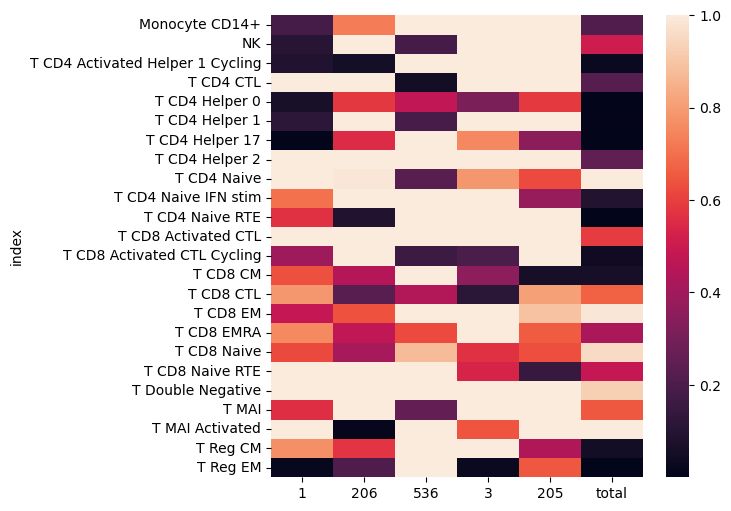

In [242]:
plt.figure(figsize=(6, 6))

sns.heatmap(fisher_res_df.reset_index().sort_values('index').set_index('index'))

<AxesSubplot: ylabel='index'>

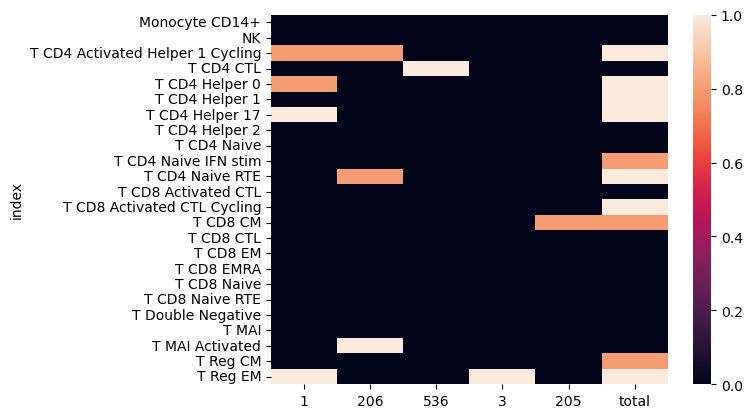

In [243]:
fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)
sns.heatmap(fisher_res_to_plot)

<AxesSubplot: ylabel='index'>

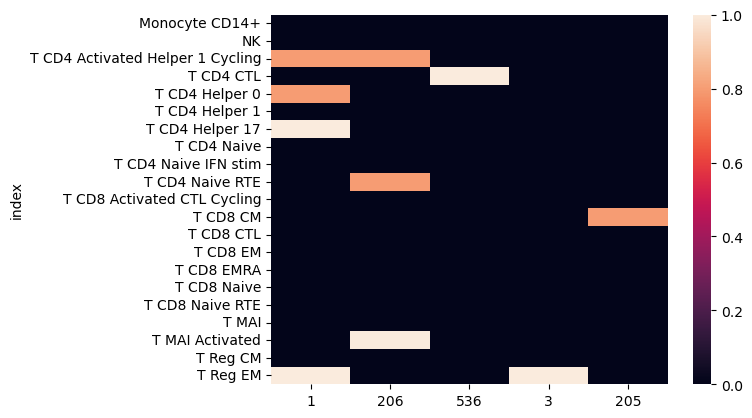

In [81]:
fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)
sns.heatmap(fisher_res_to_plot)

 # Naive analysis old

In [2]:
res = pd.read_csv('./prev_clusters/keck_clusters.tsv', sep = '\t', index_col=0)
res.rename(columns={'cluster': 'cluster_id'}, inplace=True)

res

cdr3  cluster_id           x           y  cluster_size  \
0     CASSAPGQGDEKLFF           0 -277.318726  507.002228             1   
1         CASRTGYEQYF           1 -381.256287  141.244644             3   
2         CASRGGYEQYF           1 -380.884308  141.670441             3   
3         CASRGKYEQYF           1 -380.392456  142.020340             3   
4      CASSLVSDSYEQYF           2  -20.308117 -519.545349             1   
...               ...         ...         ...         ...           ...   
9691    CASSHRGRTEAFF        4336  479.904144 -597.442200             1   
9692   CASSFGGARETQYF        4337 -458.221191 -363.569244             1   
9693   CASSDQGYQETQYF        4338 -407.838837  365.896240             1   
9694  CASRLDRGSYNEQFF        4339  790.334900   74.281105             1   
9695  CASSQRAANTGELFF        4340  447.043976  551.352051             1   

          x_mean      y_mean    cc  
0    -277.318726  507.002228     0  
1    -380.844350  141.645142     1  
2    -380.844350  141.645142     1  
3    -380.844350  141.645142     1  
4     -20.308117 -519.545349     2  
...          ...         ...   ...  
9691  479.904144 -597.442200  4336  
9692 -458.221191 -363.569244  4337  
9693 -407.838837  365.896240  4338  
9694  790.334900   74.281105  4339  
9695  447.043976  551.352051  4340  

[9696 rows x 8 columns]

In [4]:
dif_clusters = res.cluster_id.value_counts().head(5).index

res

cdr3  cluster_id           x           y  cluster_size  \
0     CASSAPGQGDEKLFF           0 -277.318726  507.002228             1   
1         CASRTGYEQYF           1 -381.256287  141.244644             3   
2         CASRGGYEQYF           1 -380.884308  141.670441             3   
3         CASRGKYEQYF           1 -380.392456  142.020340             3   
4      CASSLVSDSYEQYF           2  -20.308117 -519.545349             1   
...               ...         ...         ...         ...           ...   
9691    CASSHRGRTEAFF        4336  479.904144 -597.442200             1   
9692   CASSFGGARETQYF        4337 -458.221191 -363.569244             1   
9693   CASSDQGYQETQYF        4338 -407.838837  365.896240             1   
9694  CASRLDRGSYNEQFF        4339  790.334900   74.281105             1   
9695  CASSQRAANTGELFF        4340  447.043976  551.352051             1   

          x_mean      y_mean    cc  
0    -277.318726  507.002228     0  
1    -380.844350  141.645142     1  
2    -380.844350  141.645142     1  
3    -380.844350  141.645142     1  
4     -20.308117 -519.545349     2  
...          ...         ...   ...  
9691  479.904144 -597.442200  4336  
9692 -458.221191 -363.569244  4337  
9693 -407.838837  365.896240  4338  
9694  790.334900   74.281105  4339  
9695  447.043976  551.352051  4340  

[9696 rows x 8 columns]

In [6]:
res['cluster_id'].value_counts()

cluster_id
11      366
3       335
4       308
57      258
12      250
       ... 
23        1
26        1
29        1
4288      1
4289      1
Name: count, Length: 4341, dtype: int64

In [5]:
clustdif_clusters

Index([11, 3, 4, 57, 12], dtype='int64', name='cluster_id')

In [12]:
dif_clusters = res.cluster_id.value_counts().head(5).index

types_dict = {}

for cluster in dif_clusters:
    
    cur_claster = set(res[res.cluster_id == cluster].cdr3)
    
    types_dict[cluster] = {}
    
    cur_founded_cluster = sc_data[sc_data.cdr3_b_aa.apply(lambda x: x in cur_claster)]
    
    for subtype in cur_founded_cluster.celltypist_majority.unique():
        types_dict[cluster][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_b_aa.unique())


cur_claster = set(res.cdr3)
types_dict['total'] = {}
cur_founded_cluster = sc_data[sc_data.cdr3_b_aa.apply(lambda x: x in cur_claster)]
for subtype in cur_founded_cluster.celltypist_majority.unique():
    types_dict['total'][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_b_aa.unique())

In [13]:
cur_claster = set(res.cdr3)
subtype = 'T CD8 Naive RTE'


#cur_claster = set(res[res.cluster_id == 11].cdr3)
cur_founded_cluster = sc_data[sc_data.cdr3_b_aa.apply(lambda x: x in cur_claster)]
peptides_rte = cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_b_aa.unique()

peptides_rte

array(['CSARGTGSSYEQYF', 'CASSQGYTEAFF', 'CASSLEGSPLHF', 'CASSLTGAYEQYF',
       'CASRTGAEAFF', 'CASSRTSTDTQYF', 'CASSLGQSYEQYF',
       'CASSLGLAGSYNEQFF', 'CASRTGGNYGYTF', 'CASSVGTGGYEQYF',
       'CASSLGTAYEQYF', 'CASSLAGVTEAFF', 'CASSPTGGYGYTF', 'CASSPRGYEQYF',
       'CASSLGPSTDTQYF', 'CASSPPRSYEQYF', 'CASSFSGANVLTF',
       'CASSSTSTGELFF', 'CASSQAGNTEAFF', 'CASKGGGTGELFF', 'CASSQGRNTEAFF',
       'CASSGLAGTDTQYF', 'CASSLGTSGSYEQYF', 'CASSFSWGTEAFF',
       'CASSLASSYEQYF', 'CASSVAGEQFF', 'CASSPGTEAFF', 'CASSQGSYEQYF',
       'CASSLGGDTQYF', 'CASSLGLAGADTQYF', 'CASSPSGSSTDTQYF',
       'CASSLTGELFF', 'CASSQVTGTDTQYF', 'CASSSSYEQYF', 'CASSYGGEETQYF',
       'CASSLAGPYEQYF', 'CASSFASTDTQYF', 'CASSDLTDTQYF', 'CASSSGTPYEQYF',
       'CASSLGTSQETQYF', 'CASSPGNEQFF', 'CASSGSGSYEQYF', 'CASSVESSYNEQFF',
       'CASSLTGRSGANVLTF', 'CASSGSPQETQYF', 'CASSETSTDTQYF',
       'CASSSQGAYNEQFF', 'CASSFRETQYF'], dtype=object)

In [14]:
import peptides


kf2_rte = pd.Series(peptides_rte).apply(lambda x: peptides.Peptide(x).kidera_factors()).apply(lambda x: x[1])
kf4_rte = pd.Series(peptides_rte).apply(lambda x: peptides.Peptide(x).kidera_factors()).apply(lambda x: x[3])

kf6_rte = pd.Series(peptides_rte).apply(lambda x: peptides.Peptide(x).kidera_factors()).apply(lambda x: x[5])

kf8_rte = pd.Series(peptides_rte).apply(lambda x: peptides.Peptide(x).kidera_factors()).apply(lambda x: x[7])

subtype = 'T CD8 Naive'

cur_founded_cluster = sc_data[sc_data.cdr3_b_aa.apply(lambda x: x in cur_claster)]
peptides_naive = cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_b_aa.unique()

kf2_naive = pd.Series(peptides_naive).apply(lambda x: peptides.Peptide(x).kidera_factors()).apply(lambda x: x[1])
kf4_naive = pd.Series(peptides_naive).apply(lambda x: peptides.Peptide(x).kidera_factors()).apply(lambda x: x[3])

kf6_naive = pd.Series(peptides_naive).apply(lambda x: peptides.Peptide(x).kidera_factors()).apply(lambda x: x[5])

kf8_naive = pd.Series(peptides_naive).apply(lambda x: peptides.Peptide(x).kidera_factors()).apply(lambda x: x[7])

#peptides.Peptide('CASSLTGAYEQYF').kidera_factors()

ModuleNotFoundError: No module named 'peptides'

<AxesSubplot: xlabel='subtype', ylabel='Kidera 2'>

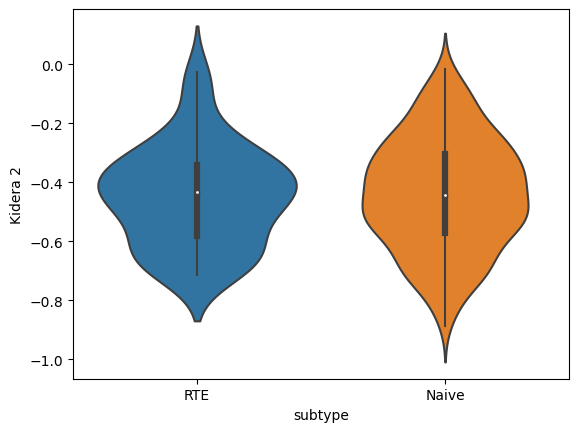

In [428]:
kf2_rte.name = 'Kidera 2'
kf2_rte = pd.DataFrame(kf2_rte)
kf2_rte['subtype'] = 'RTE'

kf2_naive.name = 'Kidera 2'
kf2_naive = pd.DataFrame(kf2_naive)
kf2_naive['subtype'] = 'Naive'

data = pd.concat([kf2_rte, kf2_naive])

sns.violinplot(data=data, x = 'subtype', y ='Kidera 2')

<AxesSubplot: xlabel='subtype', ylabel='Kidera 4'>

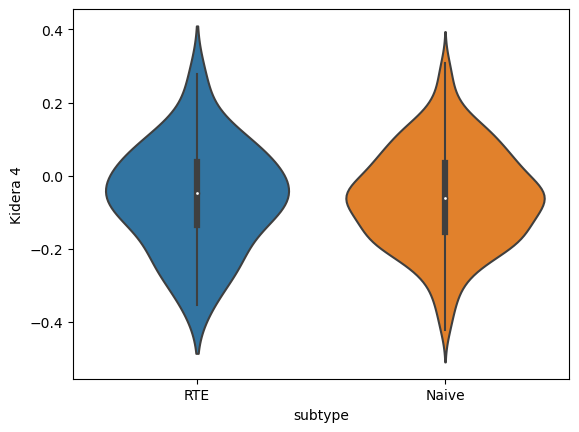

In [429]:
kf4_rte.name = 'Kidera 4'
kf4_rte = pd.DataFrame(kf4_rte)
kf4_rte['subtype'] = 'RTE'

kf4_naive.name = 'Kidera 4'
kf4_naive = pd.DataFrame(kf4_naive)
kf4_naive['subtype'] = 'Naive'

data = pd.concat([kf4_rte, kf4_naive])

sns.violinplot(data=data, x = 'subtype', y ='Kidera 4')

<AxesSubplot: xlabel='subtype', ylabel='Kidera 6'>

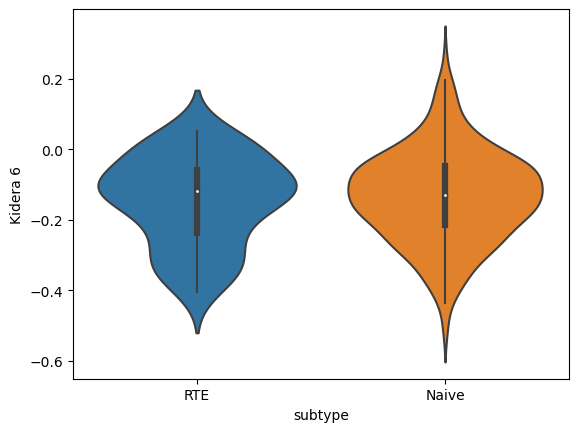

In [430]:
kf6_rte.name = 'Kidera 6'
kf6_rte = pd.DataFrame(kf6_rte)
kf6_rte['subtype'] = 'RTE'

kf6_naive.name = 'Kidera 6'
kf6_naive = pd.DataFrame(kf6_naive)
kf6_naive['subtype'] = 'Naive'

data = pd.concat([kf6_rte, kf6_naive])

sns.violinplot(data=data, x = 'subtype', y ='Kidera 6')

<AxesSubplot: xlabel='subtype', ylabel='Kidera 8'>

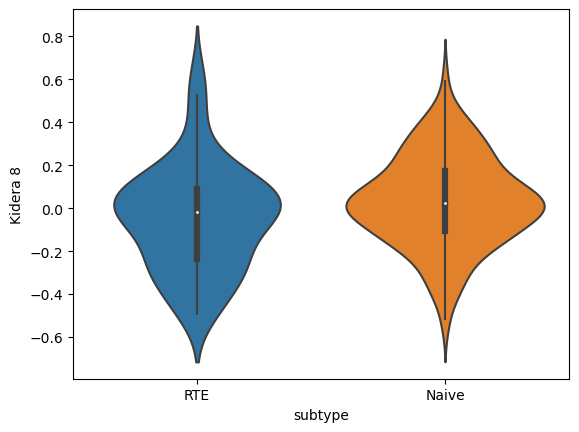

In [431]:
kf8_rte.name = 'Kidera 8'
kf8_rte = pd.DataFrame(kf8_rte)
kf8_rte['subtype'] = 'RTE'

kf8_naive.name = 'Kidera 8'
kf8_naive = pd.DataFrame(kf8_naive)
kf8_naive['subtype'] = 'Naive'

data = pd.concat([kf8_rte, kf8_naive])

sns.violinplot(data=data, x = 'subtype', y ='Kidera 8')

TypeError: could not convert string to float: 'RTE'

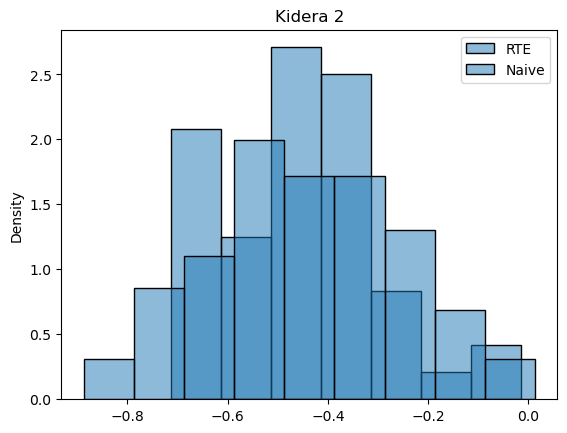

In [325]:
sns.histplot(kf2_rte, label = 'RTE', stat='density', binwidth=0.1)
sns.histplot(kf2_naive, label = 'Naive', stat='density', binwidth=0.1)
plt.title('Kidera 2')
plt.legend()

print(kf2_rte.median(),kf2_naive.median())

In [ ]:
sns.histplot(kf4_rte, label = 'RTE', stat='density', binwidth=0.1)
sns.histplot(kf4_naive, label = 'Naive', stat='density', binwidth=0.1)
plt.title('Kidera 4')

plt.legend()

print(kf4_rte.median(),kf4_naive.median())

In [ ]:
sns.histplot(kf6_rte, label = 'RTE', stat='density', binwidth=0.1)
sns.histplot(kf6_naive, label = 'Naive', stat='density', binwidth=0.1)

plt.title('Kidera 6')

plt.legend()
print(kf6_rte.median(),kf6_naive.median())

In [ ]:
sns.histplot(kf8_rte, label = 'RTE', stat='density', binwidth=0.1)
sns.histplot(kf8_naive, label = 'Naive', stat='density', binwidth=0.1)

plt.title('Kidera 8')

plt.legend()

print(kf8_rte.median(),kf8_naive.median())

In [15]:
cell_type_counts_df = pd.DataFrame(types_dict)
cell_type_counts_df = cell_type_counts_df.fillna(0)
cell_type_counts_df

11     3     4    57    12  total
T CD8 Naive                       14.0  29.0  36.0  26.0  24.0    291
T CD4 Naive                       77.0  82.0  72.0  47.0  69.0   1166
T CD8 EMRA                         5.0   5.0   3.0   4.0   2.0     41
T CD8 EM                          10.0   6.0  11.0   7.0   9.0    106
T CD8 CTL                          7.0   7.0   7.0   1.0   8.0     75
T CD4 Naive RTE                    3.0   0.0   0.0   1.0   0.0     17
MAIT Activated                     3.0   1.0   0.0   1.0   0.0     42
T CD8 Naive RTE                    8.0   4.0   3.0   1.0   6.0     48
T CD4 Helper 0                    29.0  24.0  22.0  13.0  25.0    318
T Reg CM                           3.0   1.0   2.0   0.0   4.0     22
T CD4 Helper 17                    4.0   1.0   7.0   1.0   5.0     54
T Reg EM                           1.0   6.0   5.0   2.0   9.0     52
T CD4 Helper 1                     1.0   1.0   0.0   0.0   0.0     11
T CD4 Naive IFN stim               1.0   0.0   1.0   0.0   1.0     25
T CD4 CTL                          0.0   2.0   0.0   0.0   1.0      5
T CD8 CM                           0.0   3.0   1.0   0.0   2.0     11
T CD8 Activated CTL                0.0   0.0   1.0   0.0   0.0      1
T CD4 Activated Helper 1 Cycling   0.0   0.0   1.0   1.0   0.0      3
T CD8 Activated CTL Cycling        0.0   0.0   0.0   1.0   0.0      4
T CD4 Activated CTL                0.0   0.0   0.0   1.0   0.0      1
T CD4 Helper 2                     0.0   0.0   0.0   0.0   1.0      2
T Double Negative                  0.0   0.0   0.0   0.0   0.0      1
MAIT                               0.0   0.0   0.0   0.0   0.0     13

In [16]:
cell_type_counts_df.sum()

11        166.0
3         172.0
4         172.0
57        107.0
12        166.0
total    2309.0
dtype: float64

In [17]:
cell_type_counts_df.sum()

11        166.0
3         172.0
4         172.0
57        107.0
12        166.0
total    2309.0
dtype: float64

In [18]:
set(sc_data.celltypist_majority.unique()).difference(set(cell_type_counts_df.index))

{'T Reg Activated Cycling'}

In [435]:
cell_type_counts_df.loc['T Reg Activated Cycling', :] = 0

In [19]:
cell_type_counts_df

11     3     4    57    12  total
T CD8 Naive                       14.0  29.0  36.0  26.0  24.0    291
T CD4 Naive                       77.0  82.0  72.0  47.0  69.0   1166
T CD8 EMRA                         5.0   5.0   3.0   4.0   2.0     41
T CD8 EM                          10.0   6.0  11.0   7.0   9.0    106
T CD8 CTL                          7.0   7.0   7.0   1.0   8.0     75
T CD4 Naive RTE                    3.0   0.0   0.0   1.0   0.0     17
MAIT Activated                     3.0   1.0   0.0   1.0   0.0     42
T CD8 Naive RTE                    8.0   4.0   3.0   1.0   6.0     48
T CD4 Helper 0                    29.0  24.0  22.0  13.0  25.0    318
T Reg CM                           3.0   1.0   2.0   0.0   4.0     22
T CD4 Helper 17                    4.0   1.0   7.0   1.0   5.0     54
T Reg EM                           1.0   6.0   5.0   2.0   9.0     52
T CD4 Helper 1                     1.0   1.0   0.0   0.0   0.0     11
T CD4 Naive IFN stim               1.0   0.0   1.0   0.0   1.0     25
T CD4 CTL                          0.0   2.0   0.0   0.0   1.0      5
T CD8 CM                           0.0   3.0   1.0   0.0   2.0     11
T CD8 Activated CTL                0.0   0.0   1.0   0.0   0.0      1
T CD4 Activated Helper 1 Cycling   0.0   0.0   1.0   1.0   0.0      3
T CD8 Activated CTL Cycling        0.0   0.0   0.0   1.0   0.0      4
T CD4 Activated CTL                0.0   0.0   0.0   1.0   0.0      1
T CD4 Helper 2                     0.0   0.0   0.0   0.0   1.0      2
T Double Negative                  0.0   0.0   0.0   0.0   0.0      1
MAIT                               0.0   0.0   0.0   0.0   0.0     13

In [20]:
for cell_type in set(sc_data.celltypist_majority.unique()).difference(set(cell_type_counts_df.index)):
    
    cell_type_counts_df.loc[cell_type, :] = 0

In [21]:
cell_type_counts_df.total.sum()

np.float64(2309.0)

In [22]:
fisher_res = {}
chi_statistics = {}
fc_statistics = {}


for cluster in cell_type_counts_df.columns:
    fisher_res[cluster] = {}
    chi_statistics[cluster] = {}
    fc_statistics[cluster] = {}
    for subtype in cell_type_counts_df.index:
        fisher_table = [
            [cell_type_counts_df[cluster][subtype], cell_type_counts_df[cluster].sum() - cell_type_counts_df[cluster][subtype]], 
            [len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique()) - cell_type_counts_df[cluster][subtype], len(sc_data[sc_data.celltypist_majority != subtype].cdr3_b_aa.unique()) - cell_type_counts_df[cluster].sum() + cell_type_counts_df[cluster][subtype]]
                       ]
        
        fisher_res[cluster][subtype] = fisher_exact(fisher_table,)[1]
        chi_statistics[cluster][subtype] = cell_type_counts_df[cluster][subtype]/(cell_type_counts_df[cluster].sum()*len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique()))
        fc_statistics[cluster][subtype] = (cell_type_counts_df[cluster][subtype]/cell_type_counts_df[cluster].sum())/(len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique())/len(sc_data.cdr3_b_aa.unique()))
        
fisher_res_df = pd.DataFrame(fisher_res)

chi_res_df = pd.DataFrame(chi_statistics)
fisher_res_df = fisher_res_df.apply(lambda x: multipletests(x)[1])

fc_res_df = pd.DataFrame(fc_statistics)

/home/dluppov/.conda/envs/new_analysis_env/lib/python3.11/site-packages/statsmodels/stats/multitest.py:186: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))


In [23]:
fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_ann = fisher_res_to_plot.applymap(lambda x: "**" if x < 0.01 else "*" if x< 0.05 else "")
fisher_res_to_ann

/scratch/ipykernel_1573215/3115454176.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fisher_res_to_ann = fisher_res_to_plot.applymap(lambda x: "**" if x < 0.01 else "*" if x< 0.05 else "")


11 3   4  57  12 total
index                                                  
MAIT                                                   
MAIT Activated                                         
T CD4 Activated CTL                                    
T CD4 Activated Helper 1 Cycling                       
T CD4 CTL                                              
T CD4 Helper 0                                         
T CD4 Helper 1                                         
T CD4 Helper 17                                        
T CD4 Helper 2                                         
T CD4 Naive                            **      **    **
T CD4 Naive IFN stim                                   
T CD4 Naive RTE                                        
T CD8 Activated CTL                                    
T CD8 Activated CTL Cycling                            
T CD8 CM                                               
T CD8 CTL                                              
T CD8 EM                                               
T CD8 EMRA                                             
T CD8 Naive                            **  **        **
T CD8 Naive RTE                   *                   *
T Double Negative                                      
T Reg Activated Cycling                                
T Reg CM                                               
T Reg EM

In [24]:
fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_ann = fisher_res_to_plot.applymap(lambda x: "**" if x < 0.01 else "*" if x< 0.05 else "")
fisher_res_to_ann

/scratch/ipykernel_1573215/3115454176.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fisher_res_to_ann = fisher_res_to_plot.applymap(lambda x: "**" if x < 0.01 else "*" if x< 0.05 else "")


11 3   4  57  12 total
index                                                  
MAIT                                                   
MAIT Activated                                         
T CD4 Activated CTL                                    
T CD4 Activated Helper 1 Cycling                       
T CD4 CTL                                              
T CD4 Helper 0                                         
T CD4 Helper 1                                         
T CD4 Helper 17                                        
T CD4 Helper 2                                         
T CD4 Naive                            **      **    **
T CD4 Naive IFN stim                                   
T CD4 Naive RTE                                        
T CD8 Activated CTL                                    
T CD8 Activated CTL Cycling                            
T CD8 CM                                               
T CD8 CTL                                              
T CD8 EM                                               
T CD8 EMRA                                             
T CD8 Naive                            **  **        **
T CD8 Naive RTE                   *                   *
T Double Negative                                      
T Reg Activated Cycling                                
T Reg CM                                               
T Reg EM

/home/dluppov/.conda/envs/new_analysis_env/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


Text(0.5, 1.0, 'Enriched in Naive compared to Modeled sample')

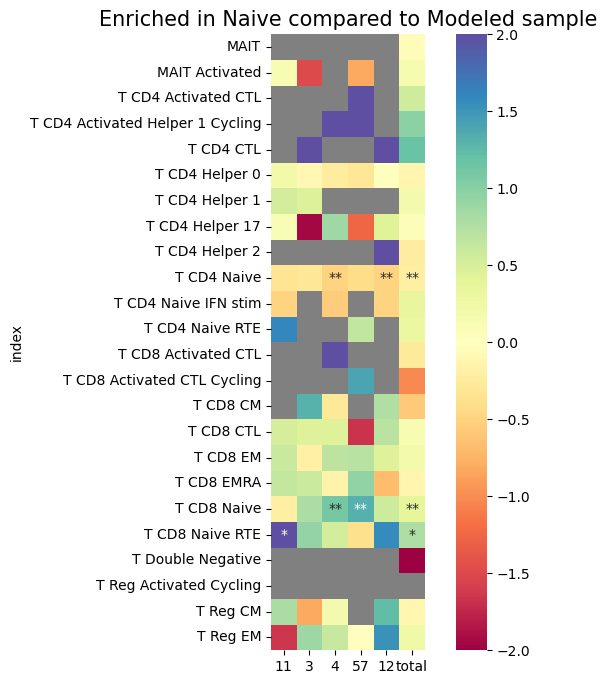

In [25]:
plt.figure(figsize=(8, 8))

sns.heatmap(np.log2(fc_res_df.reset_index().sort_values('index').set_index('index')),vmin = -2, vmax = 2, 
           annot = fisher_res_to_ann, fmt="", cmap=pallete, square=True)
plt.title('Enriched in Naive compared to Modeled sample', fontsize=15)
#plt.savefig('naive_vs_olga.svg')

In [16]:
np.log2(fc_res_df.reset_index().sort_values('index').set_index('index'))

/home/dluppov/.conda/envs/mir11/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


11         3         4        57  \
index                                                                      
MAIT                                  -inf      -inf      -inf      -inf   
MAIT Activated                    0.137156 -1.499031      -inf -0.814234   
T CD4 Activated CTL                   -inf      -inf      -inf  4.988821   
T CD4 Activated Helper 1 Cycling      -inf      -inf  3.141752  3.826550   
T CD4 CTL                             -inf  3.598309      -inf      -inf   
T CD4 Helper 0                    0.215109 -0.109134 -0.234665 -0.308859   
T CD4 Helper 1                    0.516345  0.465120      -inf      -inf   
T CD4 Helper 17                   0.111395 -1.939831  0.867524 -1.255033   
T CD4 Helper 2                        -inf      -inf      -inf      -inf   
T CD4 Naive                      -0.337087 -0.297547 -0.485174 -0.415712   
T CD4 Naive IFN stim             -0.496798      -inf -0.548023      -inf   
T CD4 Naive RTE                   1.597819      -inf      -inf  0.646429   
T CD8 Activated CTL                   -inf      -inf  3.467522      -inf   
T CD8 Activated CTL Cycling           -inf      -inf      -inf  1.403859   
T CD8 CM                              -inf  1.298310 -0.286653      -inf   
T CD8 CTL                         0.504052  0.452827  0.452827 -1.669730   
T CD8 EM                          0.594014 -0.194177  0.680292  0.713013   
T CD8 EMRA                        0.634866  0.583641 -0.153325  0.946510   
T CD8 Naive                      -0.213470  0.785931  1.097875  1.313187   
T CD8 Naive RTE                   1.988510  0.937285  0.522247 -0.377917   
T Double Negative                     -inf      -inf      -inf      -inf   
T Reg CM                          0.809947 -0.826241  0.173759      -inf   
T Reg EM                         -1.646361  0.887377  0.624342 -0.012788   

                                        12     total  
index                                                 
MAIT                                  -inf -0.052180  
MAIT Activated                        -inf  0.146498  
T CD4 Activated CTL                   -inf  0.557236  
T CD4 Activated Helper 1 Cycling      -inf  0.979927  
T CD4 CTL                         2.649534  1.173449  
T CD4 Helper 0                    0.000985 -0.128002  
T CD4 Helper 1                        -inf  0.177764  
T CD4 Helper 17                   0.433323  0.068269  
T CD4 Helper 2                    2.577641 -0.220372  
T CD4 Naive                      -0.495349 -0.214534  
T CD4 Naive IFN stim             -0.496798  0.349045  
T CD4 Naive RTE                       -inf  0.302306  
T CD8 Activated CTL                   -inf -0.279266  
T CD8 Activated CTL Cycling           -inf -1.027727  
T CD8 CM                          0.764573 -0.574009  
T CD8 CTL                         0.696697  0.127503  
T CD8 EM                          0.442011  0.201993  
T CD8 EMRA                       -0.687062 -0.127523  
T CD8 Naive                       0.564138  0.366037  
T CD8 Naive RTE                   1.573473  0.775460  
T Double Negative                     -inf -2.542300  
T Reg CM                          1.224985 -0.113597  
T Reg EM                          1.523564  0.256066

<AxesSubplot: ylabel='index'>

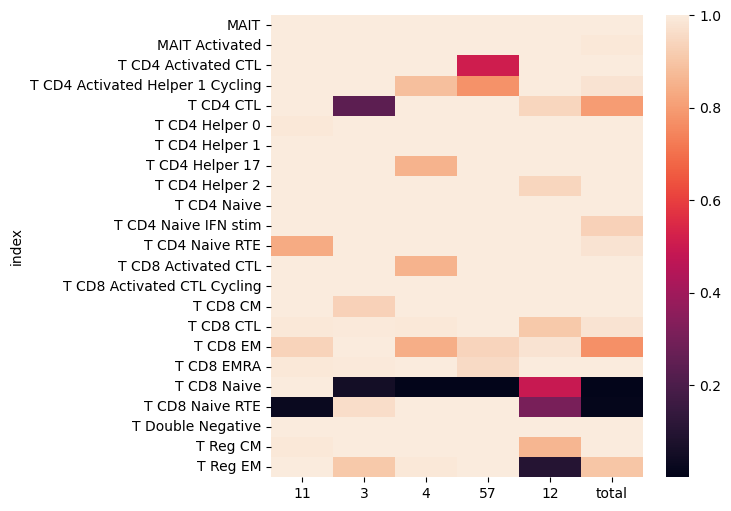

In [17]:
plt.figure(figsize=(6, 6))

sns.heatmap(fisher_res_df.reset_index().sort_values('index').set_index('index'))

<AxesSubplot: ylabel='index'>

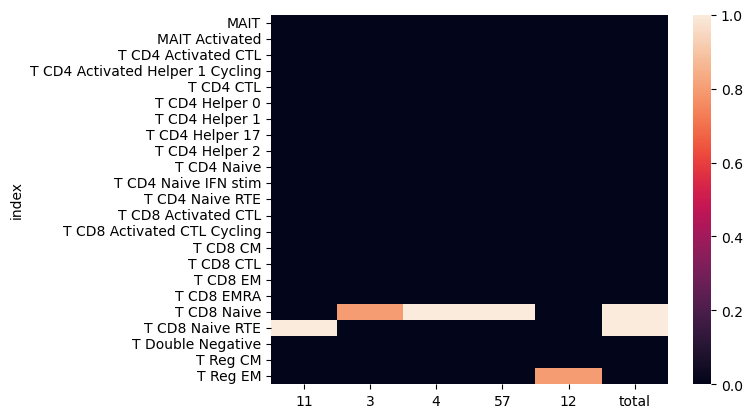

In [18]:
fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)
sns.heatmap(fisher_res_to_plot)

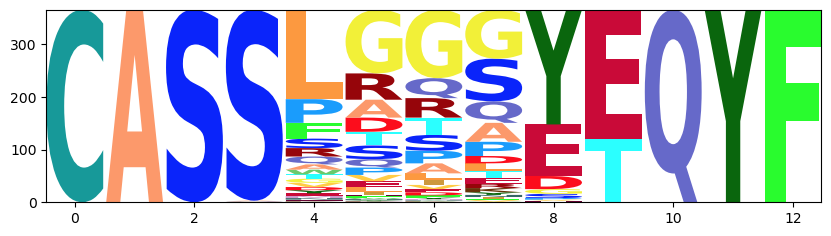

In [19]:
clones = res[res['cluster_id'] == 11].cdr3
mat_df = logomaker.alignment_to_matrix(clones)
logomaker.Logo(mat_df, color_scheme='skylign_protein', ax=None)

In [21]:
res[res['cluster_id'] == 11]

cdr3  cluster_id           x           y  cluster_size  \
682   CASSLQGAYEQYF          11   64.703728  118.638115           366   
683   CASSLDGAYEQYF          11   64.332153  118.640701           366   
684   CASSAQGAYEQYF          11   65.939873  118.565369           366   
685   CASSLVGAYEQYF          11   64.827469  118.152496           366   
686   CASSLTGAYEQYF          11   60.776779  120.095894           366   
...             ...         ...         ...         ...           ...   
1043  CASSWTNQETQYF          11  179.947021 -192.345398           366   
1044  CASSAQGGETQYF          11  172.623337 -233.888214           366   
1045  CASSRAYQETQYF          11  174.060806 -251.317123           366   
1046  CASSDRGIYEQYF          11   20.965197   89.140259           366   
1047  CASSAREGYEQYF          11   39.751919  103.184410           366   

         x_mean     y_mean  cc  
682   75.768254  27.377748  11  
683   75.768254  27.377748  11  
684   75.768254  27.377748  11  
685   75.768254  27.377748  11  
686   75.768254  27.377748  11  
...         ...        ...  ..  
1043  75.768254  27.377748  11  
1044  75.768254  27.377748  11  
1045  75.768254  27.377748  11  
1046  75.768254  27.377748  11  
1047  75.768254  27.377748  11  

[366 rows x 8 columns]

# OLGA analysis old

In [26]:
res = pd.read_csv('./prev_clusters/olga_clusters_beta.tsv', sep = '\t', index_col=0)
res.rename(columns={'cluster': 'cluster_id'}, inplace=True)

dif_clusters = res.cluster_id.value_counts().head(5).index

types_dict = {}

for cluster in dif_clusters:
    
    cur_claster = set(res[res.cluster_id == cluster].cdr3)
    
    types_dict[cluster] = {}
    
    cur_founded_cluster = sc_data[sc_data.cdr3_b_aa.apply(lambda x: x in cur_claster)]
    
    for subtype in cur_founded_cluster.celltypist_majority.unique():
        types_dict[cluster][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_b_aa.unique())


cur_claster = set(res.cdr3)
types_dict['total'] = {}
cur_founded_cluster = sc_data[sc_data.cdr3_b_aa.apply(lambda x: x in cur_claster)]
for subtype in cur_founded_cluster.celltypist_majority.unique():
    types_dict['total'][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_b_aa.unique())
    
cell_type_counts_df = pd.DataFrame(types_dict)
cell_type_counts_df = cell_type_counts_df.fillna(0)
cell_type_counts_df


3     2    1    8    13  total
T CD4 Naive           8.0  22.0  8.0  1.0  11.0     68
T CD4 Helper 0        3.0   3.0  2.0  0.0   0.0     14
T CD8 Naive           1.0   1.0  2.0  1.0   0.0      7
T CD8 Naive RTE       1.0   1.0  0.0  0.0   0.0      3
T CD4 Naive IFN stim  1.0   0.0  1.0  0.0   0.0      3
T CD8 CTL             1.0   1.0  0.0  0.0   0.0      3
T CD8 EM              0.0   2.0  1.0  0.0   1.0      5
T CD4 Helper 17       0.0   1.0  0.0  0.0   0.0      2
T CD8 CM              0.0   0.0  0.0  1.0   0.0      2
T Reg EM              0.0   0.0  0.0  0.0   0.0      1

In [27]:
for cell_type in set(sc_data.celltypist_majority.unique()).difference(set(cell_type_counts_df.index)):
    
    cell_type_counts_df.loc[cell_type, :] = 0

In [445]:
# Treg - поискать в глубь

/home/dluppov/.conda/envs/new_analysis_env/lib/python3.11/site-packages/statsmodels/stats/multitest.py:186: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/scratch/ipykernel_1573215/2863243149.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fisher_res_to_ann = fisher_res_to_plot.applymap(lambda x: "**" if x < 0.01 else "*" if x< 0.05 else "")
/home/dluppov/.conda/envs/new_analysis_env/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


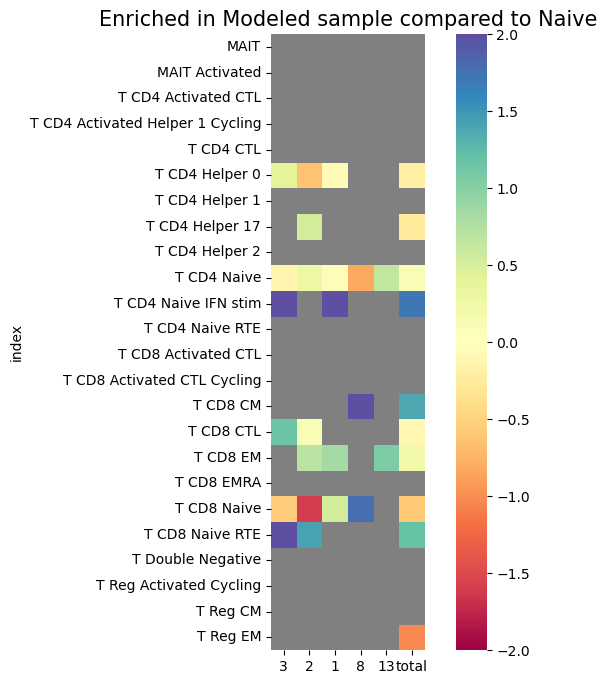

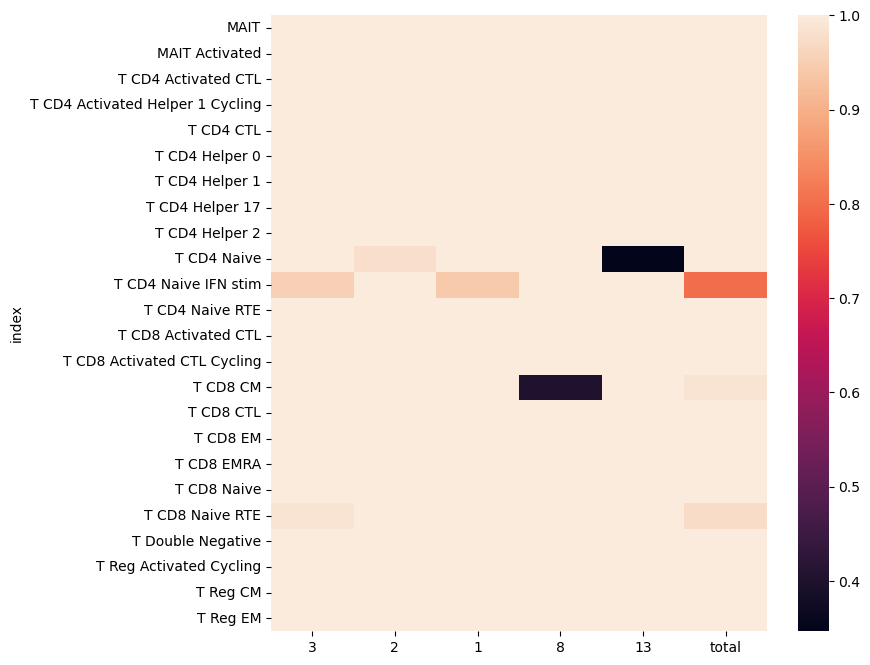

/scratch/ipykernel_1573215/2863243149.py:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)


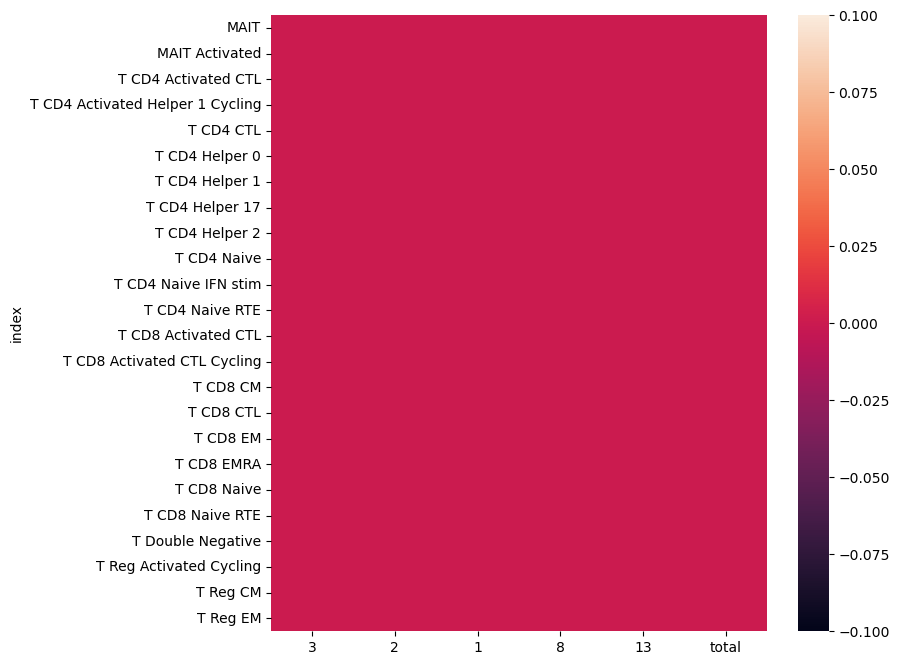

In [28]:
fisher_res = {}
chi_statistics = {}
fc_statistics = {}


for cluster in cell_type_counts_df.columns:
    fisher_res[cluster] = {}
    chi_statistics[cluster] = {}
    fc_statistics[cluster] = {}
    for subtype in cell_type_counts_df.index:
        fisher_table = [
            [cell_type_counts_df[cluster][subtype], cell_type_counts_df[cluster].sum() - cell_type_counts_df[cluster][subtype]], 
            [len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique()) - cell_type_counts_df[cluster][subtype], len(sc_data[sc_data.celltypist_majority != subtype].cdr3_b_aa.unique()) - cell_type_counts_df[cluster].sum() + cell_type_counts_df[cluster][subtype]]
                       ]
        
        fisher_res[cluster][subtype] = fisher_exact(fisher_table,)[1]
        chi_statistics[cluster][subtype] = cell_type_counts_df[cluster][subtype]/(cell_type_counts_df[cluster].sum()*len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique()))
        fc_statistics[cluster][subtype] = (cell_type_counts_df[cluster][subtype]/cell_type_counts_df[cluster].sum())/(len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique())/len(sc_data.cdr3_b_aa.unique()))
        
fisher_res_df = pd.DataFrame(fisher_res)

chi_res_df = pd.DataFrame(chi_statistics)
fisher_res_df = fisher_res_df.apply(lambda x: multipletests(x)[1])

fc_res_df = pd.DataFrame(fc_statistics)

fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_ann = fisher_res_to_plot.applymap(lambda x: "**" if x < 0.01 else "*" if x< 0.05 else "")

plt.figure(figsize=(8, 8))


plt.title('Enriched in Modeled sample compared to Naive', fontsize=15)
sns.heatmap(np.log2(fc_res_df.reset_index().sort_values('index').set_index('index')),vmin = -2, vmax = 2, 
           annot = fisher_res_to_ann, fmt="", cmap=pallete, square=True)

#plt.savefig('modeled_vs_naive.svg')
plt.show()

plt.figure(figsize=(8, 8))

sns.heatmap(fisher_res_df.reset_index().sort_values('index').set_index('index'))

plt.show()

fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')
plt.figure(figsize=(8, 8))
fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)
sns.heatmap(fisher_res_to_plot)

plt.show()


In [411]:
cell_type_counts_df.total.sum()

108.0

# Thymocytes SP old

In [29]:
res = pd.read_csv('./prev_clusters/thym_sp_beta_clusters.tsv', sep = ',', index_col=0)
res.rename(columns={'cluster': 'cluster_id'}, inplace=True)

dif_clusters = res.cluster_id.value_counts().head(5).index

types_dict = {}

for cluster in dif_clusters:
    
    cur_claster = set(res[res.cluster_id == cluster].cdr3)
    
    types_dict[cluster] = {}
    
    cur_founded_cluster = sc_data[sc_data.cdr3_b_aa.apply(lambda x: x in cur_claster)]
    
    for subtype in cur_founded_cluster.celltypist_majority.unique():
        types_dict[cluster][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_b_aa.unique())


cur_claster = set(res.cdr3)
types_dict['total'] = {}
cur_founded_cluster = sc_data[sc_data.cdr3_b_aa.apply(lambda x: x in cur_claster)]
for subtype in cur_founded_cluster.celltypist_majority.unique():
    types_dict['total'][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_b_aa.unique())
    
cell_type_counts_df = pd.DataFrame(types_dict)
cell_type_counts_df = cell_type_counts_df.fillna(0)
cell_type_counts_df

3      1      4      2     5  total
T CD8 Naive                       151.0  110.0   59.0   59.0   9.0    428
T CD4 Naive                       400.0  282.0  137.0  141.0  34.0   1120
T CD8 EMRA                         31.0   21.0    7.0    5.0   0.0     68
T CD4 Helper 0                    115.0   87.0   30.0   49.0   8.0    328
T CD4 Naive IFN stim               11.0    6.0    3.0    2.0   0.0     23
T CD8 EM                           52.0   38.0   15.0   21.0   3.0    142
T Reg EM                           17.0   13.0    4.0   16.0   1.0     57
T CD8 CTL                          46.0   23.0    8.0   17.0   8.0    111
T CD4 Helper 17                    25.0   14.0    6.0    5.0   2.0     57
T CD4 Helper 1                      5.0    3.0    1.0    0.0   0.0     13
T CD4 CTL                           4.0    2.0    1.0    2.0   0.0      9
T CD8 CM                            6.0    5.0    0.0    4.0   0.0     19
T CD8 Naive RTE                    19.0   10.0    4.0   13.0   0.0     55
T CD4 Naive RTE                     7.0    5.0    2.0    2.0   0.0     21
MAIT Activated                      8.0    1.0    4.0    1.0   0.0     15
T Reg CM                            8.0   13.0    1.0    4.0   0.0     31
T Double Negative                   2.0    0.0    0.0    1.0   0.0      4
T CD8 Activated CTL Cycling         5.0    1.0    2.0    4.0   0.0     12
MAIT                                3.0    4.0    0.0    0.0   0.0      7
T CD4 Helper 2                      3.0    1.0    1.0    0.0   0.0      5
T CD8 Activated CTL                 1.0    2.0    0.0    0.0   0.0      4
T CD4 Activated Helper 1 Cycling    0.0    1.0    1.0    0.0   0.0      2
T CD4 Activated CTL                 0.0    0.0    1.0    0.0   0.0      1

In [30]:
for cell_type in set(sc_data.celltypist_majority.unique()).difference(set(cell_type_counts_df.index)):
    
    cell_type_counts_df.loc[cell_type, :] = 0

/home/dluppov/.conda/envs/new_analysis_env/lib/python3.11/site-packages/statsmodels/stats/multitest.py:186: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/scratch/ipykernel_1573215/2415523543.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fisher_res_to_ann = fisher_res_to_plot.applymap(lambda x: "**" if x < 0.01 else "*" if x< 0.05 else "")
/home/dluppov/.conda/envs/new_analysis_env/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


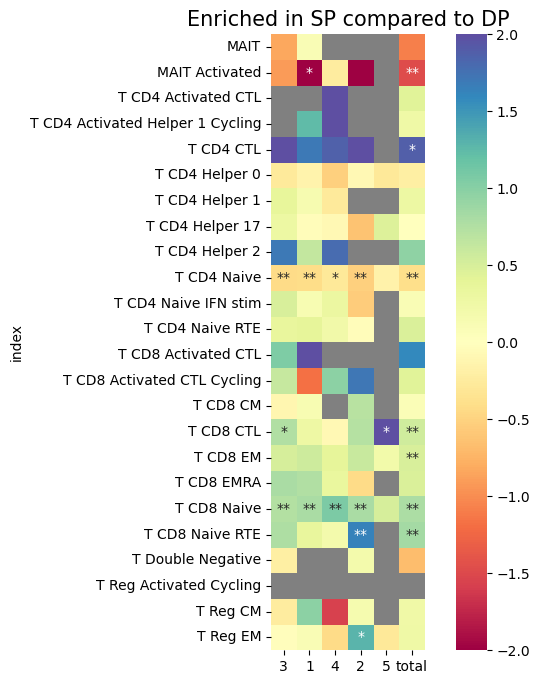

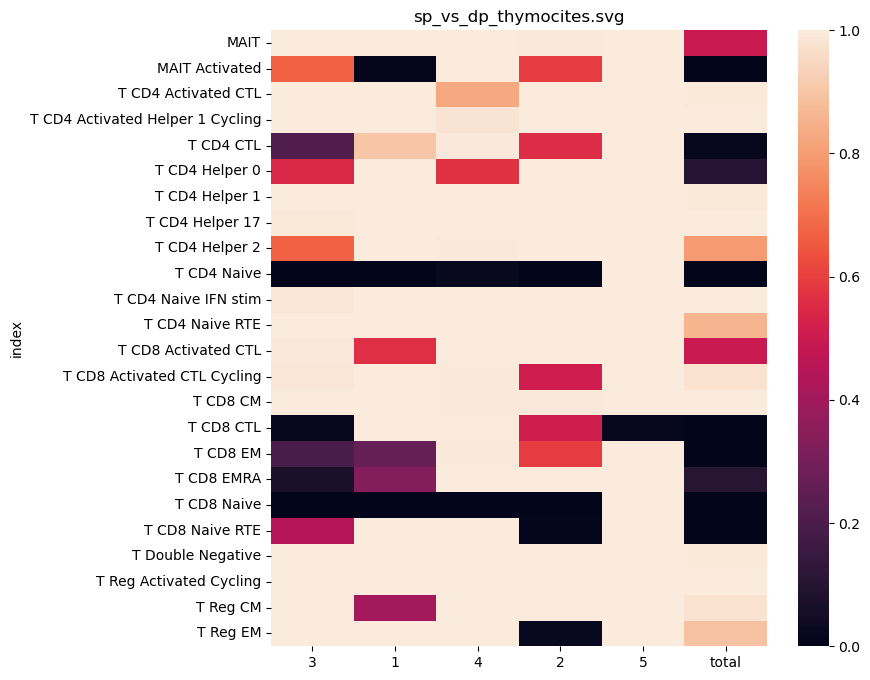

/scratch/ipykernel_1573215/2415523543.py:56: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)


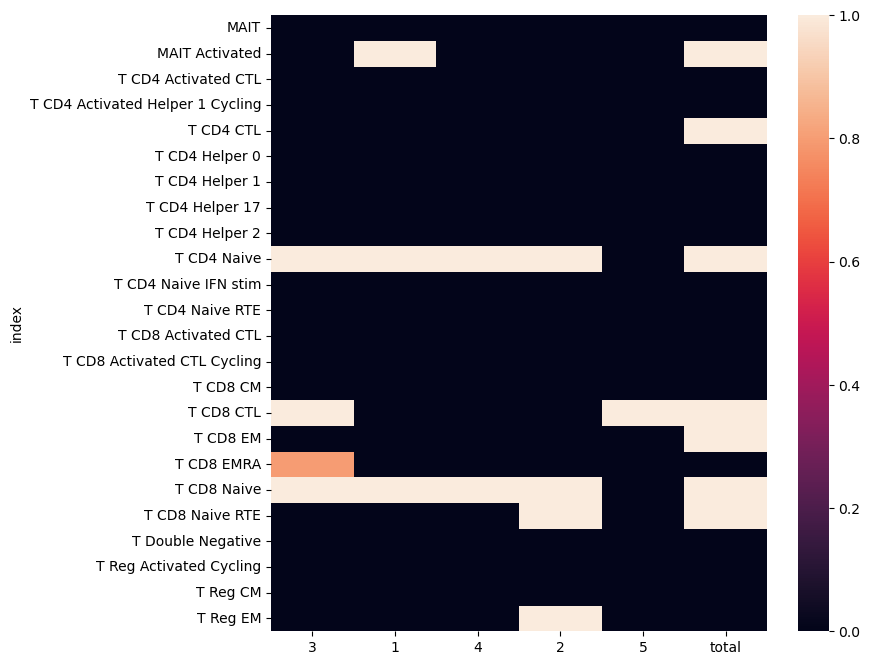

In [31]:
fisher_res = {}
chi_statistics = {}
fc_statistics = {}


for cluster in cell_type_counts_df.columns:
    fisher_res[cluster] = {}
    chi_statistics[cluster] = {}
    fc_statistics[cluster] = {}
    for subtype in cell_type_counts_df.index:
        fisher_table = [
            [cell_type_counts_df[cluster][subtype], cell_type_counts_df[cluster].sum() - cell_type_counts_df[cluster][subtype]], 
            [len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique()) - cell_type_counts_df[cluster][subtype], len(sc_data[sc_data.celltypist_majority != subtype].cdr3_b_aa.unique()) - cell_type_counts_df[cluster].sum() + cell_type_counts_df[cluster][subtype]]
                       ]
        
        fisher_res[cluster][subtype] = fisher_exact(fisher_table,)[1]
        chi_statistics[cluster][subtype] = cell_type_counts_df[cluster][subtype]/(cell_type_counts_df[cluster].sum()*len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique()))
        fc_statistics[cluster][subtype] = (cell_type_counts_df[cluster][subtype]/cell_type_counts_df[cluster].sum())/(len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique())/len(sc_data.cdr3_b_aa.unique()))
        
fisher_res_df = pd.DataFrame(fisher_res)

chi_res_df = pd.DataFrame(chi_statistics)
fisher_res_df = fisher_res_df.apply(lambda x: multipletests(x)[1])

fc_res_df = pd.DataFrame(fc_statistics)

fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_ann = fisher_res_to_plot.applymap(lambda x: "**" if x < 0.01 else "*" if x< 0.05 else "")

plt.figure(figsize=(8, 8))

sns.heatmap(np.log2(fc_res_df.reset_index().sort_values('index').set_index('index')),vmin = -2, vmax = 2, 
           annot = fisher_res_to_ann, fmt="", cmap=pallete, square=True)

plt.title('Enriched in SP compared to DP', fontsize = 15)


#plt.savefig('sp_vs_dp_thymocites.svg')


plt.show()

plt.figure(figsize=(8, 8))

sns.heatmap(fisher_res_df.reset_index().sort_values('index').set_index('index'))
plt.title('SP vs DP thymocites')


plt.title('sp_vs_dp_thymocites.svg')

plt.show()

fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')
plt.figure(figsize=(8, 8))
fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)
sns.heatmap(fisher_res_to_plot)

plt.show()

In [450]:
cell_type_counts_df.total.sum()

2532.0

# Thympcotes DP old

In [32]:
res = pd.read_csv('./prev_clusters/thym_dp_beta_clusters.tsv', sep = ',', index_col=0)
res.rename(columns={'cluster': 'cluster_id'}, inplace=True)

dif_clusters = res.cluster_id.value_counts().head(5).index

types_dict = {}

for cluster in dif_clusters:
    
    cur_claster = set(res[res.cluster_id == cluster].cdr3)
    
    types_dict[cluster] = {}
    
    cur_founded_cluster = sc_data[sc_data.cdr3_b_aa.apply(lambda x: x in cur_claster)]
    
    for subtype in cur_founded_cluster.celltypist_majority.unique():
        types_dict[cluster][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_b_aa.unique())


cur_claster = set(res.cdr3)
types_dict['total'] = {}
cur_founded_cluster = sc_data[sc_data.cdr3_b_aa.apply(lambda x: x in cur_claster)]
for subtype in cur_founded_cluster.celltypist_majority.unique():
    types_dict['total'][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_b_aa.unique())
    
cell_type_counts_df = pd.DataFrame(types_dict)
cell_type_counts_df = cell_type_counts_df.fillna(0)
cell_type_counts_df

1   35     7    22    6  total
T CD4 Helper 0                1.0  4.0   7.0   7.0  0.0     58
T CD4 Naive                  13.0  7.0  22.0  13.0  5.0    207
T CD4 Helper 17               1.0  0.0   0.0   0.0  2.0      7
T Reg CM                      1.0  0.0   0.0   0.0  0.0      2
T CD8 EMRA                    1.0  1.0   0.0   0.0  0.0      2
T CD8 Naive                   1.0  3.0   3.0   2.0  1.0     32
MAIT Activated                0.0  4.0   0.0   0.0  0.0     12
T CD8 CTL                     0.0  1.0   0.0   0.0  0.0      9
T CD8 EM                      0.0  1.0   1.0   0.0  0.0      7
MAIT                          0.0  1.0   0.0   0.0  0.0      2
T CD4 Helper 1                0.0  0.0   1.0   0.0  0.0      1
T Reg EM                      0.0  0.0   3.0   0.0  2.0     10
T CD8 Naive RTE               0.0  0.0   0.0   0.0  0.0      2
T CD4 Naive IFN stim          0.0  0.0   0.0   0.0  0.0      2
T CD4 Naive RTE               0.0  0.0   0.0   0.0  0.0      1
T CD8 Activated CTL Cycling   0.0  0.0   0.0   0.0  0.0      2
T CD8 CM                      0.0  0.0   0.0   0.0  0.0      1

In [33]:
for cell_type in set(sc_data.celltypist_majority.unique()).difference(set(cell_type_counts_df.index)):
    
    cell_type_counts_df.loc[cell_type, :] = 0

/home/dluppov/.conda/envs/new_analysis_env/lib/python3.11/site-packages/statsmodels/stats/multitest.py:186: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/scratch/ipykernel_1573215/3636016650.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fisher_res_to_ann = fisher_res_to_plot.applymap(lambda x: "**" if x < 0.01 else "*" if x< 0.05 else "")
/home/dluppov/.conda/envs/new_analysis_env/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


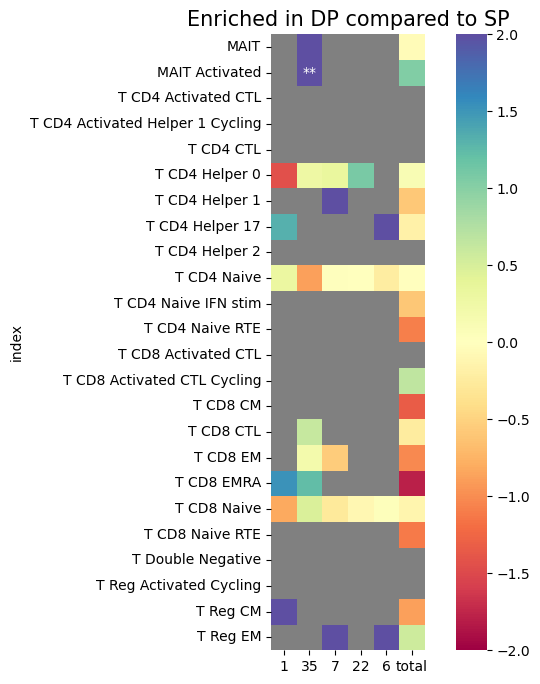

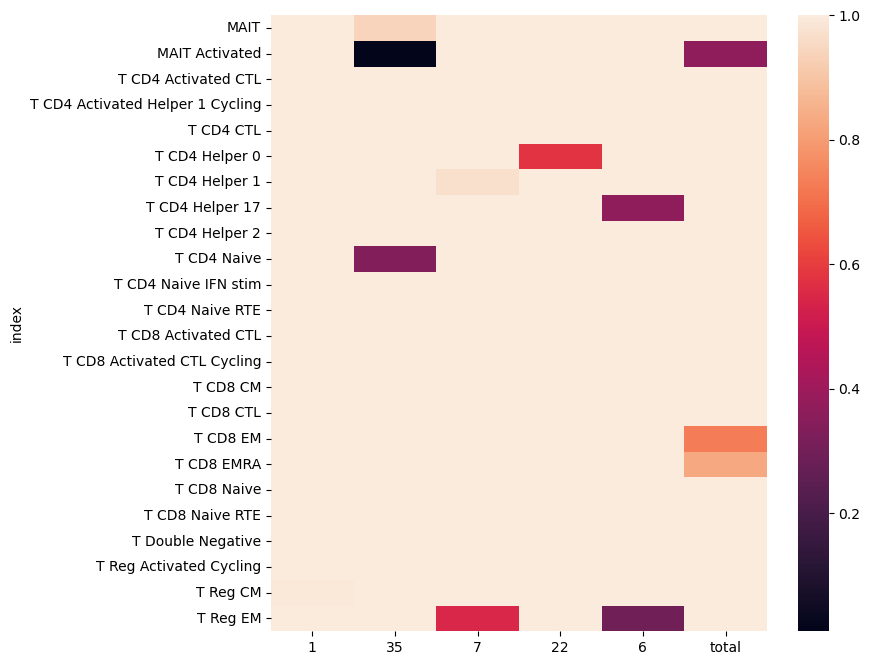

/scratch/ipykernel_1573215/3636016650.py:52: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)


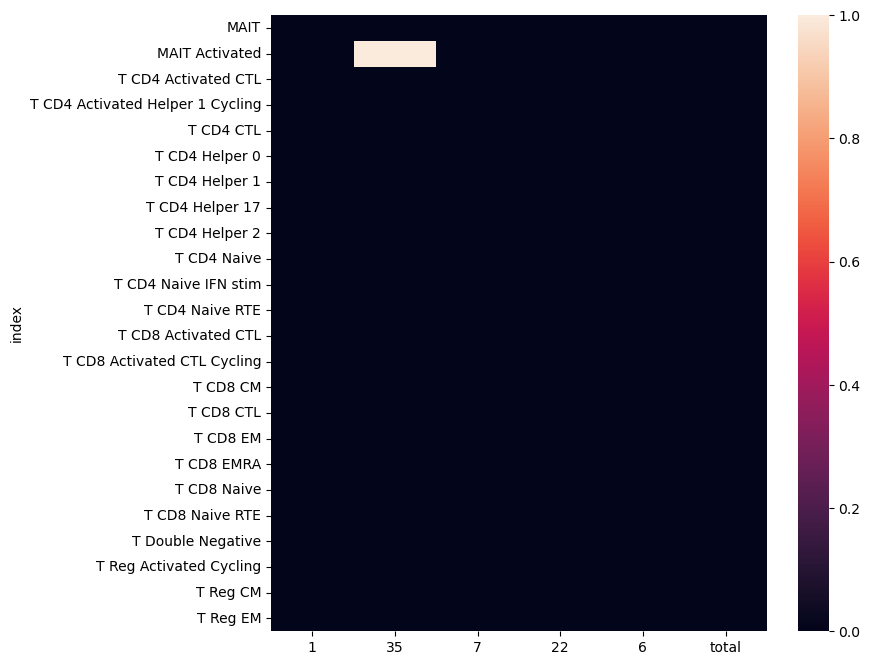

In [35]:
fisher_res = {}
chi_statistics = {}
fc_statistics = {}


for cluster in cell_type_counts_df.columns:
    fisher_res[cluster] = {}
    chi_statistics[cluster] = {}
    fc_statistics[cluster] = {}
    for subtype in cell_type_counts_df.index:
        fisher_table = [
            [cell_type_counts_df[cluster][subtype], cell_type_counts_df[cluster].sum() - cell_type_counts_df[cluster][subtype]], 
            [len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique()) - cell_type_counts_df[cluster][subtype], len(sc_data[sc_data.celltypist_majority != subtype].cdr3_b_aa.unique()) - cell_type_counts_df[cluster].sum() + cell_type_counts_df[cluster][subtype]]
                       ]
        
        fisher_res[cluster][subtype] = fisher_exact(fisher_table,)[1]
        chi_statistics[cluster][subtype] = cell_type_counts_df[cluster][subtype]/(cell_type_counts_df[cluster].sum()*len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique()))
        fc_statistics[cluster][subtype] = (cell_type_counts_df[cluster][subtype]/cell_type_counts_df[cluster].sum())/(len(sc_data[sc_data.celltypist_majority == subtype].cdr3_b_aa.unique())/len(sc_data.cdr3_b_aa.unique()))
        
fisher_res_df = pd.DataFrame(fisher_res)

chi_res_df = pd.DataFrame(chi_statistics)
fisher_res_df = fisher_res_df.apply(lambda x: multipletests(x)[1])

fc_res_df = pd.DataFrame(fc_statistics)

fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_ann = fisher_res_to_plot.applymap(lambda x: "**" if x < 0.01 else "*" if x< 0.05 else "")

plt.figure(figsize=(8, 8))


sns.heatmap(np.log2(fc_res_df.reset_index().sort_values('index').set_index('index')),vmin = -2, vmax = 2, 
           annot = fisher_res_to_ann, fmt="", cmap=pallete, square=True)

plt.title('Enriched in DP compared to SP', fontsize = 15)

plt.savefig('dp_vs_sp_thymocites_fixed.svg')


plt.show()

plt.figure(figsize=(8, 8))

sns.heatmap(fisher_res_df.reset_index().sort_values('index').set_index('index'))

plt.show()

fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')
plt.figure(figsize=(8, 8))
fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)
sns.heatmap(fisher_res_to_plot)

plt.show()

In [454]:
cell_type_counts_df.total.sum()

357.0

# Naive analysis alpha old

In [36]:
res = pd.read_csv('./prev_clusters/heik_clusters.tsv', sep = '\t', index_col=0)
res.rename(columns={'cluster': 'cluster_id'}, inplace=True)

dif_clusters = res.cluster_id.value_counts().head(5).index

types_dict = {}

for cluster in dif_clusters:
    
    cur_claster = set(res[res.cluster_id == cluster].cdr3)
    
    types_dict[cluster] = {}
    
    cur_founded_cluster = sc_data[sc_data.cdr3_a_aa.apply(lambda x: x in cur_claster)]
    
    for subtype in cur_founded_cluster.celltypist_majority.unique():
        types_dict[cluster][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_a_aa.unique())


cur_claster = set(res.cdr3)
types_dict['total'] = {}
cur_founded_cluster = sc_data[sc_data.cdr3_a_aa.apply(lambda x: x in cur_claster)]
for subtype in cur_founded_cluster.celltypist_majority.unique():
    types_dict['total'][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_a_aa.unique())
    
cell_type_counts_df = pd.DataFrame(types_dict)
cell_type_counts_df = cell_type_counts_df.fillna(0)
cell_type_counts_df

48    77    52    27    21  total
T CD4 Naive                       50.0  54.0  39.0  47.0  57.0   3586
T CD8 Naive                       14.0  13.0   5.0  20.0  12.0   1092
T CD8 EM                           6.0   4.0   6.0   8.0   8.0    463
T CD4 Helper 0                    18.0  26.0  15.0  11.0  29.0   1430
T CD4 Helper 1                     1.0   0.0   0.0   0.0   1.0     67
T Reg EM                           2.0   3.0   1.0   6.0   7.0    264
T CD4 Helper 17                    3.0   3.0   3.0   1.0   7.0    293
T CD8 Naive RTE                    2.0   2.0   4.0   2.0   1.0    181
T CD8 CTL                          3.0   4.0   5.0   5.0   4.0    375
T CD8 CM                           2.0   1.0   2.0   1.0   2.0     93
T Reg CM                           1.0   4.0   1.0   0.0   2.0    144
T CD8 Activated CTL Cycling        1.0   2.0   1.0   0.0   1.0     57
T Double Negative                  1.0   0.0   0.0   1.0   0.0     27
T CD8 EMRA                         2.0   4.0   2.0   4.0   2.0    253
T CD4 Naive IFN stim               0.0   5.0   0.0   1.0   1.0    128
T CD4 Naive RTE                    0.0   0.0   1.0   2.0   2.0     87
MAIT Activated                     0.0   0.0   0.0   3.0   0.0    110
MAIT                               0.0   0.0   0.0   2.0   0.0     66
T CD4 Activated Helper 1 Cycling   0.0   0.0   0.0   0.0   1.0      7
T CD4 CTL                          0.0   0.0   0.0   0.0   0.0     11
T CD8 Activated CTL                0.0   0.0   0.0   0.0   0.0      3
T Reg Activated Cycling            0.0   0.0   0.0   0.0   0.0      3
T CD4 Activated CTL                0.0   0.0   0.0   0.0   0.0      4
T CD4 Helper 2                     0.0   0.0   0.0   0.0   0.0     16

In [37]:
set(sc_data.celltypist_majority.unique()).difference(set(cell_type_counts_df.index))

set()

In [38]:
for cell_type in set(sc_data.celltypist_majority.unique()).difference(set(cell_type_counts_df.index)):
    
    cell_type_counts_df.loc[cell_type, :] = 0

/home/dluppov/.conda/envs/new_analysis_env/lib/python3.11/site-packages/statsmodels/stats/multitest.py:186: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/scratch/ipykernel_1573215/1766289978.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fisher_res_to_ann = fisher_res_to_plot.applymap(lambda x: "**" if x < 0.01 else "*" if x< 0.05 else "")
/home/dluppov/.conda/envs/new_analysis_env/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


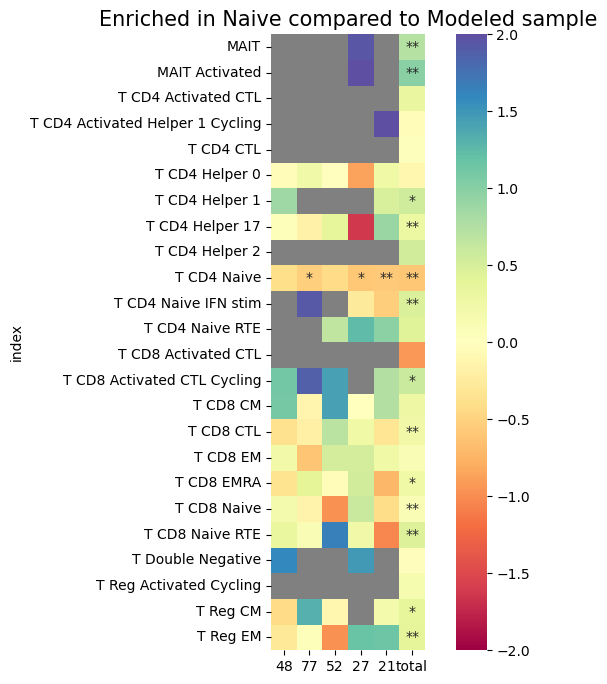

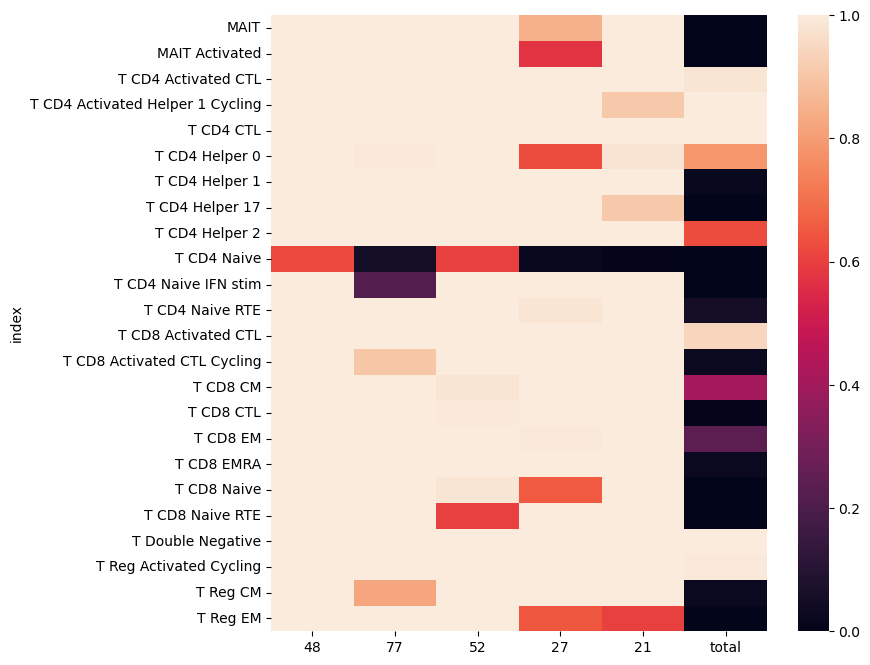

/scratch/ipykernel_1573215/1766289978.py:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)


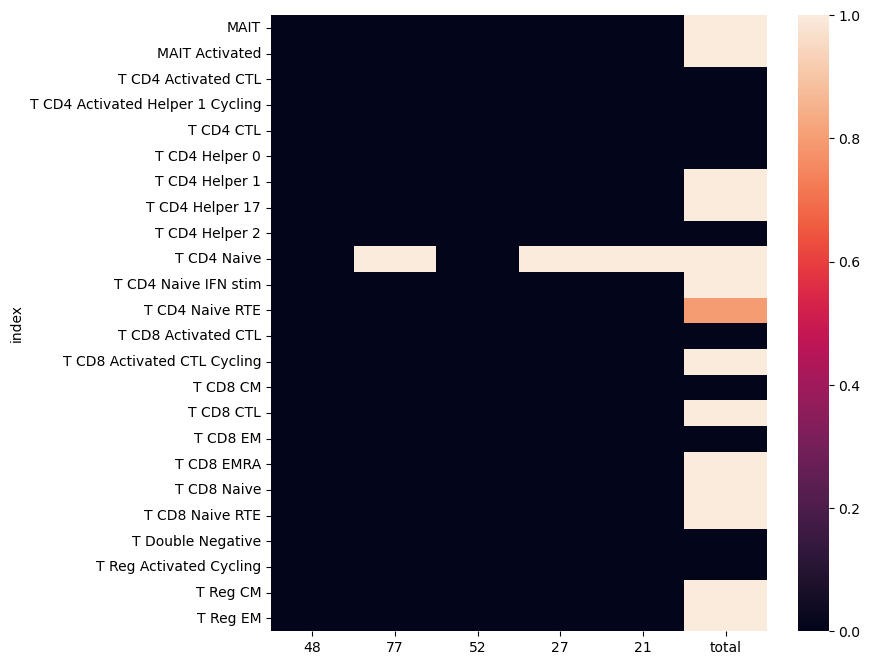

In [40]:
fisher_res = {}
chi_statistics = {}
fc_statistics = {}


for cluster in cell_type_counts_df.columns:
    fisher_res[cluster] = {}
    chi_statistics[cluster] = {}
    fc_statistics[cluster] = {}
    for subtype in cell_type_counts_df.index:
        fisher_table = [
            [cell_type_counts_df[cluster][subtype], cell_type_counts_df[cluster].sum() - cell_type_counts_df[cluster][subtype]], 
            [len(sc_data[sc_data.celltypist_majority == subtype].cdr3_a_aa.unique()) - cell_type_counts_df[cluster][subtype], len(sc_data[sc_data.celltypist_majority != subtype].cdr3_a_aa.unique()) - cell_type_counts_df[cluster].sum() + cell_type_counts_df[cluster][subtype]]
                       ]
        
        fisher_res[cluster][subtype] = fisher_exact(fisher_table,)[1]
        chi_statistics[cluster][subtype] = cell_type_counts_df[cluster][subtype]/(cell_type_counts_df[cluster].sum()*len(sc_data[sc_data.celltypist_majority == subtype].cdr3_a_aa.unique()))
        fc_statistics[cluster][subtype] = (cell_type_counts_df[cluster][subtype]/cell_type_counts_df[cluster].sum())/(len(sc_data[sc_data.celltypist_majority == subtype].cdr3_a_aa.unique())/len(sc_data.cdr3_a_aa.unique()))
        
fisher_res_df = pd.DataFrame(fisher_res)

chi_res_df = pd.DataFrame(chi_statistics)
fisher_res_df = fisher_res_df.apply(lambda x: multipletests(x)[1])

fc_res_df = pd.DataFrame(fc_statistics)

fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_ann = fisher_res_to_plot.applymap(lambda x: "**" if x < 0.01 else "*" if x< 0.05 else "")

plt.figure(figsize=(8, 8))

sns.heatmap(np.log2(fc_res_df.reset_index().sort_values('index').set_index('index')),vmin = -2, vmax = 2, 
           annot = fisher_res_to_ann, fmt="", cmap=pallete, square=True)
plt.title('Enriched in Naive compared to Modeled sample', fontsize = 15)

plt.savefig('naive_vs_modeled_alpha_fixed.svg')

plt.show()

plt.figure(figsize=(8, 8))

sns.heatmap(fisher_res_df.reset_index().sort_values('index').set_index('index'))

plt.show()

fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')
plt.figure(figsize=(8, 8))
fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)
sns.heatmap(fisher_res_to_plot)

plt.show()

In [459]:
cell_type_counts_df.total.sum()

8760

#  OLGA analysis alpha old

In [41]:
res = pd.read_csv('./prev_clusters/olga_clusres_alpha.tsv', sep = '\t', index_col=0)
res.rename(columns={'cluster': 'cluster_id'}, inplace=True)

dif_clusters = res.cluster_id.value_counts().head(5).index

types_dict = {}

for cluster in dif_clusters:
    
    cur_claster = set(res[res.cluster_id == cluster].cdr3)
    
    types_dict[cluster] = {}
    
    cur_founded_cluster = sc_data[sc_data.cdr3_a_aa.apply(lambda x: x in cur_claster)]
    
    for subtype in cur_founded_cluster.celltypist_majority.unique():
        types_dict[cluster][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_a_aa.unique())


cur_claster = set(res.cdr3)
types_dict['total'] = {}
cur_founded_cluster = sc_data[sc_data.cdr3_a_aa.apply(lambda x: x in cur_claster)]
for subtype in cur_founded_cluster.celltypist_majority.unique():
    types_dict['total'][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_a_aa.unique())
    
cell_type_counts_df = pd.DataFrame(types_dict)
cell_type_counts_df = cell_type_counts_df.fillna(0)
cell_type_counts_df

4    54   95   74   34  total
T CD4 Naive      2.0  12.0  3.0  5.0  4.0    104
T CD4 Helper 0   1.0   5.0  0.0  0.0  0.0     25
T CD4 Helper 17  1.0   0.0  0.0  0.0  0.0      1
T Reg EM         0.0   1.0  0.0  0.0  0.0      1
T CD8 Naive      0.0   1.0  1.0  0.0  1.0      9
T CD8 EM         0.0   0.0  0.0  0.0  0.0     10
T CD8 CM         0.0   0.0  0.0  0.0  0.0      1
T CD8 Naive RTE  0.0   0.0  0.0  0.0  0.0      1
T CD8 CTL        0.0   0.0  0.0  0.0  0.0      1
T CD8 EMRA       0.0   0.0  0.0  0.0  0.0      1
T Reg CM         0.0   0.0  0.0  0.0  0.0      1

In [42]:
for cell_type in set(sc_data.celltypist_majority.unique()).difference(set(cell_type_counts_df.index)):
    
    cell_type_counts_df.loc[cell_type, :] = 0

/home/dluppov/.conda/envs/new_analysis_env/lib/python3.11/site-packages/statsmodels/stats/multitest.py:186: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/scratch/ipykernel_1573215/263698124.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fisher_res_to_ann = fisher_res_to_plot.applymap(lambda x: "**" if x < 0.01 else "*" if x< 0.05 else "")
/home/dluppov/.conda/envs/new_analysis_env/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


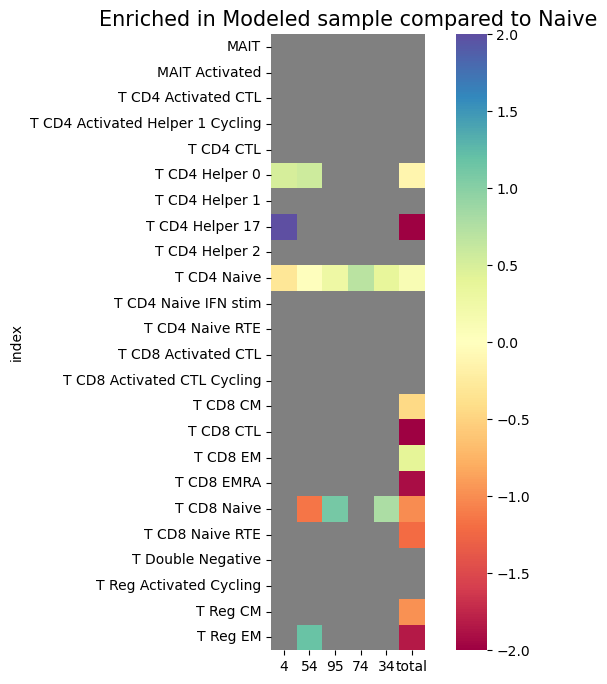

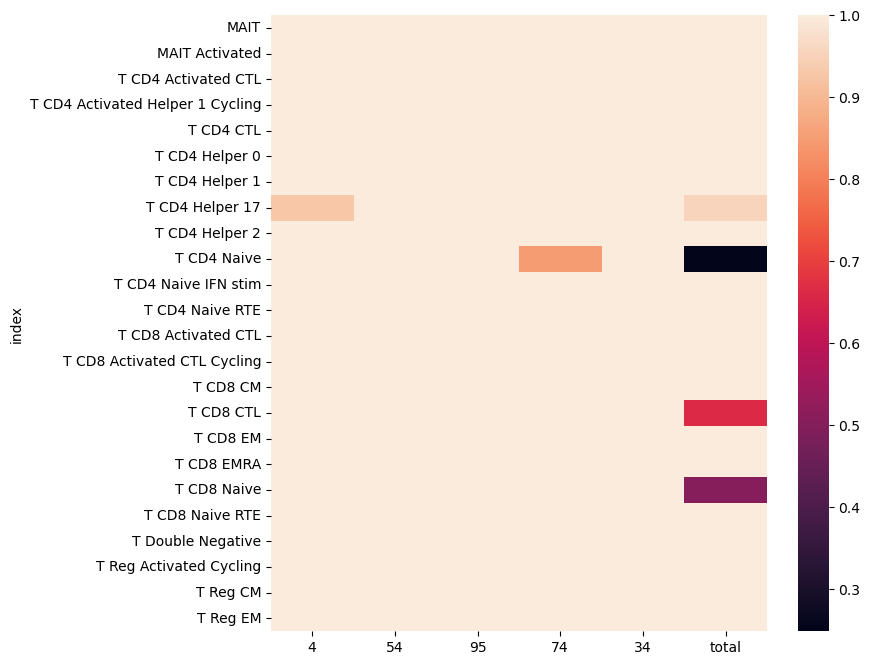

/scratch/ipykernel_1573215/263698124.py:50: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)


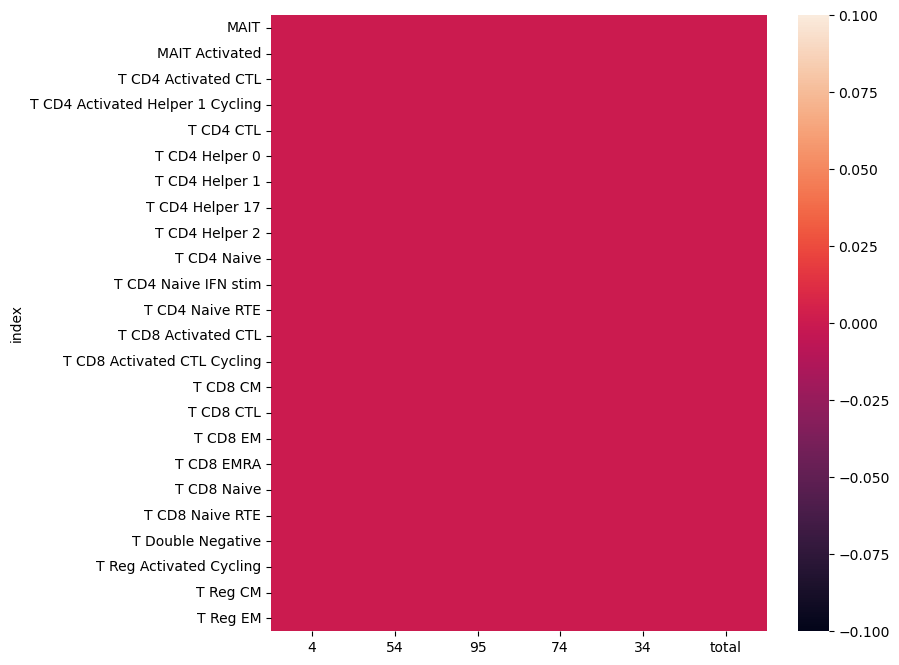

In [43]:
fisher_res = {}
chi_statistics = {}
fc_statistics = {}


for cluster in cell_type_counts_df.columns:
    fisher_res[cluster] = {}
    chi_statistics[cluster] = {}
    fc_statistics[cluster] = {}
    for subtype in cell_type_counts_df.index:
        fisher_table = [
            [cell_type_counts_df[cluster][subtype], cell_type_counts_df[cluster].sum() - cell_type_counts_df[cluster][subtype]], 
            [len(sc_data[sc_data.celltypist_majority == subtype].cdr3_a_aa.unique()) - cell_type_counts_df[cluster][subtype], len(sc_data[sc_data.celltypist_majority != subtype].cdr3_a_aa.unique()) - cell_type_counts_df[cluster].sum() + cell_type_counts_df[cluster][subtype]]
                       ]
        
        fisher_res[cluster][subtype] = fisher_exact(fisher_table,)[1]
        chi_statistics[cluster][subtype] = cell_type_counts_df[cluster][subtype]/(cell_type_counts_df[cluster].sum()*len(sc_data[sc_data.celltypist_majority == subtype].cdr3_a_aa.unique()))
        fc_statistics[cluster][subtype] = (cell_type_counts_df[cluster][subtype]/cell_type_counts_df[cluster].sum())/(len(sc_data[sc_data.celltypist_majority == subtype].cdr3_a_aa.unique())/len(sc_data.cdr3_a_aa.unique()))
        
fisher_res_df = pd.DataFrame(fisher_res)

chi_res_df = pd.DataFrame(chi_statistics)
fisher_res_df = fisher_res_df.apply(lambda x: multipletests(x)[1])

fc_res_df = pd.DataFrame(fc_statistics)

fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_ann = fisher_res_to_plot.applymap(lambda x: "**" if x < 0.01 else "*" if x< 0.05 else "")

plt.figure(figsize=(8, 8))

sns.heatmap(np.log2(fc_res_df.reset_index().sort_values('index').set_index('index')),vmin = -2, vmax = 2, 
           annot = fisher_res_to_ann, fmt="", cmap=pallete, square=True)

plt.title('Enriched in Modeled sample compared to Naive', fontsize = 15)

#plt.savefig('modeled_vs_naive_alpha.svg')

plt.show()

plt.figure(figsize=(8, 8))

sns.heatmap(fisher_res_df.reset_index().sort_values('index').set_index('index'))

plt.show()

fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')
plt.figure(figsize=(8, 8))
fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)
sns.heatmap(fisher_res_to_plot)

plt.show()

In [463]:
fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_plot

4        54        95        74  \
index                                                                      
MAIT                              1.000000  1.000000  1.000000  1.000000   
MAIT Activated                    1.000000  1.000000  1.000000  1.000000   
T CD4 Activated CTL               1.000000  1.000000  1.000000  1.000000   
T CD4 Activated Helper 1 Cycling  1.000000  1.000000  1.000000  1.000000   
T CD4 CTL                         1.000000  1.000000  1.000000  1.000000   
T CD4 Helper 0                    1.000000  0.999968  1.000000  1.000000   
T CD4 Helper 1                    1.000000  1.000000  1.000000  1.000000   
T CD4 Helper 17                   0.928206  1.000000  1.000000  1.000000   
T CD4 Helper 2                    1.000000  1.000000  1.000000  1.000000   
T CD4 Naive                       1.000000  1.000000  1.000000  0.847442   
T CD4 Naive IFN stim              1.000000  1.000000  1.000000  1.000000   
T CD4 Naive RTE                   1.000000  1.000000  1.000000  1.000000   
T CD8 Activated CTL               1.000000  1.000000  1.000000  1.000000   
T CD8 Activated CTL Cycling       1.000000  1.000000  1.000000  1.000000   
T CD8 CM                          1.000000  1.000000  1.000000  1.000000   
T CD8 CTL                         1.000000  1.000000  1.000000  1.000000   
T CD8 EM                          1.000000  1.000000  1.000000  1.000000   
T CD8 EMRA                        1.000000  1.000000  1.000000  1.000000   
T CD8 Naive                       1.000000  1.000000  0.999989  1.000000   
T CD8 Naive RTE                   1.000000  1.000000  1.000000  1.000000   
T Double Negative                 1.000000  1.000000  1.000000  1.000000   
T Reg Activated Cycling           1.000000  1.000000  1.000000  1.000000   
T Reg CM                          1.000000  1.000000  1.000000  1.000000   
T Reg EM                          1.000000  0.999968  1.000000  1.000000   

                                        34     total  
index                                                 
MAIT                              1.000000  1.000000  
MAIT Activated                    1.000000  1.000000  
T CD4 Activated CTL               1.000000  1.000000  
T CD4 Activated Helper 1 Cycling  1.000000  1.000000  
T CD4 CTL                         1.000000  1.000000  
T CD4 Helper 0                    1.000000  1.000000  
T CD4 Helper 1                    1.000000  1.000000  
T CD4 Helper 17                   1.000000  0.953850  
T CD4 Helper 2                    1.000000  1.000000  
T CD4 Naive                       0.999995  0.248768  
T CD4 Naive IFN stim              1.000000  0.999898  
T CD4 Naive RTE                   1.000000  1.000000  
T CD8 Activated CTL               1.000000  1.000000  
T CD8 Activated CTL Cycling       1.000000  1.000000  
T CD8 CM                          1.000000  1.000000  
T CD8 CTL                         1.000000  0.660634  
T CD8 EM                          1.000000  0.999469  
T CD8 EMRA                        1.000000  0.998365  
T CD8 Naive                       0.999999  0.502742  
T CD8 Naive RTE                   1.000000  1.000000  
T Double Negative                 1.000000  1.000000  
T Reg Activated Cycling           1.000000  1.000000  
T Reg CM                          1.000000  1.000000  
T Reg EM                          1.000000  0.998365

# Thymocytes SP alpha old

In [44]:
res = pd.read_csv('./prev_clusters/thym_sp_alpha_clusters.tsv', sep = '\t', index_col=0)
res.rename(columns={'cluster': 'cluster_id'}, inplace=True)

dif_clusters = res.cluster_id.value_counts().head(5).index

types_dict = {}

for cluster in dif_clusters:
    
    cur_claster = set(res[res.cluster_id == cluster].cdr3)
    
    types_dict[cluster] = {}
    
    cur_founded_cluster = sc_data[sc_data.cdr3_a_aa.apply(lambda x: x in cur_claster)]
    
    for subtype in cur_founded_cluster.celltypist_majority.unique():
        types_dict[cluster][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_a_aa.unique())


cur_claster = set(res.cdr3)
types_dict['total'] = {}
cur_founded_cluster = sc_data[sc_data.cdr3_a_aa.apply(lambda x: x in cur_claster)]
for subtype in cur_founded_cluster.celltypist_majority.unique():
    types_dict['total'][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_a_aa.unique())
    
cell_type_counts_df = pd.DataFrame(types_dict)
cell_type_counts_df = cell_type_counts_df.fillna(0)
cell_type_counts_df

2     4    10     0     5  total
T CD8 Naive                  36.0  18.0  16.0   7.0  13.0    156
T CD4 Naive                  74.0  29.0  37.0  16.0  25.0    331
T CD4 Helper 0               26.0  12.0  24.0  10.0  11.0    132
T Reg EM                      5.0   0.0   4.0   1.0   3.0     19
T CD8 CTL                    12.0  10.0  12.0   0.0   5.0     56
T CD8 EM                     11.0   6.0  13.0   3.0   3.0     61
T CD8 EMRA                    8.0   4.0  13.0   1.0   4.0     42
T CD4 Helper 17               3.0   4.0   3.0   0.0   4.0     19
T CD8 CM                      1.0   0.0   2.0   0.0   0.0      9
T CD4 Naive IFN stim          3.0   2.0   1.0   1.0   2.0     12
T CD4 Naive RTE               1.0   0.0   0.0   1.0   0.0      5
T CD8 Naive RTE               1.0   3.0   5.0   0.0   3.0     27
T Double Negative             1.0   1.0   3.0   0.0   2.0      9
MAIT                          3.0   2.0  32.0   0.0   0.0     39
MAIT Activated                3.0   1.0  41.0   0.0   0.0     49
T CD8 Activated CTL Cycling   0.0   1.0   5.0   1.0   1.0      8
T CD4 Helper 2                0.0   1.0   0.0   0.0   1.0      3
T CD4 Helper 1                0.0   0.0   7.0   0.0   0.0      8
T Reg CM                      0.0   0.0   2.0   2.0   1.0     10
T CD8 Activated CTL           0.0   0.0   0.0   0.0   1.0      1

In [45]:
for cell_type in set(sc_data.celltypist_majority.unique()).difference(set(cell_type_counts_df.index)):
    
    cell_type_counts_df.loc[cell_type, :] = 0

/home/dluppov/.conda/envs/new_analysis_env/lib/python3.11/site-packages/statsmodels/stats/multitest.py:186: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/scratch/ipykernel_2416829/1888999343.py:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fisher_res_to_ann = fisher_res_to_plot.applymap(lambda x: "**" if x < 0.01 else "*" if x< 0.05 else "")
/home/dluppov/.conda/envs/new_analysis_env/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


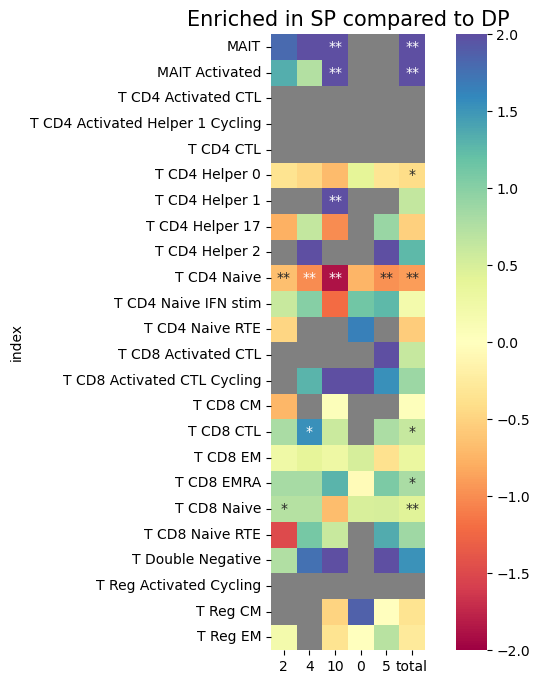

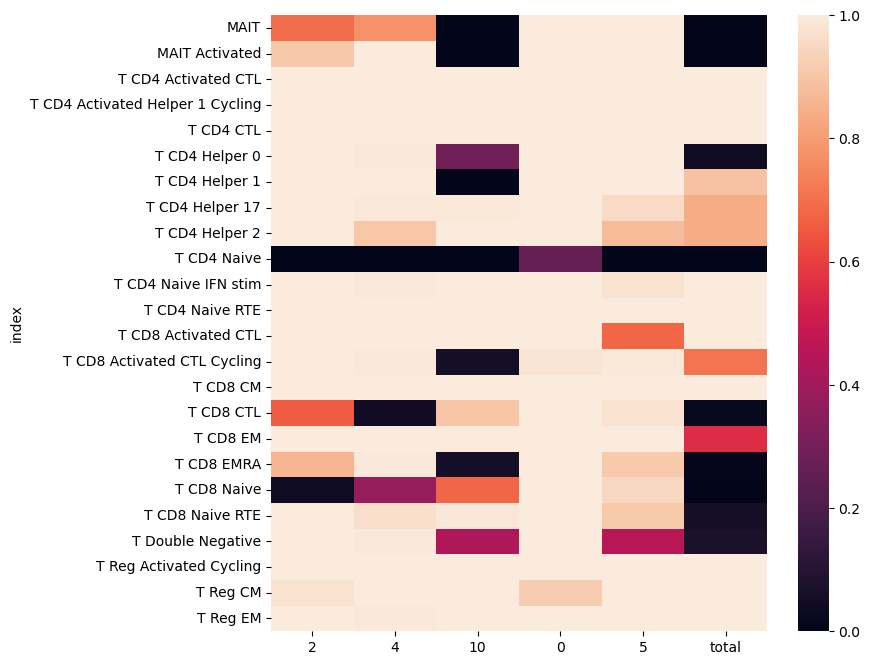

/scratch/ipykernel_2416829/1888999343.py:54: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)


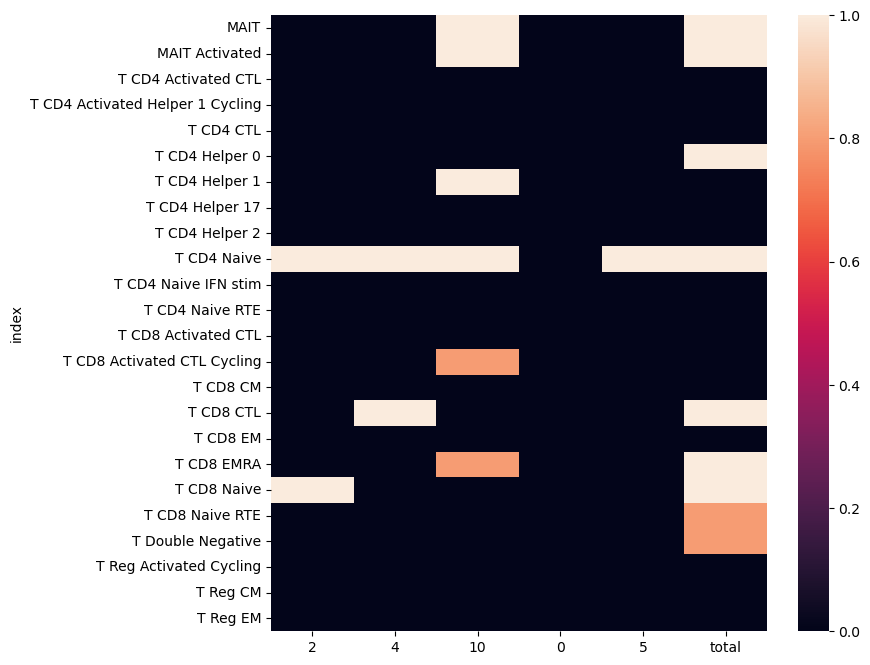

In [52]:
fisher_res = {}
chi_statistics = {}
fc_statistics = {}


for cluster in cell_type_counts_df.columns:
    fisher_res[cluster] = {}
    chi_statistics[cluster] = {}
    fc_statistics[cluster] = {}
    for subtype in cell_type_counts_df.index:
        fisher_table = [
            [cell_type_counts_df[cluster][subtype], cell_type_counts_df[cluster].sum() - cell_type_counts_df[cluster][subtype]], 
            [len(sc_data[sc_data.celltypist_majority == subtype].cdr3_a_aa.unique()) - cell_type_counts_df[cluster][subtype], len(sc_data[sc_data.celltypist_majority != subtype].cdr3_a_aa.unique()) - cell_type_counts_df[cluster].sum() + cell_type_counts_df[cluster][subtype]]
                       ]
        
        fisher_res[cluster][subtype] = fisher_exact(fisher_table,)[1]
        chi_statistics[cluster][subtype] = cell_type_counts_df[cluster][subtype]/(cell_type_counts_df[cluster].sum()*len(sc_data[sc_data.celltypist_majority == subtype].cdr3_a_aa.unique()))
        fc_statistics[cluster][subtype] = (cell_type_counts_df[cluster][subtype]/cell_type_counts_df[cluster].sum())/(len(sc_data[sc_data.celltypist_majority == subtype].cdr3_a_aa.unique())/len(sc_data.cdr3_a_aa.unique()))
        
fisher_res_df = pd.DataFrame(fisher_res)

chi_res_df = pd.DataFrame(chi_statistics)
fisher_res_df = fisher_res_df.apply(lambda x: multipletests(x)[1])

fc_res_df = pd.DataFrame(fc_statistics)

#fc_res_df = fc_res_df.applymap(lambda x: np.nan if x ==0 else x)
fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_ann = fisher_res_to_plot.applymap(lambda x: "**" if x < 0.01 else "*" if x< 0.05 else "")

plt.figure(figsize=(8, 8))


sns.heatmap(np.log2(fc_res_df.reset_index().sort_values('index').set_index('index')),vmin = -2, vmax = 2, 
           annot = fisher_res_to_ann, fmt="", cmap=pallete, square=True)

plt.title('Enriched in SP compared to DP', fontsize = 15)


#plt.savefig('sp_vs_dp_alpha.svg')


plt.show()

plt.figure(figsize=(8, 8))

sns.heatmap(fisher_res_df.reset_index().sort_values('index').set_index('index'))

plt.show()

fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')
plt.figure(figsize=(8, 8))
fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)
sns.heatmap(fisher_res_to_plot)

plt.show()

In [269]:
fisher_res_df

2         4            10         0  \
T CD8 Naive                       0.036573  0.379660  6.786450e-01  0.999475   
T CD4 Naive                       0.000031  0.000008  2.365427e-33  0.264242   
T CD4 Helper 0                    0.998855  0.996031  2.869604e-01  0.999300   
T Reg EM                          0.999980  0.995166  9.999990e-01  1.000000   
T CD8 CTL                         0.660982  0.046173  9.013779e-01  0.999863   
T CD8 EM                          0.999923  0.998584  9.984843e-01  0.999950   
T CD8 EMRA                        0.862061  0.995166  5.330809e-02  1.000000   
T CD4 Helper 17                   0.999923  0.996031  9.896291e-01  1.000000   
T CD8 CM                          1.000000  1.000000  9.999969e-01  1.000000   
T CD4 Naive IFN stim              0.999923  0.995166  9.999969e-01  0.999721   
T CD4 Naive RTE                   1.000000  1.000000  9.984843e-01  0.998766   
T CD8 Naive RTE                   0.999923  0.967409  9.873577e-01  1.000000   
T Double Negative                 0.999923  0.995166  4.360916e-01  1.000000   
MAIT                              0.697322  0.775719  8.555575e-36  1.000000   
MAIT Activated                    0.907624  0.998584  9.668916e-45  1.000000   
T CD8 Activated CTL Cycling       1.000000  0.996031  5.563351e-02  0.983894   
T CD4 Helper 2                    1.000000  0.907280  1.000000e+00  1.000000   
T CD4 Helper 1                    1.000000  1.000000  3.703601e-03  1.000000   
T Reg CM                          0.973688  0.999888  1.000000e+00  0.919196   
T CD8 Activated CTL               1.000000  1.000000  1.000000e+00  1.000000   
T CD4 Activated CTL               1.000000  1.000000  1.000000e+00  1.000000   
T CD4 CTL                         1.000000  1.000000  1.000000e+00  1.000000   
T CD4 Activated Helper 1 Cycling  1.000000  1.000000  1.000000e+00  1.000000   
T Reg Activated Cycling           1.000000  1.000000  1.000000e+00  1.000000   

                                         5         total  
T CD8 Naive                       0.948717  5.982863e-04  
T CD4 Naive                       0.000148  3.689084e-50  
T CD4 Helper 0                    0.999997  3.842071e-02  
T Reg EM                          0.999362  9.987040e-01  
T CD8 CTL                         0.973010  2.766251e-02  
T CD8 EM                          1.000000  5.594496e-01  
T CD8 EMRA                        0.913972  1.096812e-02  
T CD4 Helper 17                   0.954656  8.466378e-01  
T CD8 CM                          1.000000  9.996534e-01  
T CD4 Naive IFN stim              0.973010  9.987952e-01  
T CD4 Naive RTE                   1.000000  9.987952e-01  
T CD8 Naive RTE                   0.910719  5.859917e-02  
T Double Negative                 0.455190  7.946751e-02  
MAIT                              1.000000  8.116097e-22  
MAIT Activated                    1.000000  1.574764e-25  
T CD8 Activated CTL Cycling       0.991982  7.190095e-01  
T CD4 Helper 2                    0.877390  8.466378e-01  
T CD4 Helper 1                    1.000000  8.946526e-01  
T Reg CM                          1.000000  9.987952e-01  
T CD8 Activated CTL               0.684059  9.986075e-01  
T CD4 Activated CTL               1.000000  1.000000e+00  
T CD4 CTL                         1.000000  9.987952e-01  
T CD4 Activated Helper 1 Cycling  1.000000  1.000000e+00  
T Reg Activated Cycling           1.000000  1.000000e+00

In [171]:
np.log2(fc_res_df.reset_index().sort_values('index').set_index('index'))

/home/dluppov/.conda/envs/mir11/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


2         4        10         0  \
index                                                                      
MAIT                              1.811331  2.226368  4.999597      -inf   
MAIT Activated                    1.332644  0.747682  4.878463      -inf   
T CD4 Activated CTL                   -inf      -inf      -inf      -inf   
T CD4 Activated Helper 1 Cycling      -inf      -inf      -inf      -inf   
T CD4 CTL                             -inf      -inf      -inf      -inf   
T CD4 Helper 0                   -0.352832 -0.468309 -0.695080  0.396981   
T CD4 Helper 1                        -inf      -inf  2.617773      -inf   
T CD4 Helper 17                  -0.774555  0.640483 -1.001326      -inf   
T CD4 Helper 2                        -inf  3.081583      -inf      -inf   
T CD4 Naive                      -0.657372 -1.008844 -1.884143 -0.738501   
T CD4 Naive IFN stim              0.596872  1.011909 -1.214862  1.140233   
T CD4 Naive RTE                  -0.476413      -inf      -inf  1.651911   
T CD8 Activated CTL                   -inf      -inf      -inf      -inf   
T CD8 Activated CTL Cycling           -inf  1.288612  2.383769  2.416936   
T CD8 CM                         -0.721472      -inf  0.051757      -inf   
T CD8 CTL                         0.806493  1.543458  0.579722      -inf   
T CD8 EM                          0.257154  0.382685  0.271391  0.511009   
T CD8 EMRA                        0.814276  0.814276  1.287945 -0.057400   
T CD8 Naive                       0.721101  0.721101 -0.675595  0.486855   
T CD8 Naive RTE                  -1.489116  1.095846  0.606041      -inf   
T Double Negative                 0.759654  1.759654  2.117846      -inf   
T Reg Activated Cycling               -inf      -inf      -inf      -inf   
T Reg CM                              -inf      -inf -0.488004  1.867091   
T Reg EM                          0.200027      -inf -0.348672  0.006423   

                                         5     total  
index                                                 
MAIT                                  -inf  3.106357  
MAIT Activated                        -inf  2.956979  
T CD4 Activated CTL                   -inf      -inf  
T CD4 Activated Helper 1 Cycling      -inf      -inf  
T CD4 CTL                             -inf      -inf  
T CD4 Helper 0                   -0.343032 -0.414290  
T CD4 Helper 1                        -inf  0.631775  
T CD4 Helper 17                   0.891291 -0.517003  
T CD4 Helper 2                    3.332391  1.261132  
T CD4 Naive                      -0.972161 -0.901551  
T CD4 Naive IFN stim              1.262717  0.191458  
T CD4 Naive RTE                       -inf -0.559898  
T CD8 Activated CTL               4.273497  0.617276  
T CD8 Activated CTL Cycling       1.539420  0.883199  
T CD8 CM                              -inf  0.043040  
T CD8 CTL                         0.794266  0.623472  
T CD8 EM                         -0.366507  0.323047  
T CD8 EMRA                        1.065084  0.801180  
T CD8 Naive                       0.502424  0.431165  
T CD8 Naive RTE                   1.346654  0.860358  
T Double Negative                 3.010463  1.524166  
T Reg Activated Cycling               -inf      -inf  
T Reg CM                         -0.010425 -0.344718  
T Reg EM                          0.713869 -0.279387

In [81]:
clones = res[res['cluster_id'] == 10].cdr3
mat_df = logomaker.alignment_to_matrix(clones)
logomaker.Logo(mat_df, color_scheme='skylign_protein', ax=None)fontdict=

NameError: name 'logomaker' is not defined

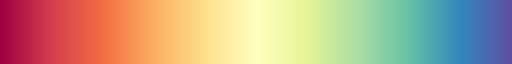

In [173]:
pallete=sns.color_palette("Spectral", as_cmap=True)
pallete.set_bad('0.7')

pallete

# Thymocytes DP alpha old

In [46]:
res = pd.read_csv('./prev_clusters/thym_dp_alpha_clusters.tsv', sep = '\t', index_col=0)
res.rename(columns={'cluster': 'cluster_id'}, inplace=True)

dif_clusters = res.cluster_id.value_counts().head(5).index

types_dict = {}

for cluster in dif_clusters:
    
    cur_claster = set(res[res.cluster_id == cluster].cdr3)
    
    types_dict[cluster] = {}
    
    cur_founded_cluster = sc_data[sc_data.cdr3_a_aa.apply(lambda x: x in cur_claster)]
    
    for subtype in cur_founded_cluster.celltypist_majority.unique():
        types_dict[cluster][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_a_aa.unique())


cur_claster = set(res.cdr3)
types_dict['total'] = {}
cur_founded_cluster = sc_data[sc_data.cdr3_a_aa.apply(lambda x: x in cur_claster)]
for subtype in cur_founded_cluster.celltypist_majority.unique():
    types_dict['total'][subtype] = len(cur_founded_cluster[cur_founded_cluster.celltypist_majority == subtype].cdr3_a_aa.unique())
    
cell_type_counts_df = pd.DataFrame(types_dict)
cell_type_counts_df = cell_type_counts_df.fillna(0)
cell_type_counts_df

3     2     5     7     4  total
T CD4 Naive                       45.0  59.0  40.0  42.0  38.0    798
T CD4 Helper 0                    12.0  28.0  17.0  13.0  15.0    330
T CD8 Naive                        5.0  13.0   7.0   9.0   4.0    144
T CD8 Activated CTL Cycling        2.0   1.0   1.0   0.0   0.0     11
T CD4 Helper 17                    1.0  10.0   1.0   2.0   4.0     61
T Reg CM                           2.0   1.0   0.0   1.0   2.0     25
T CD8 CTL                          2.0   3.0   5.0   4.0   3.0     47
T CD4 Helper 1                     1.0   2.0   0.0   0.0   0.0     15
T CD8 EMRA                         1.0   2.0   0.0   2.0   2.0     34
T CD4 CTL                          1.0   0.0   0.0   0.0   0.0      3
T CD4 Naive RTE                    1.0   1.0   1.0   2.0   0.0     20
MAIT                               1.0   1.0   0.0   0.0   1.0      9
T Reg EM                           0.0   7.0   5.0   4.0   2.0     51
T CD8 EM                           0.0   6.0   0.0   3.0   2.0     50
T CD4 Naive IFN stim               0.0   1.0   0.0   0.0   0.0     20
T CD8 CM                           0.0   1.0   1.0   1.0   2.0     18
T CD4 Activated Helper 1 Cycling   0.0   1.0   0.0   1.0   0.0      4
T CD8 Naive RTE                    0.0   0.0   1.0   0.0   0.0     21
MAIT Activated                     0.0   0.0   1.0   5.0   0.0     10
T Double Negative                  0.0   0.0   0.0   0.0   0.0      2
T CD8 Activated CTL                0.0   0.0   0.0   0.0   0.0      1
T CD4 Helper 2                     0.0   0.0   0.0   0.0   0.0      3

In [47]:
for cell_type in set(sc_data.celltypist_majority.unique()).difference(set(cell_type_counts_df.index)):
    
    cell_type_counts_df.loc[cell_type, :] = 0

/home/dluppov/.conda/envs/new_analysis_env/lib/python3.11/site-packages/statsmodels/stats/multitest.py:186: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/scratch/ipykernel_1573215/1146394489.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fisher_res_to_ann = fisher_res_to_plot.applymap(lambda x: "**" if x < 0.01 else "*" if x< 0.05 else "")
/home/dluppov/.conda/envs/new_analysis_env/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


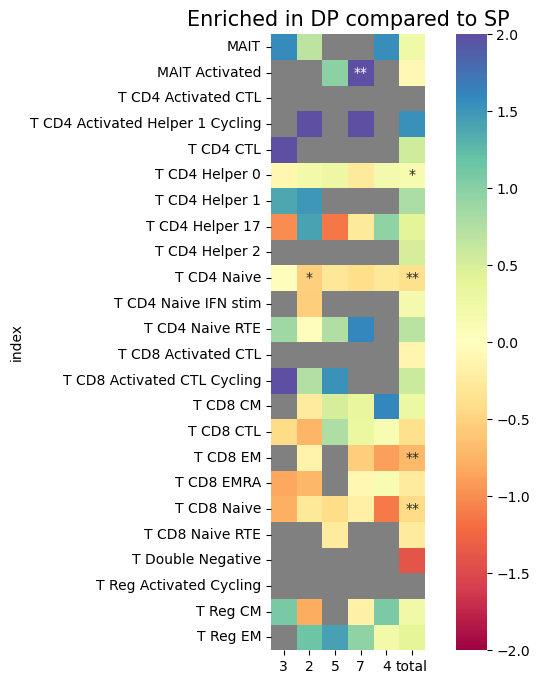

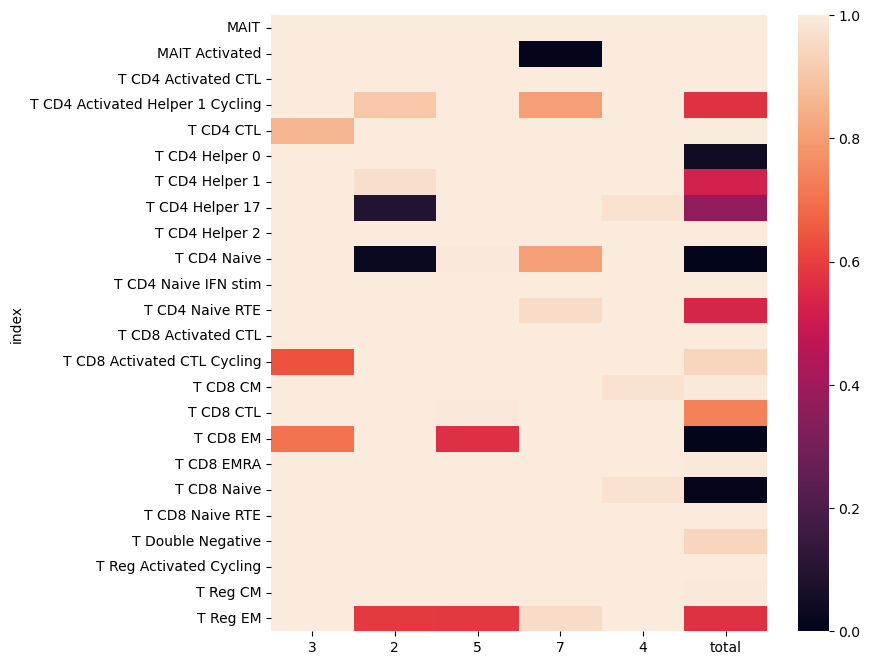

/scratch/ipykernel_1573215/1146394489.py:50: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)


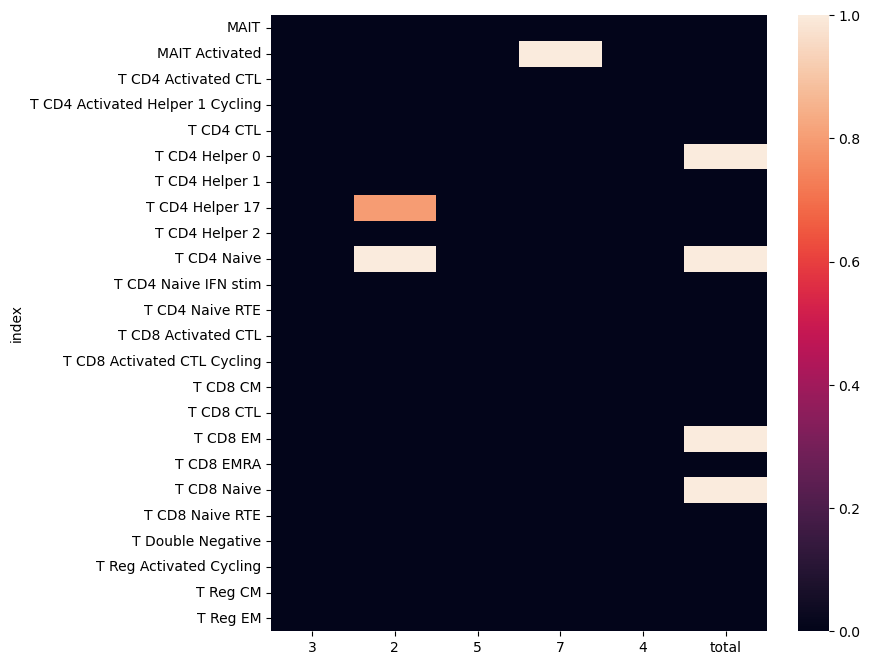

In [49]:
fisher_res = {}
chi_statistics = {}
fc_statistics = {}


for cluster in cell_type_counts_df.columns:
    fisher_res[cluster] = {}
    chi_statistics[cluster] = {}
    fc_statistics[cluster] = {}
    for subtype in cell_type_counts_df.index:
        fisher_table = [
            [cell_type_counts_df[cluster][subtype], cell_type_counts_df[cluster].sum() - cell_type_counts_df[cluster][subtype]], 
            [len(sc_data[sc_data.celltypist_majority == subtype].cdr3_a_aa.unique()) - cell_type_counts_df[cluster][subtype], len(sc_data[sc_data.celltypist_majority != subtype].cdr3_a_aa.unique()) - cell_type_counts_df[cluster].sum() + cell_type_counts_df[cluster][subtype]]
                       ]
        
        fisher_res[cluster][subtype] = fisher_exact(fisher_table,)[1]
        chi_statistics[cluster][subtype] = cell_type_counts_df[cluster][subtype]/(cell_type_counts_df[cluster].sum()*len(sc_data[sc_data.celltypist_majority == subtype].cdr3_a_aa.unique()))
        fc_statistics[cluster][subtype] = (cell_type_counts_df[cluster][subtype]/cell_type_counts_df[cluster].sum())/(len(sc_data[sc_data.celltypist_majority == subtype].cdr3_a_aa.unique())/len(sc_data.cdr3_a_aa.unique()))
        
fisher_res_df = pd.DataFrame(fisher_res)

chi_res_df = pd.DataFrame(chi_statistics)
fisher_res_df = fisher_res_df.apply(lambda x: multipletests(x)[1])

fc_res_df = pd.DataFrame(fc_statistics)

fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')

fisher_res_to_ann = fisher_res_to_plot.applymap(lambda x: "**" if x < 0.01 else "*" if x< 0.05 else "")

plt.figure(figsize=(8, 8))

sns.heatmap(np.log2(fc_res_df.reset_index().sort_values('index').set_index('index')),vmin = -2, vmax = 2, 
           annot = fisher_res_to_ann, fmt="", cmap=pallete, square=True)

plt.title('Enriched in DP compared to SP', fontsize = 15)

plt.savefig('dp_vs_sp_thymocytes_alpha_fixed.svg')

plt.show()

plt.figure(figsize=(8, 8))

sns.heatmap(fisher_res_df.reset_index().sort_values('index').set_index('index'))

plt.show()

fisher_res_to_plot = fisher_res_df.reset_index().sort_values('index').set_index('index')
plt.figure(figsize=(8, 8))
fisher_res_to_plot = fisher_res_to_plot.applymap(lambda x: 1 if x < 0.05 else 0.8 if x< 0.1 else 0)
sns.heatmap(fisher_res_to_plot)

plt.show()

In [470]:
from statsmodels.stats.multitest import multipletests

fisher_res_df.apply(lambda x: multipletests(x)[1])

/home/dluppov/.conda/envs/mir11/lib/python3.11/site-packages/statsmodels/stats/multitest.py:186: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))


3         2    5         7    4  \
T CD4 Naive                       1.0  0.435526  1.0  1.000000  1.0   
T CD4 Helper 0                    1.0  1.000000  1.0  1.000000  1.0   
T CD8 Naive                       1.0  1.000000  1.0  1.000000  1.0   
T CD8 Activated CTL Cycling       1.0  1.000000  1.0  1.000000  1.0   
T CD4 Helper 17                   1.0  0.898692  1.0  1.000000  1.0   
T Reg CM                          1.0  1.000000  1.0  1.000000  1.0   
T CD8 CTL                         1.0  1.000000  1.0  1.000000  1.0   
T CD4 Helper 1                    1.0  1.000000  1.0  1.000000  1.0   
T CD8 EMRA                        1.0  1.000000  1.0  1.000000  1.0   
T CD4 CTL                         1.0  1.000000  1.0  1.000000  1.0   
T CD4 Naive RTE                   1.0  1.000000  1.0  1.000000  1.0   
MAIT                              1.0  1.000000  1.0  1.000000  1.0   
T Reg EM                          1.0  1.000000  1.0  1.000000  1.0   
T CD8 EM                          1.0  1.000000  1.0  1.000000  1.0   
T CD4 Naive IFN stim              1.0  1.000000  1.0  1.000000  1.0   
T CD8 CM                          1.0  1.000000  1.0  1.000000  1.0   
T CD4 Activated Helper 1 Cycling  1.0  1.000000  1.0  1.000000  1.0   
T CD8 Naive RTE                   1.0  1.000000  1.0  1.000000  1.0   
MAIT Activated                    1.0  1.000000  1.0  0.145837  1.0   
T Double Negative                 1.0  1.000000  1.0  1.000000  1.0   
T CD8 Activated CTL               1.0  1.000000  1.0  1.000000  1.0   
T CD4 Helper 2                    1.0  1.000000  1.0  1.000000  1.0   
T CD4 Activated CTL               1.0  1.000000  1.0  1.000000  1.0   
T Reg Activated Cycling           1.0  1.000000  1.0  1.000000  1.0   

                                         total  
T CD4 Naive                       3.762443e-12  
T CD4 Helper 0                    6.687849e-01  
T CD8 Naive                       1.940151e-01  
T CD8 Activated CTL Cycling       1.000000e+00  
T CD4 Helper 17                   9.999141e-01  
T Reg CM                          1.000000e+00  
T CD8 CTL                         1.000000e+00  
T CD4 Helper 1                    9.999996e-01  
T CD8 EMRA                        1.000000e+00  
T CD4 CTL                         1.000000e+00  
T CD4 Naive RTE                   9.999996e-01  
MAIT                              1.000000e+00  
T Reg EM                          9.999996e-01  
T CD8 EM                          1.334299e-01  
T CD4 Naive IFN stim              1.000000e+00  
T CD8 CM                          1.000000e+00  
T CD4 Activated Helper 1 Cycling  9.999996e-01  
T CD8 Naive RTE                   1.000000e+00  
MAIT Activated                    1.000000e+00  
T Double Negative                 1.000000e+00  
T CD8 Activated CTL               1.000000e+00  
T CD4 Helper 2                    1.000000e+00  
T CD4 Activated CTL               1.000000e+00  
T Reg Activated Cycling           1.000000e+00

# Motifs for database

In [24]:
cluster_data = pd.read_csv('./prev_clusters/thym_sp_beta_clusters.tsv', sep=',', index_col=0)
cluster_data.rename(columns={'cluster': 'cluster_id'}, inplace=True)

dif_clusters = cluster_data.cluster_id.value_counts().head(5).index

cluster_data = cluster_data[cluster_data.cluster_id.apply(lambda x: x in dif_clusters)]
transfer_dict = {clust_name: i for i, clust_name in zip(list(range(1, 6)), dif_clusters)}


cluster_data.cluster_id = cluster_data.cluster_id.apply(lambda x: transfer_dict[x])

cluster_data.to_csv('./clusters_for_db/thymocytes_beta_enriched.tsv', sep='\t')

In [21]:
cluster_data

cdr3  cluster_id           x           y  cluster_size  \
62       CSARVGTDTQYF           1 -107.324181  -61.999908           252   
63       CSARPGTDTQYF           1 -107.906807  -63.417995           252   
64       CSARRGTDTQYF           1 -107.245636  -64.021599           252   
65       CSARHGTDTQYF           1 -107.333702  -63.409332           252   
66       CSARAGTDTQYF           1 -106.336105  -60.821320           252   
...               ...         ...         ...         ...           ...   
1892  CASSLDRGNTGGLFF           2  -40.498814 -124.462021           209   
1893  CASSVGGPNTGELFF           2   22.378635 -157.907227           209   
1894  CASRPGTPNTGELFF           2   51.222389 -163.355865           209   
1895  CASSQDQENTGELFF           2   23.472506 -161.131363           209   
1896  CASSCRGNNTGELFF           2  -58.538303 -186.315506           209   

         x_mean      y_mean  cc  
62   -93.249883  -38.638516   1  
63   -93.249883  -38.638516   1  
64   -93.249883  -38.638516   1  
65   -93.249883  -38.638516   1  
66   -93.249883  -38.638516   1  
...         ...         ...  ..  
1892   1.105312 -149.018749  35  
1893   1.105312 -149.018749  35  
1894   1.105312 -149.018749  35  
1895   1.105312 -149.018749  35  
1896   1.105312 -149.018749  35  

[991 rows x 8 columns]

In [8]:
transfer_dict = {clust_name: i for i, clust_name in zip(list(range(1, 6)), dif_clusters)}
transfer_dict

{11: 1, 3: 2, 4: 3, 57: 4, 12: 5}